In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Allow long lines

# Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

In [2]:
# Specify the path to the CSV file in the parent directory
file_path = "../Dataset/pd_speech_features/pd_speech_features.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=',',skiprows=1)

In [3]:
df.head()

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0          0.008064            0.000087       0.00218      0.000018   
1          0.008258            0.000073       0.00195      0.000016   
2          0.008340            0.000060       0.00176      0.000015   
3          0.010858            0.000183       0.00419      0.000046   
4          0.008162            0.002669       0.00535      0.000044   

   rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
0    0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
1    0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
2    0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
3    0.00149     0.00268    0.00446     0.05451         0.527      0.02395   
4    0.00166     0.00227    0.00499     0.05610         0.497      0.02909   

   apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0      0.03496       0.04828     0.09034                 0.970805   
1      0.03675       0.06195     0.06961                 0.984322   
2      0.06497       0.07772     0.15282                 0.974846   
3      0.02857       0.04462     0.07185                 0.968343   
4      0.03327       0.05278     0.08728                 0.975754   

   meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                    0.036223                      18.995     69.997496   
1                    0.017974                      21.497     67.415903   
2                    0.026313                      17.651     62.661706   
3                    0.042003                      19.865     76.306989   
4                    0.027139                      19.557     76.645686   

   maxIntensity  meanIntensity          f1           f2           f3  \
0     76.088046      72.465512  539.342735  1031.849040  2447.162183   
1     73.046374      71.528945  564.363615  1016.367294  2383.565201   
2     71.633549      68.086583  548.444604  1032.406341  2357.826954   
3     81.000749      79.190593  819.529588  1201.813897  3154.035654   
4     80.937258      79.183495  846.796144  1215.346469  3201.513132   

            f4          b1          b2          b3          b4  GQ_prc5_95  \
0  3655.054806  101.092218   83.147440  255.214830  396.643631     0.77778   
1  3498.681572   58.465428   86.487292  248.357127  218.229722     0.81250   
2  3678.128717  160.387771   54.685168  151.694847   84.240339     0.81818   
3  4122.163933  238.667052  191.984916  573.752909  526.147599     0.98548   
4  4085.456839  402.216738  210.061394  203.637106  384.611697     0.97847   

   GQ_std_cycle_open  GQ_std_cycle_closed  GNE_mean  GNE_std  GNE_SNR_TKEO  \
0            11.7245               2.8277   1.17300  0.26512      0.083127   
1            13.8284               2.8908   1.02210  0.22004      0.127410   
2            26.9273               2.6975   0.84951  0.15756      0.116890   
3           139.5744               1.6961   0.83405  0.17295      0.147370   
4           102.0549              15.4045   0.83556  0.16210      0.151990   

   GNE_SNR_SEO  GNE_NSR_TKEO  GNE_NSR_SEO  VFER_mean  VFER_std  VFER_entropy  \
0  1200445.612        1.5347       3.0152   0.000463  0.000260       0.83621   
1  1298455.445        1.6029       3.0600   0.000615  0.000295       1.04550   
2  1272869.841        1.6223       3.0309   0.000360  0.000266       0.63668   
3  1932289.206        1.6717       3.0293   0.000196  0.000194       0.45452   
4  1861807.802        1.6781   

# Informação acerca do Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 756
Number of columns: 755


In [6]:
df.nunique()

id                                252
gender                              2
PPE                               740
DFA                               745
RPDE                              748
numPulses                         315
numPeriodsPulses                  319
meanPeriodPulses                  755
stdDevPeriodPulses                646
locPctJitter                      358
locAbsJitter                      543
rapJitter                         183
ppq5Jitter                        244
ddpJitter                         327
locShimmer                        734
locDbShimmer                      547
apq3Shimmer                       710
apq5Shimmer                       709
apq11Shimmer                      722
ddaShimmer                        741
meanAutoCorrHarmonicity           747
meanNoiseToHarmHarmonicity        748
meanHarmToNoiseHarmonicity        745
minIntensity                      755
maxIntensity                      755
meanIntensity                     755
f1          

In [7]:
df.isnull().sum()

id                                0
gender                            0
PPE                               0
DFA                               0
RPDE                              0
numPulses                         0
numPeriodsPulses                  0
meanPeriodPulses                  0
stdDevPeriodPulses                0
locPctJitter                      0
locAbsJitter                      0
rapJitter                         0
ppq5Jitter                        0
ddpJitter                         0
locShimmer                        0
locDbShimmer                      0
apq3Shimmer                       0
apq5Shimmer                       0
apq11Shimmer                      0
ddaShimmer                        0
meanAutoCorrHarmonicity           0
meanNoiseToHarmHarmonicity        0
meanHarmToNoiseHarmonicity        0
minIntensity                      0
maxIntensity                      0
meanIntensity                     0
f1                                0
f2                          

In [8]:
# Check if there are any null values in the entire DataFrame
any_null_in_dataframe = df.isnull().any().any()
any_null_in_dataframe

False

In [9]:
df.describe().T

count          mean           std  \
id                              756.0  1.255000e+02  7.279372e+01   
gender                          756.0  5.158730e-01  5.000788e-01   
PPE                             756.0  7.462842e-01  1.692936e-01   
DFA                             756.0  7.004139e-01  6.971804e-02   
RPDE                            756.0  4.890576e-01  1.374425e-01   
numPulses                       756.0  3.239722e+02  9.921906e+01   
numPeriodsPulses                756.0  3.226786e+02  9.940250e+01   
meanPeriodPulses                756.0  6.360002e-03  1.826427e-03   
stdDevPeriodPulses              756.0  3.829401e-04  7.276492e-04   
locPctJitter                    756.0  2.324427e-03  2.628001e-03   
locAbsJitter                    756.0  1.673391e-05  2.290134e-05   
rapJitter                       756.0  6.049932e-04  9.807118e-04   
ppq5Jitter                      756.0  1.158967e-03  1.676717e-03   
ddpJitter                       756.0  1.815085e-03  2.942045e-03   
locShimmer                      756.0  6.747323e-02  4.296906e-02   
locDbShimmer                    756.0  6.064195e-01  3.825696e-01   
apq3Shimmer                     756.0  3.437513e-02  2.236567e-02   
apq5Shimmer                     756.0  4.117476e-02  2.716491e-02   
apq11Shimmer                    756.0  5.536636e-02  3.393915e-02   
ddaShimmer                      756.0  1.031253e-01  6.709670e-02   
meanAutoCorrHarmonicity         756.0  9.615082e-01  6.409512e-02   
meanNoiseToHarmHarmonicity      756.0  5.113138e-02  1.045795e-01   
meanHarmToNoiseHarmonicity      756.0  1.885963e+01  5.576473e+00   
minIntensity                    756.0  7.082861e+01  8.858268e+00   
maxIntensity                    756.0  7.613537e+01  6.446451e+00   
meanIntensity                   756.0  7.399701e+01  7.018006e+00   
f1                              756.0  6.471745e+02  1.349579e+02   
f2                              756.0  1.233852e+03  1.690904e+02   
f3                              756.0  2.562425e+03  3.933156e+02   
f4                              756.0  3.547259e+03  3.478643e+02   
b1                              756.0  2.133632e+02  3.069760e+02   
b2                              756.0  2.971741e+02  4.501255e+02   
b3                              756.0  5.368211e+02  7.543417e+02   
b4                              756.0  5.066049e+02  6.583266e+02   
GQ_prc5_95                      756.0  9.044226e-01  1.478264e-01   
GQ_std_cycle_open               756.0  3.229583e+01  3.114075e+01   
GQ_std_cycle_closed             756.0  4.454840e+00  7.313057e+00   
GNE_mean                        756.0  1.092503e+00  3.507892e-01   
GNE_std                         756.0  2.150380e-01  1.325491e-01   
GNE_SNR_TKEO                    756.0  1.448323e-01  6.006453e-02   
GNE_SNR_SEO                     756.0  1.567618e+06  3.332799e+05   
GNE_NSR_TKEO                    756.0  1.639264e+00  6.569221e-02   
GNE_NSR_SEO                     756.0  3.021510e+00  4.761736e-02   
VFER_mean                       756.0  1.789522e-03  2.621691e-03   
VFER_std                        756.0  1.499781e-03  2.192689e-03   
VFER_entropy                    756.0  4.020686e+00  6.247897e+00   
VFER_SNR_TKEO                   756.0  1.027878e+02  1.282912e+02   
VFER_SNR_SEO                    756.0  2.461609e+02  2.768993e+02   
VFER_NSR_TKEO                   756.0  1.230503e+00  7.315588e-02   
VFER_NSR_SEO                    756.0  1.266200e+00  8.593177e-02   
IMF_SNR_SEO                     756.0  5.985239e+01  1.257788e+02   
IMF_SNR_TKEO                    756.0  2.147575e+00  2.295495e+00   
IMF_SNR_entropy                 756.0  1.240569e+01  1.110503e+01   
IMF_NSR_SEO                     756.0  2.104607e-01  6.326761e-02   
IMF_NSR_TKEO                    756.0  1.216250e+01  9.990321e+00   
IMF_NSR_entropy                 756.0  1.801599e-01  3.310951e-02   
mean_Log_energy                 756.0  9.832618e+00  5.424211e-01   
mean_MFCC_0th_coef            

In [10]:
df.describe(include='all').T

count          mean           std  \
id                              756.0  1.255000e+02  7.279372e+01   
gender                          756.0  5.158730e-01  5.000788e-01   
PPE                             756.0  7.462842e-01  1.692936e-01   
DFA                             756.0  7.004139e-01  6.971804e-02   
RPDE                            756.0  4.890576e-01  1.374425e-01   
numPulses                       756.0  3.239722e+02  9.921906e+01   
numPeriodsPulses                756.0  3.226786e+02  9.940250e+01   
meanPeriodPulses                756.0  6.360002e-03  1.826427e-03   
stdDevPeriodPulses              756.0  3.829401e-04  7.276492e-04   
locPctJitter                    756.0  2.324427e-03  2.628001e-03   
locAbsJitter                    756.0  1.673391e-05  2.290134e-05   
rapJitter                       756.0  6.049932e-04  9.807118e-04   
ppq5Jitter                      756.0  1.158967e-03  1.676717e-03   
ddpJitter                       756.0  1.815085e-03  2.942045e-03   
locShimmer                      756.0  6.747323e-02  4.296906e-02   
locDbShimmer                    756.0  6.064195e-01  3.825696e-01   
apq3Shimmer                     756.0  3.437513e-02  2.236567e-02   
apq5Shimmer                     756.0  4.117476e-02  2.716491e-02   
apq11Shimmer                    756.0  5.536636e-02  3.393915e-02   
ddaShimmer                      756.0  1.031253e-01  6.709670e-02   
meanAutoCorrHarmonicity         756.0  9.615082e-01  6.409512e-02   
meanNoiseToHarmHarmonicity      756.0  5.113138e-02  1.045795e-01   
meanHarmToNoiseHarmonicity      756.0  1.885963e+01  5.576473e+00   
minIntensity                    756.0  7.082861e+01  8.858268e+00   
maxIntensity                    756.0  7.613537e+01  6.446451e+00   
meanIntensity                   756.0  7.399701e+01  7.018006e+00   
f1                              756.0  6.471745e+02  1.349579e+02   
f2                              756.0  1.233852e+03  1.690904e+02   
f3                              756.0  2.562425e+03  3.933156e+02   
f4                              756.0  3.547259e+03  3.478643e+02   
b1                              756.0  2.133632e+02  3.069760e+02   
b2                              756.0  2.971741e+02  4.501255e+02   
b3                              756.0  5.368211e+02  7.543417e+02   
b4                              756.0  5.066049e+02  6.583266e+02   
GQ_prc5_95                      756.0  9.044226e-01  1.478264e-01   
GQ_std_cycle_open               756.0  3.229583e+01  3.114075e+01   
GQ_std_cycle_closed             756.0  4.454840e+00  7.313057e+00   
GNE_mean                        756.0  1.092503e+00  3.507892e-01   
GNE_std                         756.0  2.150380e-01  1.325491e-01   
GNE_SNR_TKEO                    756.0  1.448323e-01  6.006453e-02   
GNE_SNR_SEO                     756.0  1.567618e+06  3.332799e+05   
GNE_NSR_TKEO                    756.0  1.639264e+00  6.569221e-02   
GNE_NSR_SEO                     756.0  3.021510e+00  4.761736e-02   
VFER_mean                       756.0  1.789522e-03  2.621691e-03   
VFER_std                        756.0  1.499781e-03  2.192689e-03   
VFER_entropy                    756.0  4.020686e+00  6.247897e+00   
VFER_SNR_TKEO                   756.0  1.027878e+02  1.282912e+02   
VFER_SNR_SEO                    756.0  2.461609e+02  2.768993e+02   
VFER_NSR_TKEO                   756.0  1.230503e+00  7.315588e-02   
VFER_NSR_SEO                    756.0  1.266200e+00  8.593177e-02   
IMF_SNR_SEO                     756.0  5.985239e+01  1.257788e+02   
IMF_SNR_TKEO                    756.0  2.147575e+00  2.295495e+00   
IMF_SNR_entropy                 756.0  1.240569e+01  1.110503e+01   
IMF_NSR_SEO                     756.0  2.104607e-01  6.326761e-02   
IMF_NSR_TKEO                    756.0  1.216250e+01  9.990321e+00   
IMF_NSR_entropy                 756.0  1.801599e-01  3.310951e-02   
mean_Log_energy                 756.0  9.832618e+00  5.424211e-01   
mean_MFCC_0th_coef            

In [11]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4t

# Número de Registos por Id

In [12]:
id_counts = df.groupby('id').size().reset_index(name='count')
id_counts

id  count
0      0      3
1      1      3
2      2      3
3      3      3
4      4      3
5      5      3
6      6      3
7      7      3
8      8      3
9      9      3
10    10      3
11    11      3
12    12      3
13    13      3
14    14      3
15    15      3
16    16      3
17    17      3
18    18      3
19    19      3
20    20      3
21    21      3
22    22      3
23    23      3
24    24      3
25    25      3
26    26      3
27    27      3
28    28      3
29    29      3
30    30      3
31    31      3
32    32      3
33    33      3
34    34      3
35    35      3
36    36      3
37    37      3
38    38      3
39    39      3
40    40      3
41    41      3
42    42      3
43    43      3
44    44      3
45    45      3
46    46      3
47    47      3
48    48      3
49    49      3
50    50      3
51    51      3
52    52      3
53    53      3
54    54      3
55    55      3
56    56      3
57    57      3
58    58      3
59    59      3
60    60      3
61    61      3
62    62      3
63    63      3
64    64      3
65    65      3
66    66      3
67    67      3
68    68      3
69    69      3
70    70      3
71    71      3
72    72      3
73    73      3
74    74      3
75    75      3
76    76      3
77    77      3
78    78      3
79    79      3
80    80      3
81    81      3
82    82      3
83    83      3
84    84      3
85    85      3
86    86      3
87    87      3
88    88      3
89    89      3
90    90      3
91    91      3
92    92      3
93    93      3
94    94      3
95    95      3
96    96      3
97    97      3
98    98      3
99    99      3
100  100      3
101  101      3
102  102      3
103  103      3
104  104      3
105  105      3
106  106      3
107  107      3
108  108      3
109  109      3
110  110      3
111  111      3
112  112      3
113  113      3
114  114      3
115  115      3
116  116      3
117  117      3
118  118      3
119  119      3
120  120      3
121  121      3
122  122      3
123  123      3
124  124      3
125  125      3
126  126      3
127  127      3
128  128      3
129  129      3
130  130      3
131  131      3
132  132      3
133  133      3
134  134      3
135  135      3
136  136      3
137  137      3
138  138      3
139  139      3
140  140      3
141  141      3
142  142      3
143  143      3
144  144      3
145  145      3
146  146      3
147  147      3
148  148      3
149  149      3
150  150      3
151  151      3
152  152      3
153  153      3
154  154      3
155  155      3
156  156      3
157  157      3
158  158      3
159  159      3
160  160      3
161  161      3
162  162      3
163  163      3
164  164      3
165  165      3
166  166      3
167  167      3
168  168      3
169  169      3
170  170      3
171  171      3
172  172      3
173  173      3
174  174      3
175  175      3
176  176      3
177  177      3
178  178      3
179  179      3
180  180      3
181  181      3
182  182      3
183  183      3
184  184      3
185  185      3
186  186      3
187  187      3
188  188      3
189  189      3
190  190      3
191  191      3
192  192      3
193  193      3
194  194      3
195  195      3
196  196      3
197  197      3
198  198      3
199  199      3
200  200      3
201  201      3
202  202      3
203  203      3
204  204      3
205  205      3
206  206      3
207  207      3
208  208      3
209  209      3
210  210      3
211  211      3
212  212      3
213  213      3
214  214      3
215  215      3
216  216      3
217  217      3
218  218      3
219  219      3
220  220      3
221  221      3
222  222      3
223  223      3
224  224      3
225  225      3
226  226      3
227  227      3
228  228      3
229  229      3
230  230      3
231  231      3
232  232      3
233  233      3
234  234      3
235  235      3
236  236      3
237  237      3
238  238      3
239  239      3
240  240      3
241  241      3
242  242      3
243  243      3
244  244      3
245  245      3
246  246      3
247  247      3
248  248      3
249  2

# Número de Registos por Gênero

In [21]:
gender_mapping = {0: 'Feminino', 1: 'Masculino'}
df['genderText'] = df['gender'].map(gender_mapping)

gender_counts = df['genderText'].value_counts()#.divide(3)

# Create a bar chart using Plotly Express
fig = px.bar(x=gender_counts.index, 
             y=gender_counts.values, 
             color=gender_counts.index,
             labels={'x': 'Gender', 'y': 'Número de Registos'}, 
             text=gender_counts.values,
             color_discrete_map={'Masculino': 'blue', 'Feminino': 'pink'},  # Define colors for the legend
             title='Número de registo por "Gender"')

# Show the plot
fig.show()
df = df.drop("genderText", axis=1)


In [14]:
fig = px.histogram(df, x='gender', title='Número de registo por "Gender"', labels={'Gender': 'Gender Count'})

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Count',
    bargap=0.2  # Adjust the gap between bars
)

# Display the plot
fig.show()

# Número de Registos com ou sem Parkinson

In [15]:
class_mapping = {0: 'Sem doença de Parkinson', 1: 'Com doença de Parkinson'}
df['classText'] = df['class'].map(class_mapping)

class_counts = df['classText'].value_counts()
print(class_counts)

# Create a bar chart using Plotly Express
fig = px.bar(x=class_counts.index, 
             y=class_counts.values, 
             color=class_counts.index,
             labels={'x': 'Class', 'y': 'Número de Registos'}, 
             text=class_counts.values,
             color_discrete_map={'Sem doença de Parkinson': 'green', 'Com doença de Parkinson': 'red'},  # Define colors for the legend
             title='Número de registo por "Class"')

# Show the plot
fig.show()
df = df.drop("classText", axis=1)


Com doença de Parkinson    564
Sem doença de Parkinson    192
Name: classText, dtype: int64


In [16]:
fig = px.histogram(df, x='class', title='Número de registo por "Class"', labels={'Gender': 'Gender Count'})

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Parkinson Disease',
    yaxis_title='Número de Registos',
    uniformtext_minsize=8,  # Set the minimum text size
    uniformtext_mode='hide',  # Hide text when it doesn't fit
    bargap=0.2  # Adjust the gap between bars
)

# Display the plot
fig.show()

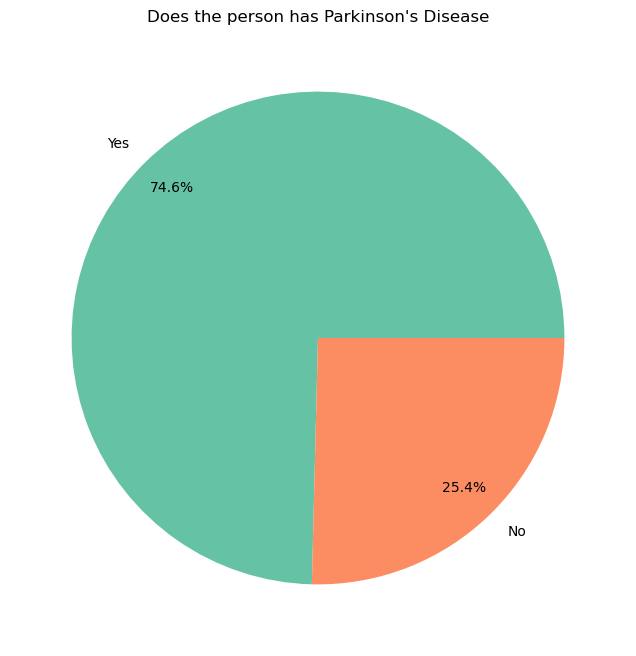

In [17]:
PALETTE = sns.color_palette("Set2")
RANDOM_STATE = 42

sizes = dict(df['class'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Does the person has Parkinson's Disease")
plt.pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85, colors=PALETTE)

plt.show()

# Target feature is unbalanced, like in most medical data, but this time we have 0 class underrepresented (no Parkinsons's Disease)



In [18]:
gender_mapping = {0: 'Masculino', 1: 'Feminino'}
df['genderText'] = df['gender'].map(gender_mapping)

grouped_df = df.groupby(['genderText', 'class']).size().divide(3).astype('int64').reset_index(name='Count')

fig = px.bar(
    grouped_df,
    x='class',
    y='Count',
    color='genderText',
    text='Count',  # Use the 'Count' column for text inside bars
    labels={'Count': 'Número de Pacientes'},
    color_discrete_map={'Masculino': 'blue', 'Feminino': 'pink'},  # Define colors for the legend
    title='Número de pacientes por "Class" e "Gender"'
)


# Add custom x-axis tick labels
class_labels = ['Sem doença de Parkinson', 'Com doença de Parkinson',]  # Replace with your custom labels
fig.update_xaxes(ticktext=class_labels, tickvals=[0, 1])

fig.update_layout(
    legend_title_text='genderText',  # Set the title for the legend
    coloraxis_colorbar_title='genderText',  # Set the title for the color legend
    uniformtext_minsize=8,  # Set the minimum text size
    uniformtext_mode='hide'  # Hide text when it doesn't fit
)

# Show the bar chart
fig.update_layout(legend_title_text='genderText')
fig.show()
df = df.drop("genderText", axis=1)




In [19]:
def Vif(data,label):
        thresh = 10
        independent_variables = []
        print(independent_variables)
        for col in data.columns:
            if col != label:
                independent_variables.append(col)
        print(independent_variables)
        for i in np.arange(0, len(data)):
            vif = [variance_inflation_factor(data[independent_variables].values,ix)
                for ix in range(data[independent_variables].shape[1])]
            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('vif :', vif)
                print('dropping', data[independent_variables].columns[maxloc],
                      'at index', maxloc)
                del independent_variables[maxloc]
            else:
                break

        print('Final variables :',independent_variables)
        return independent_variables

In [20]:
independent_variables = Vif(df, "class")

[]
['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter', 'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer', 'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer', 'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity', 'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean', 'GNE_std', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_TKEO', 'GNE_NSR_SEO', 'VFER_mean', 'VFER_std', 'VFER_entropy', 'VFER_SNR_TKEO', 'VFER_SNR_SEO', 'VFER_NSR_TKEO', 'VFER_NSR_SEO', 'IMF_SNR_SEO', 'IMF_SNR_TKEO', 'IMF_SNR_entropy', 'IMF_NSR_SEO', 'IMF_NSR_TKEO', 'IMF_NSR_entropy', 'mean_Log_energy', 'mean_MFCC_0th_coef', 'mean_MFCC_1st_coef', 'mean_MFCC_2nd_coef', 'mean_MFCC_3rd_coef', 'mean_MFCC_4th_coef', 'mean_MFCC_5th_coef', 'mean_MFCC_6th_coef', 'mean_MFCC_7th

vif : [13.554720435432985, 64.97841639174216, 141.93841168087863, 395.49315244631975, 107.89262941605783, 899022.9726841587, 896027.4012114751, 578.7755361157483, 64.99134022897964, 997.3583021173066, 1954.8042352265775, 204391.1371517426, 1064.049233044477, 49138.38163841643, 7826.7587168791715, 3316.126401503963, 482193845.92188996, 867.6168604370664, 204.67011417925616, 22328694.07295856, 4632.058054858936, 4336.1904086413915, 215.02502493490167, 2241.3465490068274, 2535.1387296006988, 3352.8278625896437, 120.01315080401403, 110.40681043543691, 48.957965095409676, 40.18879306403231, 15.72514068328586, 14.424705607844936, 9.153742804158318, 10.88276846820174, 69.66587406681842, 60.65750307831844, 110.70752582046141, 111.23909709329483, 59.06373706655177, 184.03947479635536, 23.606178656910302, 151.02515682512023, 9.573041374241418, 2811.898899424517, 54.40110709536875, 2788.204578795081, 23.73692108381581, 24.711307082361014, 71.59606336885281, 53.570270848028876, 64.88111145507123, 

vif : [13.489584496147113, 59.508073689536644, 138.2720340912991, 392.78157564525446, 106.37492128543103, 883526.3105094393, 883996.5977953452, 574.6684848147972, 65.8364346493747, 955.5791460275555, 1885.6947671334055, 262346.7680553686, 1056.3362334261676, 44487.24724429008, 7852.883979909756, 3301.5981807595226, 371588649.89243853, 888.3748089821346, 200.25825112471645, 27204540.025715746, 4594.53764853518, 4286.9916630441385, 214.9558309839363, 2264.028957519184, 2489.9461032978684, 3358.8630579955648, 120.56356125757091, 111.25903878711111, 49.020984525598436, 40.14505354856801, 15.747979765429678, 14.382746576738722, 9.181099267428495, 10.837886036254966, 68.8817735796953, 59.69828943287933, 111.10927908611808, 111.7774422958672, 58.74755455104878, 183.23297445185926, 22.10794717540037, 149.98213431450114, 8.898227724590546, 2800.614318476349, 55.045091403933995, 2582.1725085003313, 24.950061958800838, 24.556977099859065, 72.36545014395983, 52.96903349127229, 64.72832458707998, 4

vif : [13.806616119292771, 60.14263917670204, 142.3784250600136, 392.1895312232448, 106.36480286963675, 905268.0295325672, 902525.4482108252, 582.4851575887423, 66.07899137242002, 978.274070422205, 1943.2190526233223, 292183.67559596425, 1011.2831583764665, 84817.87633264314, 7836.970982376356, 3355.8041725473504, 651357342.0306085, 857.7918063393201, 203.3050128401608, 59008249.22408517, 4587.919935290393, 4259.750889428817, 218.16686106025264, 2281.9579641811797, 2473.8021417528835, 3326.57872649398, 120.44225007244631, 108.45635476806358, 49.40483303648078, 39.67228578013881, 15.709154348262812, 14.370214426162676, 9.143991597152418, 10.84487135936356, 67.27051593295265, 61.41529769049172, 102.61499504930406, 112.12096776091619, 58.766577593449384, 185.02813576896992, 21.808563445380994, 153.0005733375857, 9.019591596181737, 2743.9419414531294, 54.12197699687919, 2750.806265304721, 25.30474470968482, 25.30135310566947, 72.76185822482908, 54.02201053602311, 62.52691268783999, 48.5353

vif : [13.612328146271425, 54.85262640379698, 141.61601973818634, 387.7527136148046, 106.9406253877971, 883306.3725031335, 873436.1779067249, 576.9386226959351, 65.54423462597822, 998.0010848459785, 1925.213122938874, 428632.6655275457, 970.5971403159348, 37471.19867513707, 7749.470384753692, 3362.9464974972857, 579957086.2331454, 846.8972727328447, 203.700504844418, 97608527.53409319, 4549.470871621693, 4242.843091312591, 215.57370796499362, 2283.891722625815, 2483.3290716937563, 3341.134170147467, 118.28112887579391, 109.24814029775999, 48.9173701403515, 39.07445098409529, 15.26063627420269, 14.390526560754711, 9.17568643643943, 10.6344084419981, 65.5883440034625, 61.193587306804524, 101.95280770678488, 112.50132850256792, 58.45242897666981, 184.34856623104818, 20.959143642982312, 152.00073397722196, 8.836215442549301, 2726.1834839042745, 53.69479017324422, 2649.023707985147, 25.312834923819715, 24.816834658042783, 71.3650523369949, 53.655402061920626, 60.87110106809538, 48.302977993

vif : [15.922184606116277, 62.68421490814397, 171.43838782000503, 434.79656288183094, 119.24971449649813, 1022325.9391282186, 1020568.4832738857, 697.7496629984395, 72.68395917764178, 1178.3264405063694, 2406.267029178169, 1535435.434898565, 1232.596831563982, 278243.39010399126, 9035.636421255394, 4142.910083186688, 859308803.0829673, 994.3988890250396, 241.62879701260462, 821687026.9774119, 5299.210752077023, 5010.108212716669, 248.13838321092, 2671.9661475850908, 2980.478393609323, 3877.2394950684284, 128.66069474325778, 120.02028885560946, 59.81542487392847, 46.20771674048733, 17.965416288833225, 17.39213064858244, 10.26505798879417, 11.700285280537585, 71.8478449360883, 78.58294337202042, 118.80441395086797, 133.0780451866751, 69.4962468322559, 213.73281696537902, 25.681559544903504, 172.93981739336286, 9.64439872599383, 3190.2720835283067, 65.39196292739129, 3205.765794209474, 27.02911219339428, 30.375033670001287, 82.16422068129295, 68.11509044951258, 74.94401754885853, 64.32383

vif : [15.660032428737257, 65.39876588233331, 170.43325374849852, 432.73428644872536, 118.38172367759677, 987244.5649092399, 981772.8169263542, 611.8732063774404, 67.60874928638042, 1165.8046585310542, 2389.0109661349065, 1407806.5663197434, 1236.03465884607, 286909.75178181, 9058.840718925449, 4080.7660221910146, 843482944.195196, 999.9091057484435, 226.83349905439886, 734509527.3523921, 5075.794657582059, 4673.4843246084565, 246.44317364933778, 2663.9354199100057, 2953.4831497964733, 3806.917489561879, 129.44193909852564, 119.36161727549407, 59.17561404743262, 46.55623450556189, 17.726815147241386, 17.349402288494254, 10.17775409920646, 11.667449724964449, 69.73982770473985, 78.40294505695746, 116.88617754363075, 130.44847236884036, 68.59489640635314, 213.9019861607803, 24.704847626134026, 172.97481390703095, 9.344577125415224, 3178.0364556499712, 67.51797516106326, 3193.887584912866, 26.76178865288394, 30.21342469109181, 82.18216285543978, 68.28447056261534, 74.02714071406345, 63.31

vif : [15.443697405407647, 65.38097788165788, 169.03723068748286, 432.90358566863677, 118.09454283305159, 953805.2300257295, 947919.0290265165, 602.2039113538473, 67.90787446182159, 1142.705975524186, 2383.2278876172586, 1324667.1181299107, 1191.752517766543, 300146.61351339146, 8978.98732557136, 4027.554577853135, 827774758.2294073, 999.1632876543276, 225.6626670478832, 712571256.9133185, 5428.533004458376, 4656.463243440802, 244.12914310352863, 2619.9120852108313, 2942.3842564625775, 3890.8358249095013, 130.86969690747236, 118.7541191577198, 58.55841219118909, 46.924078203446264, 17.836532771440176, 17.051931530251412, 10.011742311559702, 11.679204422341199, 69.79124038353143, 78.01043479884031, 116.45353589982977, 131.3452006689373, 67.61772879571318, 213.88344162016114, 24.832903551865584, 171.58542047767438, 9.093903144931978, 3139.4195310472805, 67.01048230749815, 3155.692672411635, 26.930167442317636, 29.393742663408943, 82.39708901882753, 66.1206534885065, 72.18409929734227, 61

vif : [15.592178516213806, 60.18690146013203, 164.0318533620072, 432.0644247475384, 113.57678093412228, 945728.8252220115, 940311.8750774049, 603.7167867151062, 66.86056376390016, 1034.4525787820119, 2192.8031000463006, 1239336.6014643032, 1166.5613354260086, 432909.3978743702, 9021.407628997302, 4205.513760075848, 805968784.4324127, 941.5122570177178, 220.11112332773115, 745787310.2332053, 5252.870790509108, 4614.351892863657, 249.27314605443829, 2609.9715641929333, 2921.693374484851, 3809.622269501416, 126.68853218752096, 118.01721639891939, 58.5155571117185, 45.490446383089505, 17.603295500355305, 16.377602262155367, 10.010141278770764, 11.681630482415509, 70.27253675876133, 79.06945819135748, 116.6772954624187, 132.36534816988765, 66.89349305437811, 208.18191218158785, 26.905015461374447, 171.0930296789962, 9.04665690480039, 2977.06530831776, 66.34863519904333, 2952.2334376408353, 26.4399941319027, 29.032418571323817, 79.68642642430896, 65.8938773524526, 71.70144547956768, 58.51457

vif : [15.65842998161618, 59.39732259403739, 164.97178698634556, 419.71837350242924, 104.08723603813792, 936320.8740179641, 931089.1944104356, 602.7391287920044, 67.57835304879829, 990.1323911669125, 2124.598172264604, 1379679.248452862, 1154.6960016459477, 232362.6785409031, 8865.891153697743, 4563.834653806509, 808674710.0269938, 921.6732862647597, 221.01567461709408, 727526436.9472991, 5711.578009754599, 5408.886995998679, 248.89494147810115, 2528.9630003273032, 2701.1040102158368, 3741.7069202391262, 127.72362219573547, 115.41864276354309, 58.410665381431414, 45.49919007362663, 17.17059622806073, 16.952444024292564, 10.13664516921266, 11.624376268374352, 64.58771352471531, 76.44517415250391, 110.27787321225537, 133.1743840958739, 66.04822567008061, 214.26663327242534, 25.76127686089754, 171.17875789163034, 8.908609298742032, 2946.4090074757287, 66.53619828605451, 2888.9125647544806, 26.514648984081028, 31.278198898525158, 79.19970854258555, 63.80873223855764, 71.56892074330507, 59.

vif : [15.418570868088455, 58.74363331014271, 156.0625250124212, 409.36919505525447, 101.97865727619623, 933515.090557233, 928635.8394868036, 598.744889066193, 66.96038571800058, 968.0939277889689, 1976.4350653403712, 1177492.6516908135, 1129.0115982359728, 221348.17834093288, 8066.959815249824, 4075.1170697552784, 811882741.6260833, 920.2775402887017, 220.95248811858772, 719057004.3632624, 5677.659703985097, 5378.209211462477, 246.0304126860074, 2462.1923607012745, 2695.3855492190773, 3726.5500029438067, 127.52509921061457, 115.83952588446924, 56.92009571215954, 44.697333903210364, 16.988337011164784, 16.875338423701535, 10.23818059242651, 11.621524003664414, 65.02944963731493, 75.47095225293457, 110.56980816348974, 132.66508204587555, 65.5624449354095, 215.24569291340967, 24.79356026668379, 171.31271038245757, 8.82372301358093, 2926.2345736547077, 65.8089091037015, 2861.7525749411884, 26.222636631474327, 31.779773198018702, 78.44321153017162, 62.41647799749515, 71.33861908144596, 57.

vif : [15.577227693030293, 58.144690573829266, 151.20800498416767, 409.2366972570701, 101.09808299707281, 927529.5145012746, 915135.0301570365, 573.9187707106353, 63.87880400649623, 965.4726912607015, 1921.600238946978, 1139908.133594776, 1121.2201022401234, 229286.50865994857, 8090.741107820791, 3972.445993467803, 807188420.2202358, 922.6597340664539, 218.36354000189263, 657366184.9134471, 5009.70386133646, 5250.181875007937, 243.38198472835853, 2429.446524249762, 2691.9308801178827, 3733.0218505320613, 128.01302937661316, 115.84635092773388, 55.83021188135339, 44.464436375956474, 15.686762292731137, 16.606395304021515, 10.23191460584749, 11.584709679575894, 64.31485009260261, 74.42518098467202, 107.66412068042476, 132.56482257825581, 65.08659952625709, 213.1391232756216, 24.358777651228653, 166.82657887398102, 8.570309172344274, 2916.454914585956, 65.90632777970265, 2842.407685131856, 25.956598592056274, 30.551416981384182, 78.32024766369042, 62.040633127900016, 71.11595269910656, 56

vif : [15.579526498434284, 57.91769461092923, 150.2927691110402, 403.854225911966, 98.23886609798028, 926629.3879213135, 919968.736595514, 568.2897228288945, 62.50092511465121, 945.0044307617932, 1936.8868501973418, 1121365.3642050074, 1108.8206491477847, 223489.0503295874, 7983.368557285095, 3994.9728671208845, 806939224.1138774, 922.532098294615, 218.236536633316, 744384697.8602982, 5374.3172808929485, 4969.175967986349, 224.20048843921413, 2402.8345892578072, 2677.103503416507, 3722.411279857012, 124.33389907323226, 113.75693124011504, 55.006784577165206, 44.72888488232189, 15.362921978436193, 16.393130826224525, 10.158294259381975, 11.448725965146236, 63.73061017734508, 73.41143608862886, 105.43821003769055, 132.4429801174067, 64.76820965459059, 208.53617477829212, 23.534102963592005, 160.79520441959315, 8.499739941037118, 2887.3574142474154, 65.6588408584453, 2804.7060084770283, 25.74388367008709, 31.382516260172007, 76.62682310297767, 62.18745063042539, 70.68947312277346, 54.9509

vif : [15.485210784143872, 57.519491237287674, 154.99589827350485, 420.73679853082507, 97.45717905864984, 926341.3545940147, 945590.6081558124, 627.0033817401113, 60.24255439711475, 916.3648538440342, 1945.5892339394711, 1131298.8302701956, 1205.3079176386084, 434331.88734730805, 7924.523595989998, 4136.539321450574, 806404904.4968941, 913.4086219041766, 202.88551796400478, 739000402.8222834, 5386.155236725056, 4834.934407359164, 219.61086974173426, 2369.284492544515, 2776.7010738914896, 3729.700876452247, 118.32913457612092, 113.51251354393303, 54.9341721018113, 44.62250946621353, 15.096870539681086, 16.470956501738968, 10.009905350051083, 11.346674493939265, 62.81979097111107, 72.40582542482048, 103.84940709783503, 130.22254209231687, 62.45880065207606, 200.5226934131426, 23.28612173052061, 153.6167379952391, 8.487243854889154, 2881.1840954077843, 65.05317689100632, 2792.4276557660532, 25.539094905887158, 29.28710779743745, 76.38946191576615, 64.11895358039291, 69.91126234722452, 53.

vif : [15.089500425104598, 57.27080527695934, 146.29648050021862, 410.5121645299954, 97.41825311363836, 933403.2621965039, 929139.836736372, 602.2460348197004, 59.91126530269354, 903.9777070343239, 1915.547715348523, 1125752.1542646, 1170.2922360412051, 474857.29663046444, 7915.691530364538, 3829.983878798344, 794320601.4745263, 896.217249242237, 200.94830386950767, 737202329.9187763, 5224.72921024914, 4577.07716893628, 219.86859907804046, 2364.430762689761, 2565.402746999863, 3649.763993557704, 118.84579049500454, 113.19331515428145, 54.4220897294417, 44.77002596164724, 14.731178760443434, 16.079685026514806, 10.108619105294794, 11.356121759577187, 62.81411118526107, 74.67999792162169, 105.10992286714513, 127.88423741053093, 59.54892754622644, 199.50228291411662, 22.956529957196448, 153.34403227273654, 8.450064540659358, 2861.713080722867, 64.68946728422011, 2779.3952773058795, 26.00025772291185, 31.30922453430937, 76.33944057720237, 64.78555783645163, 69.7663655018374, 54.95239628642

vif : [14.895306081423898, 57.38171950008384, 135.4965663951394, 395.97150678208686, 96.74708030277914, 927067.2543454184, 927722.322248275, 611.2838491760162, 59.90762335742416, 895.1915931101678, 1810.5279890521185, 1191719.250612504, 1154.9870997850155, 491190.0229239683, 7793.213070833414, 3943.22808786167, 783290433.592667, 889.6642395446737, 199.5500020676865, 716187771.9579602, 5142.055402075344, 4546.522787477407, 208.4065122475326, 2358.7747090907906, 2522.566442257778, 3595.853781093678, 118.35755895487897, 113.03226994485739, 54.426935474045756, 42.154323338271325, 14.727789759793477, 16.377339937696828, 10.07810811243823, 11.305280598903087, 63.04589679398978, 73.89074066985928, 102.80206627686206, 128.48675106790233, 59.54094701684692, 197.7021188173554, 22.813654472001907, 152.13863032525626, 8.407227673369695, 2866.960327570124, 64.75586791714514, 2796.7925379609237, 25.99445836098162, 30.8561632286026, 76.69448346925076, 63.29925051460474, 66.59894397381981, 53.57108825

vif : [14.7541983879246, 56.26321208075208, 135.00984983663676, 400.2234585348519, 96.76935175634013, 914547.8025556109, 908121.0161304191, 610.4437792379016, 59.51693360132759, 892.679176770615, 1821.7164859097672, 1198630.428877643, 1156.747939345239, 326349.8826278065, 7639.219443312217, 3896.1521318525743, 759154086.1376821, 897.426952871123, 195.99000847062447, 522660535.38595206, 4875.990353960155, 4893.113173228175, 204.28609432982003, 2321.232396997839, 2654.691317261171, 3505.1502099674894, 117.1737039704015, 112.72408539415389, 53.88408462695183, 42.04304957159589, 14.699130239431023, 16.183293991295972, 10.027346633952732, 11.311231402859466, 62.9185998227575, 70.25367052985699, 104.02276629809823, 125.10346154775436, 59.73262139213377, 190.86247043009365, 21.605717507690255, 151.21598631103743, 8.344712277657958, 2835.6772727025595, 64.93498634369972, 2740.768222862805, 25.92517334913749, 31.475462480443554, 76.99175709094779, 63.533465727809705, 65.94567649702577, 52.96988

vif : [14.752812830612841, 57.103281852603814, 130.81284686076808, 373.00115608406514, 98.53678848234313, 899828.7501071332, 892670.881740909, 580.1588477936726, 59.05260064814476, 862.3403944032169, 1771.468678127122, 1222666.3697853049, 1039.3786686082058, 278863.14740016905, 7849.216456931854, 3734.482367099737, 777874351.8245177, 892.7073415227314, 193.31761705177612, 582796392.4970841, 5078.219474358108, 4828.239634671763, 205.39097831495675, 2255.8198339753803, 2612.484001595067, 3441.765218247609, 119.94737838320607, 112.49388385388667, 54.71332735226649, 44.8787729276991, 14.729202735694637, 16.323336964693993, 10.191470327933652, 11.027459491274405, 63.682447977187344, 73.08092311756094, 108.08986224547168, 119.57523953092712, 57.70694137021208, 190.56202925059097, 20.093568942485405, 150.96951134563548, 8.287092091250448, 2869.8230100672686, 65.92891845407614, 2772.011414922333, 25.806232189837125, 28.70868958983864, 76.81593294484844, 58.648634661327776, 64.66101776503476, 4

vif : [14.771479307870914, 56.93912537784105, 130.71386828646445, 367.85166294670563, 96.41857173786337, 886563.3084523802, 880672.6132615679, 596.3388916719156, 57.963895707294995, 848.5176166997384, 1752.5120481721729, 1286778.2501318238, 1028.9574318267225, 311351.5234042212, 7576.828679091701, 3714.372393295578, 772270359.015977, 833.0600539847109, 193.19872401558985, 753804801.8271174, 4671.828950370629, 4827.476033041846, 206.72488814640423, 2260.7900235586108, 2608.272876870124, 3433.9602462555094, 120.09623116830284, 110.22656495250983, 54.73765283435966, 44.85987304686293, 14.6716658266541, 16.291861581278773, 10.145760065156102, 10.861124118605986, 63.69884919280389, 72.2302985529019, 108.27229742206677, 118.49408814997108, 57.69060498857136, 189.99760712673282, 19.876693229614194, 150.6329981416451, 8.067980356379179, 2861.2296424643946, 65.43318945314573, 2772.1235284625145, 25.70590629995857, 28.90075991030779, 76.74036226300355, 58.69533605325185, 64.44238752864267, 49.02

vif : [14.559069961031273, 57.24277286149919, 133.6531532625686, 381.1671853272683, 96.58000179594693, 891770.4785641583, 885840.8537756838, 598.8353862583075, 57.70479951302627, 827.126280582163, 1834.0904966943122, 1309938.0907417492, 1030.74632755853, 440152.92869173107, 7530.415573263414, 3539.7976437578977, 766327663.7010512, 810.4711891764152, 183.7964375387325, 755126354.0428038, 4787.521704800374, 4815.453773998276, 205.94402829973424, 2112.2353066783826, 2559.885907347221, 3026.0657976719135, 122.34100056690892, 106.66295763815738, 54.121841085417046, 44.4671532949905, 14.700976239253508, 16.377871668613377, 10.131996486442306, 10.939653378697402, 63.21427796430869, 72.17506974032126, 106.54490467270043, 118.84420150731857, 56.53918992420119, 184.38642048444493, 19.33470983836279, 146.69362160920178, 8.02828355995182, 2694.461819483391, 61.54789114193418, 2615.901876643165, 25.896079886218374, 26.42185457709016, 76.18525116701038, 59.54369753954815, 65.12112900353753, 49.47065

vif : [14.623415534395544, 56.37717947344298, 132.43071188828915, 384.7628043669422, 95.09604355775257, 878878.8554471922, 871469.3736841251, 571.750007296894, 57.57488789922998, 797.020241969126, 1761.035654369968, 1258118.4646144183, 1002.4076226961159, 439194.04436986236, 7237.75427692662, 3253.750253610046, 745871794.4341816, 807.6165963974064, 185.7625736371372, 723136770.1607141, 4739.473198493041, 4505.408788308295, 201.24885628653152, 1970.2983734996299, 2514.312302819857, 2996.3904823507546, 119.14467894515786, 105.39121788588065, 53.87500882286598, 43.37874962553939, 14.533184565315553, 16.367791525367725, 10.147803139892218, 10.765814306443184, 60.04964858256249, 73.18262173585023, 103.24079486809167, 112.4578026665745, 56.862424028624574, 176.9929976443406, 19.46340996129857, 142.91133472764827, 7.989457652944463, 2639.5270235081607, 59.8970905282398, 2556.9392029442265, 25.723084130186425, 27.352860187633894, 75.61017862464422, 58.546074267103215, 63.90957275915505, 48.171

vif : [14.290470120978311, 56.147980069141695, 129.5878182337346, 372.96220242949727, 94.9311604764686, 873151.1091098858, 865887.045979623, 569.8870738097223, 57.17539183142674, 796.5588045762663, 1794.314559447715, 1110987.829352425, 1001.5742374382173, 444302.95640964224, 7243.501619732393, 3260.205576688719, 738028302.2914909, 791.7670295933625, 181.24756062171917, 704124108.7434529, 4625.201739650225, 4251.909412760569, 203.82806995669776, 1971.4586503038436, 2486.9730783901723, 2976.7732175663436, 117.71452389919479, 105.31702230590817, 53.74886444221194, 42.838235004197145, 14.427177348277977, 16.141196723708187, 9.897945497821382, 10.850233015396103, 60.439291238360696, 73.4253495617852, 103.30624904558645, 111.45137526653207, 56.03670537768606, 176.5501512750139, 19.13644925899064, 142.4180761048741, 7.995236462188038, 2533.8617820972736, 59.992293985595914, 2507.4803210540667, 25.575615417108555, 25.082788496674777, 75.76831008825397, 57.07361848316247, 63.76014876163087, 48.

vif : [14.240782725537237, 55.58192934293847, 126.86114057856118, 377.680384490987, 95.6805569546943, 872174.9925431431, 865056.8386108627, 554.4787991195861, 56.24801207940026, 797.0159573952534, 1813.3851633546456, 1097393.1692048658, 997.0320577744063, 444544.46757578064, 7096.377793449824, 3248.8150555546686, 734199272.1864367, 792.2363247870644, 171.89962026153395, 704226064.6807982, 4261.714249025527, 4006.898650432261, 194.2672576631287, 1958.664363673661, 2448.9587019283695, 2963.3112332856645, 117.13967836819889, 105.22072426405391, 53.2529493208956, 42.53969523980149, 13.948817364307855, 15.967608163492432, 9.894577280605994, 10.678148019134554, 60.30846163249802, 73.0538280392324, 102.85255864748378, 111.58229504662147, 54.66770849646346, 172.3705062192157, 19.17067741201614, 138.07221361655712, 7.987293698800369, 2563.1195636597313, 60.28712582060819, 2507.9775636127083, 25.58608557124061, 23.758395778230405, 75.18741861052989, 53.588008444055944, 62.76318646816211, 48.6679

vif : [14.414819644716085, 55.19729855515057, 120.83419168672317, 369.2463774072306, 94.41793604948107, 870612.2168582246, 862940.2233494691, 564.2546551333838, 55.46221630969696, 757.5754884276986, 1789.3346331305684, 1200912.3899760384, 1002.8529215090836, 393521.4441476506, 7118.668989272547, 3231.8141310961123, 680010588.719789, 791.8761390515954, 170.31054387975777, 653481291.0378182, 4208.660166733522, 4071.034295287596, 190.5358760621735, 1906.923533092414, 2451.4286192604345, 2909.865038028183, 113.46190328625042, 105.6149704272647, 53.21156866507081, 40.204495660958194, 13.774457976336224, 16.089152308277622, 9.923450345331245, 10.543323023005492, 60.292659580141624, 71.36793529911287, 102.19549356170738, 111.10483628522357, 55.53740478571375, 167.592608573864, 19.297111221610475, 135.49997884682327, 7.989726408632019, 2540.4492811905448, 59.571516135392635, 2485.105171087335, 25.504159385721916, 24.156650014843844, 73.3334734781898, 52.11197534998609, 62.87283064858732, 48.71

vif : [14.439390784313666, 55.265475604363594, 120.848127840609, 371.66435363350433, 94.38525877507108, 870054.8981011529, 862380.5581588385, 564.0913708700359, 55.50327349937925, 757.9491197654733, 1773.9531004110463, 1202343.9548288544, 1003.2891624565611, 389610.0226950713, 7113.781141685878, 3225.585680364657, 679216953.002348, 790.8170559773545, 170.27719947001845, 666896185.932866, 4229.998678232632, 4069.9242082041155, 190.63106560313162, 1907.0226677400442, 2453.7852988644104, 2907.4702913560595, 113.4070699304779, 105.66663582260703, 53.24272660589819, 40.20911273180087, 13.784465919790419, 16.092771165532728, 9.884082248240263, 10.544533425824994, 60.238572504104816, 71.3701058627131, 102.11575971858909, 111.11454709372546, 55.57916070357393, 167.60870110910986, 19.319031114639348, 135.4983811765378, 7.990136133646856, 2541.0297664164277, 59.568936209776595, 2480.5479757517496, 25.503424645434485, 24.154003377205616, 73.33190977128046, 52.11055809697852, 62.865493107050746, 4

vif : [14.396951617982937, 54.869550107556336, 116.82713953502778, 359.26523861196864, 93.72680973163028, 852568.3971135004, 843936.7535718401, 553.0894172877981, 55.852837417465125, 768.2735695458442, 1749.8579102836952, 1177558.075929674, 969.7552578031849, 345607.6686197969, 6993.478930398264, 3141.7906017505616, 677048950.8071333, 791.2493935595193, 169.42377491997536, 674831640.8153746, 4170.756019126431, 4018.4281101102133, 185.40795656739056, 1865.225566579645, 2368.2363147409164, 2896.3335653076633, 112.38915641619856, 104.35395429450789, 53.26469281406543, 40.03776198749986, 13.735426200088746, 14.894086165751515, 9.530018019191584, 10.498366974408054, 60.23742742937807, 70.2396234604572, 102.56769294372977, 107.18313611707984, 52.72850675585158, 166.57322102655684, 19.070943572695768, 135.39609282385067, 7.9720399890402405, 2552.7488040765834, 59.78891375263595, 2490.311237821628, 24.74840667064766, 22.888508434098735, 71.6518341237447, 52.13093032903197, 59.839627599619824, 

vif : [14.319797403458868, 50.34871477373045, 115.69486398893193, 354.36601974742734, 94.0883607044808, 844707.9502434194, 834794.990284354, 550.8869204408276, 49.49582701103467, 753.9967911562834, 1728.8111030479865, 1201391.23564691, 970.9460708799743, 236499.0542247989, 7029.696139174225, 3157.0160420324955, 679208245.9607717, 787.3085193174112, 169.35948198082684, 661460913.9180571, 4128.5167604374265, 4033.929591370603, 183.38634374322027, 1865.9328558350915, 2353.0071424029775, 2883.855179018736, 110.11981759790817, 102.23191406856127, 51.946906148800785, 40.239713749815074, 13.35728899820634, 14.702474429458244, 9.261541342020866, 9.731816403522007, 60.15406714149581, 69.8769294763379, 102.71130928311631, 103.60969854453641, 52.332435002049095, 163.08470544227714, 18.657386111725483, 132.42057236547112, 7.896736364517129, 2458.5259638260877, 59.20407274884315, 2400.5200689968124, 24.763446039727977, 22.25074382922489, 70.70186442558054, 50.28400220373685, 58.51468984483133, 47.8

vif : [14.311654597165116, 50.053633501397876, 115.62846354111318, 333.6533360562289, 93.568531384015, 840272.4099401769, 832836.8170063839, 545.4754309197809, 49.322167079278856, 750.2648496315585, 1697.9801657224773, 1157748.675059411, 968.2481434318673, 427509.008997427, 6943.723785520077, 3130.2651591275385, 677349805.8530687, 768.722965804629, 168.1109627812862, 673512905.9880674, 4104.445975080037, 3993.7948044385075, 182.87571586070158, 1844.0886464802777, 2265.2714563659247, 2853.5988681180397, 104.54415130142591, 101.60332406592467, 51.53522167146544, 38.59473615501285, 13.28970295885032, 14.269815026827903, 9.278603904065923, 9.727271393652881, 58.12773042776583, 69.54886660465607, 99.69193565255475, 103.54319007898476, 52.968319117270354, 161.76288676549038, 17.517144732947838, 131.8762899696478, 7.91127987715958, 2414.8175953107525, 57.89438695769354, 2367.412610123701, 24.569007561097504, 21.209030590539417, 69.95705245847293, 49.439886861185144, 57.81460366913836, 46.5422

vif : [14.365381642492105, 50.51630285542213, 115.86143394457355, 333.4134205089934, 93.71960580937973, 839487.8583834463, 832435.6374452248, 543.4160526418268, 48.68731876398675, 750.0907729007164, 1688.1085681719815, 1159811.338589127, 967.5484821451315, 429509.8506971564, 6908.454534133742, 3123.8811760189224, 773.5255966692221, 168.6151372208227, 955.0325380706672, 4113.116436251045, 4003.759600504381, 183.29514529745734, 1845.0013320714172, 2263.969750179025, 2852.3513822426057, 104.14615858392067, 101.39229634203039, 51.425966802652404, 38.59781930699763, 13.272739361258939, 14.371564017998017, 9.273911479786133, 9.73005013831293, 58.07664997104115, 69.45313658082404, 99.74261879986801, 103.05805046919144, 52.76635753364926, 161.8635458190987, 17.622882147595156, 131.98353631067906, 7.901316377747371, 2409.568775698438, 58.295573878775755, 2367.0920655497007, 24.58869287814334, 21.2220433981624, 69.95497269693598, 49.45600322346969, 57.86388067373113, 46.606591126251416, 172.9851

vif : [14.336721204907848, 49.06334230452558, 112.74938719707629, 333.4650529720624, 93.72800058434245, 843269.8639500972, 833864.8132388126, 526.6741117277928, 48.307496876168585, 742.9866075580173, 1678.542312666652, 1230426.768552187, 965.1444812623786, 562132.3367507661, 6872.867567539372, 3136.2105349997037, 747.9190079084059, 166.79638029233277, 954.1478580818256, 4103.829602114023, 3980.9364905767793, 181.76382238336112, 1837.22508217578, 2215.725612208637, 2804.3586716317927, 100.98985638615937, 99.46360635960232, 49.87454792958122, 38.724510514388754, 13.252736735572777, 13.90801791190161, 9.17096344560055, 9.758852496987945, 57.931051486835635, 63.181243556886, 97.56645737936464, 103.58943619197106, 52.003991002889315, 159.5139261422183, 17.515842745690772, 131.3467016431566, 7.871726842231448, 2415.5168456241754, 56.57545901980822, 2372.7543358750613, 24.345599140992828, 21.123387009932745, 68.60524244127205, 49.479821487563825, 57.39279077984981, 45.3422583808375, 174.17489

vif : [14.055888139097052, 49.00764527979373, 108.66564299209423, 340.8663950486133, 93.38005739980632, 837368.6863088422, 827008.4155563219, 511.7078262334224, 47.57822407724871, 724.9243611382705, 1702.9486881434268, 1144961.2716119955, 958.3892634815853, 587949.2553152469, 6789.663959482493, 3058.0310854420404, 738.3162021805458, 166.13814777102667, 942.7595056254974, 4089.698224971396, 3975.0093519122697, 187.05203373494896, 1822.2987270909307, 2209.7168108715027, 2779.9024142831777, 98.45626210313782, 100.16464716018999, 50.44704747682706, 38.92732318095258, 13.094928909839762, 14.43930334555987, 9.175216989476034, 8.88845367592379, 57.34536724501267, 59.075520697714964, 95.94983579061972, 102.11648430084593, 51.72427769827824, 159.22502939736918, 17.41032031911466, 132.19900642166377, 7.876958759951258, 2435.8065740557104, 56.79926942187684, 2377.3149702220953, 24.47540951435829, 21.724473569431012, 68.16241184801505, 50.0081867450287, 57.03658879907946, 45.605285420754, 174.5721

vif : [14.037382764001348, 49.0116418521464, 108.55030481352014, 336.2889695657847, 93.55570776432161, 839963.4756020589, 829968.4841926347, 482.3146031394727, 48.80620386184778, 722.3774565704879, 1696.0237002082374, 1093085.2412722728, 947.0552036789909, 577848.3353876641, 6678.92415641777, 3005.4807449468444, 726.9846278212393, 164.3940999056459, 942.3579305024895, 3883.005155106738, 3746.932059827853, 186.18632130930055, 1806.420355446681, 2161.1548668153246, 2755.1254042531887, 94.94736020492762, 99.73006124710358, 49.32082419603092, 36.391273455428106, 13.064237193669086, 14.14223148380652, 9.161690307357583, 9.10879130941674, 57.19601567649098, 56.51288865641125, 94.57073707584951, 102.05174765377868, 51.56194087743206, 158.72746175947077, 17.305533194788048, 131.49670427938307, 7.88746440691322, 2423.8958565727003, 56.815431925886934, 2374.31374944387, 24.515267369748116, 21.43599328654784, 67.95729271966476, 49.506057752688925, 56.27906541468337, 42.986337635903304, 163.159050

vif : [13.958620549849863, 48.79757708790363, 104.04068899436528, 331.8831875394171, 93.45827787937806, 834459.9552465219, 824059.3701110684, 479.2417562069037, 48.744152960397265, 702.7343070185699, 1679.8816049983138, 1015343.8005058703, 941.2459238109899, 489176.93786083313, 6700.718665447599, 3013.3691796731573, 724.232927009923, 164.03890095127187, 938.4638297127168, 3891.8816666521243, 3756.0024057889386, 185.06739273664297, 1795.4300508368833, 2160.5354141401854, 2733.43737034325, 94.85348872762258, 99.26953928344096, 49.383189261997465, 36.3159262703883, 12.82072664721405, 13.358664225788996, 9.194772381716596, 9.071813131758145, 57.06583115758765, 56.61874376406056, 94.5249637824527, 102.6233340761491, 51.43636009865007, 156.04843685641245, 17.05788547240488, 130.30811375125964, 7.825173239399986, 2409.776275349805, 56.375307279143485, 2363.345466712618, 24.314476835673428, 20.48968795442448, 67.82159308827264, 47.15687791171881, 56.20301866066293, 42.73841118575119, 163.08147

vif : [13.672348465581894, 48.97374715768582, 102.88085904611432, 334.1704603154127, 93.38646835149207, 840085.1345715587, 829260.3795230949, 474.7390569430139, 46.22701503621309, 705.1549844420381, 1675.6807450425838, 1094742.3030188484, 910.4196800256673, 411575.75803076924, 6705.335171508966, 3009.864071628818, 722.311299857327, 166.87121867497407, 933.3848070703124, 3856.893686525205, 3753.4723018002396, 186.86107358262512, 1799.8475579391686, 2154.30906232696, 2759.801017783682, 95.06076600746377, 99.25593381322663, 48.40383213028445, 35.79990842537999, 12.819550592473107, 13.186890761286575, 9.171746084229666, 9.281390821685088, 58.54167568921607, 55.81874260744409, 94.10184060312827, 102.67730421229004, 51.09481737956116, 156.17595897552107, 17.115059069444293, 129.35526769115762, 7.780896504988448, 2395.5380165538604, 56.86721645456738, 2345.660205991901, 25.026630623871586, 19.117381643367928, 67.34774816955496, 46.037157869787706, 56.94761710858155, 41.73423801760566, 162.477

vif : [13.544564394106175, 46.489685191594766, 101.65689812811776, 330.364313384641, 93.46586687085916, 830712.9555113392, 820836.0683533179, 456.3310262006088, 46.15206666984104, 699.1486255568907, 1579.03018385892, 1081107.7027775766, 904.1615295069136, 330178.1247127216, 6521.894578908238, 2962.1675889493567, 715.7185401223708, 164.16427839915653, 926.658468997445, 3829.7998485052135, 3725.7464250410558, 186.0064618595074, 1773.4523592502592, 2152.8002953449814, 2729.39909092925, 94.92483017615064, 99.05449923003819, 48.311019612910734, 35.69498470995109, 12.767636973593318, 13.27720832399841, 9.071389218290658, 9.149241753734668, 58.435082392344285, 55.39034221191663, 93.50816092869326, 101.99229674474152, 50.59209423930176, 155.39295370481662, 17.074628454170668, 128.79697561382372, 7.648770845909095, 2385.892599360542, 56.279033772275014, 2331.3287894228406, 24.933925931423413, 18.821984584773357, 67.3573119223623, 45.63519171267538, 56.33088911896183, 40.99869600491473, 159.2662

vif : [13.483884981215633, 46.07968836239394, 100.54825641078762, 330.71393904141786, 91.86189745645005, 802587.3476755606, 792759.7340041575, 455.18825574554234, 46.191241395088994, 698.5207797169992, 1508.908421652718, 1124206.8368721316, 887.1762096833306, 409771.5150234101, 6533.6912760770065, 2928.644312477642, 703.4271362256547, 164.65091596026684, 919.6423706237845, 3820.3703984778285, 3720.9574974096313, 183.38803818371017, 1776.8629813242694, 2148.933157195445, 2656.3009706616094, 94.8311076310387, 99.17535876295415, 48.131806961398915, 34.575275443768845, 12.701397980447815, 12.609170896418252, 8.962586661168539, 9.10509108415018, 56.137161953678905, 54.47513984525674, 88.65069343783703, 100.56704396107835, 50.63759027543909, 154.70238428547435, 16.854565248453003, 128.5042599530085, 7.487353825283453, 2315.496464200281, 55.80608216287312, 2273.7213185538317, 24.981509801217374, 18.496713320476815, 65.03402616849476, 43.453769266971804, 56.30356984623726, 40.62777548869762, 1

vif : [13.397561564497538, 46.194195863285934, 98.19657779708372, 310.9057250688186, 91.71053421963458, 775332.2031137348, 766437.4095554826, 454.5329880872399, 46.08737503085179, 702.0343628120778, 1630.2326803077624, 1152627.2682618655, 870.3426566189846, 375704.6360121149, 6528.990021899415, 2920.900204659521, 698.3609839708652, 162.34280981181513, 915.1787740339158, 3829.4919782922575, 3671.9316020092087, 187.45367829726538, 1690.7927403427457, 2208.378291141885, 2719.722521701687, 94.21682965592551, 95.35547995428819, 47.09014945112418, 34.238372356257706, 12.62459154950647, 12.652859840336326, 9.011030152542732, 9.14732610348506, 54.31545428022199, 54.34045476270717, 86.88561907570401, 101.71304994793506, 50.94793671931787, 154.99131459992302, 16.891313214015856, 127.82783657647829, 7.433140967480326, 2394.1519689035795, 56.123956647390365, 2355.3966158353637, 23.932585316831346, 17.467062217580366, 64.71035137973222, 43.019835636183906, 56.28631951143571, 40.03361700736536, 160.

vif : [13.13607211623023, 44.335764386656194, 98.08587842437083, 297.62501421640445, 87.49496036060589, 762450.1506052312, 752774.4567041352, 452.49519720713937, 44.644627073126244, 705.0669156471869, 1475.012384993345, 1019835.4452711045, 865.8570410603455, 636741.5280380745, 6530.975779555669, 2922.1337508708607, 683.3361083963082, 163.65104113044956, 915.1760672489002, 3815.9831241672127, 3667.743199236055, 177.15322919913268, 1693.9070163182287, 2086.518836767994, 2620.2037685574446, 95.41144938977025, 89.91696279752165, 44.77690626517696, 34.1314892077451, 12.498413610864635, 12.706239140054189, 8.888318061596312, 8.671858586757082, 50.33468936906835, 54.18825996220288, 85.16343783446499, 101.78870164004884, 51.52238041538212, 155.07136674917888, 16.85990962904927, 128.0835177521466, 7.204998875469464, 2336.9859679235146, 54.7020402679749, 2300.509892909921, 24.072113181014515, 17.34502212646268, 64.52907440147439, 42.82703615216787, 55.78719027768497, 39.17750778319524, 159.44922

vif : [12.9803600043317, 44.01343798055872, 94.00135948596224, 298.9308901007136, 85.72727956525159, 753538.0949533024, 743471.6426861942, 454.25021666284846, 43.862086918825796, 696.4773011662078, 1465.9237322109386, 1063892.753454476, 852.9711784378223, 406832.91799455305, 6518.2446318940765, 2918.4095975247974, 681.3486261935279, 159.19787546221332, 917.1061740349998, 3794.073789673433, 3643.4191782887647, 171.66110790401964, 1689.8384033429536, 2095.9604989727573, 2608.3910420098464, 95.47756164165712, 89.23739490752746, 44.32417897100965, 34.30327156773625, 12.133384986578514, 12.411748555379077, 8.673195466182888, 8.67983050551376, 48.25606995391971, 54.81845706558314, 81.97769504276289, 100.50058100022197, 51.31931173567273, 154.99455763056943, 16.80774475527518, 127.7813241639294, 7.184625354143, 2303.457496254151, 54.894003478330376, 2247.1541378080215, 23.855127049816964, 17.332989824486734, 63.816909754217576, 42.27248357472102, 54.777382918878295, 38.915444382246726, 154.38

vif : [13.005395901630543, 43.8209239818945, 93.34572335234343, 299.2945714028784, 84.80874216163222, 737530.8486039533, 731060.0612547115, 454.77167036319764, 43.79215526043771, 684.1526152554392, 1394.3383307036274, 1000118.3381017669, 841.7943196616626, 527071.0470385011, 6241.978026630589, 2842.086177630437, 681.4987767056837, 151.2379122465711, 904.3406108270906, 3797.0747092930733, 3640.853230045614, 168.2836245873345, 1568.8978450252112, 2091.5220245417718, 2464.0973908972933, 95.23893956623867, 88.4788987805057, 44.26602319983703, 34.07876661057219, 12.01751580236164, 12.397459455240735, 8.736296503326612, 8.661117353760044, 48.03567535773052, 53.5971027812164, 81.86032760893575, 98.20900308659965, 50.620480123569216, 154.48718142648735, 16.840847672295794, 127.63138970423657, 7.135585892075107, 2287.755600868824, 54.45442793163183, 2259.0155773780925, 23.292875448986617, 17.350576062481334, 63.611966902536906, 42.02397461329119, 54.6748594679156, 38.95351104221186, 154.4425122

vif : [12.952866593904236, 42.55722755917105, 92.77833406045717, 296.5568938546312, 85.50041323418077, 745660.2635086593, 737667.0485498494, 437.55297541412824, 42.301082171009845, 673.7173807709955, 1412.236923267005, 1034054.8288869873, 818.9969367469536, 591540.1680856465, 6234.715090116366, 2845.9685952992295, 677.4488315703048, 150.7454856696293, 906.3200656302403, 3812.3836229056114, 3638.109282698112, 171.36254074196668, 1581.6316503128705, 2088.1147170387635, 2355.402043691171, 100.0100413276882, 88.96245468762179, 44.093346044747626, 33.77572058653885, 11.652105863695805, 12.552260285948856, 9.018040489978501, 8.878166893373605, 48.29937432082178, 51.410434576888505, 80.30773731876161, 97.6938446524239, 50.41900945236306, 151.06707477629087, 16.84710882652173, 126.97267367700084, 7.125909367248542, 2319.753648406344, 54.229278519653086, 2262.7925572436916, 23.426625296027897, 17.37367154483944, 62.744970031309975, 42.32027465592517, 53.24462966313812, 41.06518406054215, 152.72

vif : [12.731741502761155, 42.30441553515444, 92.29548005292115, 295.15246520512056, 84.54072997911956, 746306.9497733313, 738224.6680695422, 437.62628030399446, 41.83981392917721, 628.0270661440481, 1396.2258112461127, 1008869.8442095594, 821.948199546751, 370029.73291816877, 6242.851482859252, 2855.952580003258, 673.0497271222357, 150.2686890313864, 905.525029864631, 3720.66156813749, 3582.3580982385783, 169.93601098588186, 1548.178448950268, 2085.8483638739062, 2352.0503604577016, 95.82653114952576, 88.7932128321227, 43.915841393155794, 33.2472156597036, 11.533283818771498, 12.555391811436735, 8.98150849579279, 8.934627755343485, 46.92841707781122, 49.48235043179895, 77.96661852307436, 98.04274345443918, 50.660089088345586, 151.37235051237246, 16.442675971550237, 126.29105475625357, 7.104510583525307, 2221.037752012217, 51.0550739194007, 2203.2573479996463, 23.22227145152956, 17.308098020114176, 63.080840348872854, 41.898740957574994, 52.1880783922223, 40.853631136925124, 152.417189

vif : [12.675270089710452, 42.02833760420903, 90.20305763058067, 295.92109563619454, 83.72214183998062, 741555.7679605285, 733145.8904261009, 411.7998340777369, 41.6617495384906, 600.6421540830339, 1386.5339713426968, 963703.1753468025, 818.0260851598787, 763746.3691289868, 6043.322920585308, 2769.872957959071, 671.8550022035112, 148.56697032357874, 900.5505802853634, 3690.8869436652585, 3551.741707811423, 170.01135603271786, 1538.9948428649113, 2072.023238520487, 2344.3677223504683, 94.521190744703, 88.15866514454842, 43.40342351517039, 33.31376433115654, 11.52638484873983, 12.564138198545642, 8.954879811052187, 8.586034102757836, 46.434128148007964, 49.08989433264112, 77.49391444847652, 97.74306451799669, 50.26288350295015, 151.22934136513854, 16.31906272328487, 126.50326181522307, 7.076798914891664, 2207.9116697487525, 50.947479797443165, 2193.1715100701454, 23.23145054284876, 17.29027708048565, 63.25421987234193, 41.84434614866116, 51.91964670740671, 39.13272027054486, 148.11448392

vif : [12.6837025947451, 42.014699644722214, 89.53034558522972, 297.91284248103807, 81.54255159336795, 737488.4963277397, 730981.9380846253, 407.15659809713844, 41.04973916929341, 593.9386968449492, 1382.1751489476749, 978636.5583580415, 797.785167596589, 696417.0605074068, 5806.4760112546355, 2654.9841805437977, 672.6885848601154, 147.73596368792403, 891.182685238222, 3661.7866690021588, 3550.5010656883633, 167.83975122360079, 1521.362802915853, 2069.8192573388637, 2328.1391438036394, 92.24773518654754, 87.5889572198285, 42.56883280865682, 33.22655331788733, 11.37293104694203, 12.443470847531202, 8.903365711611897, 8.359888638508902, 46.43428260140384, 48.5911205680206, 77.21389230358336, 95.37176750408277, 49.02820788580483, 151.3885132944443, 15.988288384298952, 126.31518549428588, 7.0653215652269905, 2181.8048869118447, 49.20030141842268, 2184.3307441933352, 22.601344687019736, 17.2657346532594, 62.27522775390402, 41.66008654131421, 50.98932604077153, 38.748318298393265, 144.397860

vif : [12.624555188220619, 44.267832707209486, 83.59751963797638, 290.7070769172748, 81.35916514134176, 731431.7448937927, 724379.5464607487, 407.41435779317544, 42.00460517424957, 567.9946303624874, 1373.511920843997, 981861.2793607519, 798.0485840201903, 457488.75165595516, 5690.7859660991535, 2586.905738521644, 673.420225635399, 146.8994131004702, 884.763982817955, 3661.9472364077774, 3545.5005180045614, 167.90299426504438, 1524.9301920939572, 2069.7797354309173, 2334.4030558521404, 90.71759837231275, 85.30571369407167, 42.54280968187988, 32.90129224513886, 11.32804540732024, 12.083753490716052, 8.85115979271545, 8.395454919709966, 47.52942379417633, 48.56997851840546, 76.94595033459923, 94.87309638892945, 48.98738678669968, 150.54793037967954, 16.05713624175668, 125.33102555929416, 7.052170457590182, 2189.854408367955, 49.183917122612634, 2184.2204583939997, 22.78220357041478, 16.778225128141433, 62.243053871838114, 41.654517930531235, 50.383953525176466, 38.836395684510585, 143.65

vif : [12.496655699439573, 43.477270051004794, 83.21114944876746, 288.5039253673717, 80.34640728125416, 730597.7372166265, 723430.5817709726, 410.8267377735262, 43.178810982663954, 568.5609428076859, 1346.810739373663, 943950.8731560543, 791.3038938157231, 671244.9645060104, 5659.753572700477, 2569.1115115349903, 668.9542707705245, 142.38080676602357, 829.1601781527743, 3611.9751928013125, 3548.007814375819, 160.4964601729753, 1509.7329673114987, 2062.0437381057454, 2328.157573188936, 90.65630019387267, 83.07465962597924, 42.404627824364326, 32.37778776731645, 11.21712868777337, 11.915903794738371, 8.579283509886736, 8.192024833975795, 46.79221491486259, 48.32843038919794, 77.14745499769778, 91.00885370630778, 48.251798698876954, 151.2414063261127, 15.758088394237328, 125.5281395789745, 7.041468165157559, 2147.6507453570584, 48.32933458124562, 2153.428347051474, 22.66691492040725, 16.74992232700077, 59.52374098780462, 41.61408614381865, 49.0697393548077, 38.393711848362344, 139.9360756

vif : [12.42386805090924, 44.17085273225979, 81.96705128301693, 287.93701638221967, 80.14047123411402, 716924.9511996902, 709896.5437437769, 415.1479949168465, 43.48166321805481, 529.1456786449193, 1335.051306170939, 962855.2762289827, 791.4351150854546, 428301.0449097146, 5647.411734247291, 2564.025469791426, 670.8551402081669, 140.05475428914104, 825.4720666204088, 3629.934859628603, 3622.128380393889, 157.545282298627, 1512.8040503060533, 2040.806691286677, 2330.1075108296204, 90.81615023271907, 81.37235369822625, 41.65894417207764, 32.35583083809516, 11.034509239658227, 11.880446514394384, 8.52294597238712, 7.954375826425989, 45.93361588079248, 47.99613371304718, 75.84748634329553, 90.72154908438607, 47.24534007477992, 151.0289512883825, 15.765309973537596, 123.56138634520325, 7.013909366919093, 2131.586690954132, 46.19143144554531, 2146.10461329402, 22.59313186545725, 16.670632877499376, 59.34604099308273, 41.445863816689915, 48.83528711724499, 36.23440641601642, 138.0010251177436

vif : [12.568276752861012, 42.73004238723661, 81.92056429603332, 288.9718192817684, 74.22161008359154, 728774.9520234903, 722943.5918627143, 396.3079774162629, 41.674343638897945, 535.640441516551, 1336.4551430582567, 924359.2148874837, 768.1965265227957, 291335.9285937213, 5693.308900365741, 2556.694892935128, 673.5417715465793, 133.26652819020913, 803.6171876670041, 3699.1040976325867, 3626.334285777103, 156.0268548413359, 1470.1254113014352, 2023.9611156569038, 2322.3466140345986, 84.87817809547572, 73.98556955556921, 40.44082588667259, 32.32240029491292, 10.872409190138741, 11.851830759178647, 8.487543048415853, 7.725240074830628, 44.08680077743964, 47.247216756848815, 75.61797337916484, 88.60954449210446, 46.47782504231687, 147.94398357484815, 15.80938294343018, 121.56174711741546, 7.029614271336042, 2120.898750011987, 46.185972552331265, 2139.2639706601963, 22.37123886753716, 16.77604227909, 59.035302382624785, 41.3370954727115, 48.955696100277024, 35.92068730618649, 135.34524101

vif : [12.111070604170024, 42.676712053259905, 82.09271715695293, 281.73742987111564, 75.0523258755068, 708967.5570287451, 701443.8130765847, 402.20333031882575, 41.26737065165422, 537.5423092519234, 1252.896631644344, 918647.8362735641, 766.4163957347733, 598927.3190441891, 5667.422982895273, 2542.9020906862897, 655.0809254809153, 134.6520254333036, 786.8741360758248, 3716.0784157673816, 3630.4388073093837, 156.50186082731503, 1472.3504826706087, 2031.1579254048463, 2326.5681564832403, 84.5786496639259, 74.19800948022761, 40.853874835066144, 31.46679270609952, 10.666032046009311, 11.760643465896939, 8.5071647708326, 7.715231505843317, 44.280061896868574, 47.638552937543444, 76.1199362394034, 88.0960349501559, 46.3259076300938, 150.41582481358697, 15.582307916222872, 123.381521948118, 7.006917392151384, 2081.3162691658467, 46.62928902680818, 2111.3000179103024, 22.080190645119742, 16.833052833780435, 58.33111629582012, 40.098022024795654, 48.96461226513682, 35.64389292866037, 135.40906

vif : [11.4572768066793, 40.71377496474288, 79.9008562472832, 284.44466188187727, 74.92241729399004, 694381.7405933631, 686677.5017771889, 396.248100035678, 37.582373309207966, 535.4545898683351, 1246.2346163477164, 953060.5904691198, 774.1930384194585, 601632.5680974544, 5603.896470895021, 2541.312546135703, 631.1710386082897, 131.98594308385822, 765.5713369556595, 3601.644319902296, 3351.03155915793, 149.60709861914162, 1460.7890983912432, 1888.0923654465435, 2171.496673447453, 84.48305388288773, 73.85832155113972, 40.70220918742443, 31.366191351868668, 10.65137981036914, 11.387683529293293, 8.500400686835256, 7.59109118161874, 43.430002306316844, 45.82756369188059, 76.06815265614449, 87.85380670125544, 45.47415907627853, 148.77105061118462, 15.644578418720725, 121.99489180332722, 7.0425109077469426, 2057.19092376694, 44.96664721162717, 2095.2433383761895, 21.896653937791633, 16.76967706716776, 55.57754835865831, 40.5096481039557, 48.87103762657454, 35.35887212517473, 134.83799808690

vif : [11.385049334033143, 41.3856886726621, 78.87383359912643, 282.7503071714362, 72.22977786413125, 691412.1968701801, 691120.1089637916, 398.18206281666323, 37.54536651458238, 534.7750418435509, 1219.7678214039167, 938805.472242121, 768.7765242160793, 509424.0486826854, 5437.724626768389, 2528.692551421746, 541.5881431340089, 129.47589893114917, 752.4461267106905, 3476.6725027965977, 3392.648962160707, 149.19483498060094, 1443.1686848217134, 1877.391435885511, 2145.725605329993, 83.79932180262776, 73.58082845974852, 40.492944206172474, 31.025624500754866, 10.646362418662335, 11.177907524001455, 8.340249041774284, 7.573715462179179, 42.84189297972096, 45.199544555322305, 75.43916176448154, 86.90917740409536, 44.66482588976331, 148.79127897114975, 14.74142912133943, 121.06415752453599, 7.036752842550203, 2050.4868609694217, 43.94997490273483, 2088.6445593984768, 21.872291762059163, 16.64102567359023, 55.65293276923317, 40.41935869706309, 48.80795336296095, 34.71869830122077, 133.67732

vif : [11.278936810618818, 41.62823268682185, 78.20329537589721, 282.49804867593434, 71.86635419492252, 692397.465380057, 685946.0874242353, 394.1769712723985, 37.23524851898105, 532.975162322919, 1198.2301514662627, 897588.3468143537, 757.9278311608357, 391477.9849266095, 5429.492328880504, 2511.4919017622337, 533.7163952081441, 128.6221344487627, 731.3143432360387, 3427.1609863800995, 3338.0234714391863, 149.4340971530798, 1421.8532354651952, 1851.9855474719302, 2143.345428930463, 83.43232950324797, 72.05792283035589, 39.034400452718515, 31.036961976490968, 10.629506301972967, 11.162163264551664, 8.30877338926976, 7.4954272563785915, 42.468206510763224, 45.190372123325744, 76.02492676083881, 86.56433373587564, 45.0580711480308, 148.28791766956084, 14.778347570985362, 119.91322211651988, 6.943845469943338, 2042.3203314903549, 43.96856055148579, 2078.7117439588924, 21.774714836685106, 16.515431160003665, 55.66381260525667, 40.21973339815464, 48.85154028531545, 34.62149191041916, 133.67

vif : [11.362047232305411, 41.2766124521705, 77.39016136760395, 280.57737088839025, 71.7390307987568, 689687.9017245569, 683189.5584097933, 386.3150225197331, 37.098810948077215, 510.39555873792074, 1205.0829058173156, 943701.6293715191, 752.7775156965045, 629117.0233683601, 5422.454693169768, 2502.766768339591, 532.2076030685081, 128.8265332566232, 730.0730421746962, 3396.70166194793, 3314.582896593347, 148.67883167969933, 1413.6260541282518, 1847.4905353847903, 2150.7314050057635, 82.8742121361797, 71.7205187417808, 38.58656240406911, 30.428672281089458, 10.486662467750094, 11.14762099159495, 8.218999952421328, 7.399455453911867, 41.66831129313536, 44.65143930548319, 75.06662911525747, 84.73804566548178, 44.11942836625666, 146.94605803134849, 14.763548577681027, 118.92299684992781, 6.931159349168923, 2048.4238500681363, 44.58721930884895, 2075.8630512047694, 21.276351985107887, 16.453899605750742, 54.933929031024526, 39.979625873215, 48.79759135318562, 34.52595286676001, 132.79092064

vif : [11.290086708000587, 41.37421157507861, 76.84801096868453, 268.4872495366098, 71.49865697927689, 683129.9288248795, 676890.2023459428, 380.43545630191517, 37.028957757928886, 510.26836596415063, 1208.5126375352947, 930025.3984401247, 683.2531621928723, 418593.2710178524, 5214.283214184429, 2455.0698175233233, 513.0834285762429, 128.47606404040081, 723.119168411799, 3357.369486658377, 3221.9365088645545, 148.24248432599705, 1342.3574457503134, 1844.9562366638497, 2093.635686545887, 82.80758693421731, 71.58051853988069, 38.48624685606906, 29.393541041645886, 10.526202436783176, 11.10137175052532, 8.168602747839206, 7.385042088898261, 41.63935430323332, 44.854107153846755, 75.2009008185079, 84.5888211788565, 43.71350946720609, 147.1855776662913, 14.687789172817427, 119.4981868301921, 6.8505310629382725, 1976.4250995304271, 44.0373697469666, 2014.1071083154304, 20.468654146611325, 16.353575892113984, 54.185741527208755, 39.49325271797544, 47.904829446364246, 34.700560069736234, 132.4

vif : [11.364117572210306, 41.336050748581336, 76.95297928932382, 264.5815484284335, 71.48721821367518, 670156.0547801008, 665150.8424331398, 363.12864266523, 36.30880129930256, 506.398687725027, 1206.0220402477432, 931060.7957892921, 682.2697081929897, 321438.79231233936, 5219.598191890724, 2456.497274702662, 511.91298212702077, 127.53832714376476, 716.795815936176, 3348.7013052125694, 3227.667524955997, 148.40707534902046, 1343.063313023124, 1842.3636328494072, 2087.1409754961305, 83.04039250640908, 71.47098181699971, 38.38067286094192, 29.419804097693028, 10.510371679310515, 11.025657006864881, 8.054401717721438, 7.430573054516553, 41.52902482208507, 44.47176616151606, 75.270925490903, 84.37996065425587, 42.7958376234522, 147.28860166554216, 14.289941353588743, 119.75882413423349, 6.84696152632021, 1972.6122308301872, 43.92440305395231, 2002.8832788180514, 19.84763844963479, 16.242954369526434, 54.11758514191699, 39.161322862677046, 46.58442636164416, 33.61757547234385, 129.35644515

vif : [11.255258169389673, 41.294740045382554, 71.84565243667032, 262.4435176117246, 71.44426122710301, 646465.8523606164, 637984.0377965007, 358.7630184867018, 36.35908198113195, 505.5963571085659, 1168.982906500019, 941732.9410746598, 665.2388197980047, 566834.7629799558, 5185.4899082290885, 2453.9525880285305, 513.8749196078627, 119.11100512823664, 697.7055751143873, 3354.042578447191, 3229.417107729028, 148.40782582601184, 1346.1883028878908, 1816.3544001970347, 2081.0447325134774, 82.20510446667174, 70.77389148078697, 38.11937567984965, 29.348676811485788, 10.493371496796978, 11.012885364677686, 8.08771116494236, 7.3632346350522235, 40.14363899913135, 44.207307661300604, 74.17031945796786, 83.80784395867859, 42.61014598559631, 147.10807922988485, 14.399094159331048, 119.70561158532036, 6.74373451328372, 1965.8753380546082, 42.2438693955576, 1993.597207720617, 19.7339081970934, 16.379199398388124, 52.906934205213716, 38.77249033706406, 46.26369846649475, 33.38995182599554, 129.7142

vif : [11.408169867197678, 40.894591536182226, 71.78270620902127, 262.73388640767547, 71.43222280701731, 659835.0359705517, 654131.9922964585, 359.0023221235556, 36.72919552553724, 476.8660705174006, 1018.1191865381415, 911473.909746507, 649.9398817217116, 552251.0823726181, 5200.381142280478, 2393.356812549423, 518.0414463246141, 116.45239979325751, 695.2825599481563, 3382.7257748105185, 3218.585016024239, 148.53079138164452, 1371.261837907049, 1807.067078913541, 2074.8005130695756, 79.79492898170761, 70.41732125537028, 37.87092366382551, 29.384599883458144, 10.400240965527226, 11.054140016331308, 8.175262005832947, 7.428943805072902, 40.313691698368864, 44.089708209539864, 73.89046193689163, 80.04696249582054, 41.11042457121903, 146.58942105642456, 14.410847798102385, 119.45133626611532, 6.7224904895909505, 1961.4022951742716, 42.683880414589716, 2007.1782456470592, 19.69125279967101, 17.153330585344367, 52.395621160550476, 39.46047651006761, 46.20890626493937, 33.244581246269796, 12

vif : [11.35239618015074, 38.56751156368198, 71.84681084348355, 263.5494003140477, 71.47371718634709, 668153.9725036852, 663952.5258434477, 359.6654608396924, 36.33254572415087, 482.59736149886885, 1025.0386328404052, 916527.938047426, 640.3802287433972, 585445.1944135809, 4717.317045800212, 2319.292160219093, 467.6957809713899, 116.08875540970133, 669.4785815445701, 3367.4458115265566, 3228.840178546824, 148.00344509576576, 1366.7805851848047, 1806.5898939025278, 2083.9545380354557, 76.17616467549891, 70.3669199004374, 38.158839932304424, 29.105343292363855, 10.384226501116354, 11.040799434299544, 8.121813248040457, 7.072407665877042, 40.31679953149414, 43.52335038231027, 73.2800091110634, 79.5758240218996, 40.205186563971296, 142.83176652213012, 14.37349302646573, 117.52963380264849, 6.685187753487412, 1855.2785202140471, 43.11715028216917, 1885.4635405377926, 19.770857998633655, 16.846079219430116, 52.40282514164277, 39.42832646937096, 43.39591950085187, 33.3230115149846, 127.999225

vif : [11.340718059687116, 38.58773350555979, 74.02359607273749, 263.4272291808877, 71.46506933965759, 674311.9949733902, 670147.3703800924, 359.8220565515758, 35.87908372758176, 479.23750879807454, 1026.2953626901437, 640.286954657709, 707.0123307539168, 4724.103940024436, 2324.6540361991847, 468.5186969630608, 116.89196546943153, 669.6234765185633, 3386.0456958782747, 3241.168420783166, 147.87729279888413, 1372.6382580232305, 1806.5593679843391, 2084.84650642307, 76.16067939875487, 70.35202383659326, 38.148953250471905, 29.084723150707298, 10.379758017540434, 11.039966564295021, 8.139543934900026, 6.951074332397245, 40.284972168269796, 43.53432465907335, 73.28224322926059, 79.59890853736657, 40.24732132962325, 142.930984078759, 14.384824062708427, 117.37301728014748, 6.675838536563155, 1859.2154884146396, 43.081934650631524, 1891.1255949145357, 19.703012064273484, 16.81093192189807, 52.33132247564601, 39.450570118524375, 43.36197099147409, 33.726377651437346, 127.99564464224679, 547.

vif : [11.323768489250924, 38.29252740970704, 72.61748947342237, 265.7297531172576, 70.56824784138448, 634370.9573964272, 627670.4107758418, 350.87308044146374, 36.37246005604206, 478.33368683578396, 1058.3343702351387, 673.3462251299317, 709.9369942971003, 4696.894381032427, 2311.225389270758, 457.96264207310566, 118.04612716813934, 667.7777419698144, 3411.502352464405, 3126.4315530648933, 147.45822848360888, 1349.0541701998761, 1801.4227820097774, 2106.804220607815, 76.23018596756536, 68.9605475310541, 37.677262426982885, 29.067686827919204, 10.389986794291104, 10.949648720944156, 8.102518380376397, 6.974920375239775, 39.802178214888436, 43.391520789852606, 72.90009510381996, 79.05831491632092, 39.855052143468306, 142.93327184505958, 14.328468675273873, 116.38600429357638, 6.586297301151903, 1871.1999892759482, 42.752149285724784, 1909.0688661537615, 19.59312648403123, 16.71586405087848, 52.52594701215185, 39.097499433775134, 43.27386701092625, 33.39932546463237, 127.45700642844426, 

vif : [10.709176596228367, 38.23293198060505, 71.79148898516247, 259.74875250660585, 70.19487659188694, 615310.4773310848, 610288.2359034317, 351.09826157181, 36.776461070074575, 480.909106682154, 1049.8616070443913, 630.8347432373456, 707.9619991902945, 4690.622043792873, 2304.4138345006454, 454.02171500232805, 116.31135396231525, 645.712949868229, 3407.581619380997, 3209.7077972301972, 148.38806211545335, 1323.0999372094332, 1791.4199906280892, 2055.720622903198, 75.59757548475777, 69.05764176872583, 37.896783729056, 29.0764764504728, 10.399340797870678, 10.618422869374188, 8.054129904150175, 6.802023857976696, 39.56932723034485, 42.85840889065037, 70.9686882246673, 77.97603455844006, 39.18043636742104, 142.8787203195382, 14.035348191501818, 116.13250624145996, 6.638013018824568, 1865.4718893700615, 41.85626981332863, 1900.179647216754, 19.591001626523894, 16.556923668744083, 51.076380635190326, 38.87970765519707, 43.55818749648465, 33.13520003501753, 126.77849589790212, 532.42973419

vif : [10.495975969614475, 38.78913364620894, 72.37774698331232, 259.28939218129807, 70.21123553875356, 619058.9824662233, 613073.7914305087, 350.96657118484796, 36.64167520903254, 462.07149120904415, 1001.4067716963445, 642.7668904240567, 699.1886995708021, 4605.091191394086, 2289.4644022970238, 459.32205751817276, 116.89740020893649, 640.0995476971665, 3327.3963643299235, 3096.6486042529114, 149.62746889523098, 1321.7034219900474, 1775.6317802213161, 2023.9368266931951, 71.78962278202546, 68.73100765165317, 37.98694046736008, 29.069025676295098, 10.38411987192287, 10.71023512017427, 8.07189110347925, 6.7871981473297645, 39.52082527477839, 42.766488641341255, 71.30906547414565, 76.24071737747248, 39.23116429751631, 144.66769210593117, 14.006134681870659, 115.80245760348735, 6.593038992675356, 1863.4719883378946, 41.64202245805178, 1912.4364357065522, 19.534379571097947, 16.577266852590036, 51.17485316125423, 38.91992004943915, 43.07376430351125, 32.96065943908654, 124.96227981637574, 

vif : [10.867462725898994, 39.08094969255359, 70.20622433368241, 258.94538206801616, 70.09728478570952, 755.101786006147, 331.966813303796, 36.36971110517908, 446.50270271046344, 935.1998667913977, 621.0272923325196, 592.8643950156451, 4584.788889442684, 2171.4110569056757, 438.87763543463603, 116.78598682362932, 624.8068821239074, 2918.7596942817618, 2517.235583486113, 149.3648139880704, 1318.6792631085266, 1777.2937515856213, 2023.2213154381614, 71.00043173017716, 67.85235149392527, 37.57808605897163, 28.56967227140607, 10.340748371096833, 10.092088528407734, 7.937064714708005, 6.597637165588999, 39.33922037814042, 42.6764391461637, 70.28926660871569, 76.14641301837284, 39.31615602538768, 143.28498428909427, 13.899759769250917, 115.98618443138491, 6.515565735877454, 1862.505583603966, 41.98538495040438, 1906.4724186501164, 19.49196488909079, 16.538630711965276, 51.2321172027355, 38.66610600495433, 43.069693445067074, 33.052339052962736, 124.64975459204248, 526.6336490860181, 13.44603

vif : [10.677061478242383, 38.021844648296245, 71.71670922076386, 244.88483054807105, 69.94643263574882, 742.0352424667747, 321.68514551133296, 35.5878176585721, 432.09631792710024, 936.9255416935674, 602.95658815491, 608.7069810614337, 4672.536436395564, 2163.15681372029, 441.9982168139827, 115.42560585194774, 629.991944562882, 2847.079886418969, 2472.065200685267, 144.3347770643488, 1302.960663766852, 1701.3170401489044, 1941.1082164568322, 68.26133982420075, 67.84416779341178, 37.119274129282054, 28.80161037809633, 10.345742172662122, 9.984334551798831, 7.499386124737087, 6.582051849333398, 39.06785590268214, 42.495900180747434, 69.7611071490241, 75.95573977889892, 38.92231421168239, 142.78134407902144, 13.730392476811177, 115.92050623113236, 6.452769762933513, 1957.615161440007, 41.690937273905476, 1956.72093379397, 19.424624265813414, 15.99577689340918, 51.7819190593856, 38.2633553330832, 42.92220643441308, 32.947589664485314, 124.68758739667692, 519.2414389203377, 13.644059409171

vif : [10.663831003191767, 37.29730880964697, 76.95114022652997, 246.25788388176096, 69.95515848076796, 747.066121916117, 322.24186306471825, 36.072228832323056, 432.0261464156597, 957.7071199923225, 615.1038500689777, 607.049135942122, 4654.223545034499, 2155.198535151824, 433.63713259962725, 114.64163889891393, 624.8179815362669, 2750.4778130551404, 2433.5351450823264, 144.15625131361836, 1327.088287253845, 1691.8397642815012, 1920.6334542973475, 68.6462364146247, 65.44165238999278, 35.792995043839746, 28.719490731026237, 10.290536737319147, 10.051229501982595, 7.467058262433232, 6.555085600636836, 38.3630526549245, 41.54516251331559, 68.16597723060103, 76.01393197581578, 38.86057274004392, 142.65922638991452, 13.937998500315782, 115.74626602859705, 6.478727754167565, 1809.4865429464594, 41.2200895685994, 1821.3447432276746, 19.415684078316605, 15.425005184373271, 51.518582728666615, 37.10282918516617, 42.941107117772304, 32.86674315602603, 123.96796179669707, 526.7044089486168, 13.5

vif : [10.709851421518, 36.92238362910761, 74.1187028669109, 244.9751822087755, 69.9148341827672, 722.1319248522575, 313.8916263074824, 34.29926570107287, 427.0750417602822, 925.2986184147171, 602.5537423111978, 605.6408574780676, 4413.639389128811, 2129.0414854940514, 431.4042403622025, 111.77968615601625, 597.364861063292, 2756.050824764486, 2428.756229082812, 143.94809715937032, 1324.5877430534142, 1678.8012085757716, 1916.9798512377024, 67.69687362089915, 65.05409699942777, 35.84071279930965, 28.639821481764777, 10.053702445522728, 9.963427907155273, 7.479998493497662, 6.702915294252592, 38.377075555793276, 40.99640936362117, 66.02558019840352, 76.01775522002194, 38.6473948053018, 143.4878882647017, 13.89644336486655, 115.26211249962161, 6.439647767010246, 1759.2254515353495, 40.77415488618399, 1835.6777801437624, 18.91547994055483, 15.277772789123507, 51.2587358022518, 35.974093233345315, 42.11391080531674, 31.78198974886856, 121.68135201995045, 526.0617535941652, 13.3978604769849

vif : [10.777663640883869, 38.10200901226432, 74.97772327589794, 245.67385627613933, 70.32171529704644, 715.3937638833311, 300.76484386254725, 35.059849450707695, 430.92266904761607, 875.271730879458, 633.1304742563401, 604.5881876242198, 4434.09921212055, 2081.638017185389, 426.69734707686143, 107.24999414785387, 593.644016867618, 2638.173807691434, 2352.606491546917, 140.91459911392124, 1298.298094239559, 1716.816144894394, 1970.9607193984373, 68.33970262283957, 64.77177108929972, 35.431218040241276, 27.843896791457944, 10.20554264850378, 10.116633335270356, 7.547948887543026, 6.740155440444524, 38.00617002981589, 41.37911933153677, 65.66476069899073, 76.12969892154356, 38.493824643772975, 145.06963559886825, 13.808912302394152, 116.09761982849517, 6.4706382368059785, 1822.5227340265437, 39.77245207685683, 1822.7294873142216, 18.72476545717719, 15.512965467268204, 51.01129115008873, 35.9691705555676, 42.349797428260686, 32.24964372635587, 119.58848347488818, 528.6499462398884, 12.977

vif : [10.790408108907672, 37.63237746617, 68.08641731062279, 244.01621602130587, 70.47522984230218, 662.4636689883815, 278.4168710653015, 34.69228436952236, 429.5770510383165, 868.1487904884273, 570.0093154439724, 584.4397369546502, 4237.589787229795, 2053.770805321406, 428.55436660689173, 101.80363050530254, 567.47499343483, 2573.1700830663963, 2311.4122170754604, 141.08441185845595, 1236.1939760497703, 1698.7791518666031, 1976.2582074624531, 68.13046518531426, 64.5928101954741, 34.40030478457427, 27.727088506745513, 10.23001532626859, 9.901356820317769, 7.52370005585496, 6.741451369151381, 37.94277701211298, 41.10752536449044, 65.61374935574527, 75.92278346198107, 38.30678285975575, 143.16552204282792, 13.592658145619787, 115.45460988185039, 6.372654559340623, 1815.50706212519, 39.825916421002724, 1805.1007481426632, 18.62792018687028, 15.545783296921917, 50.86207489070012, 36.278819239085436, 42.29876397831493, 32.15761815426323, 119.92418070644703, 526.9483384236028, 11.8676122882

vif : [10.731174191357123, 36.00780037206106, 64.34615888038293, 244.0083181615577, 71.10595231117138, 683.6910012896349, 275.25211782906337, 35.35586442719254, 399.1744051464378, 780.8146380729808, 554.5723393003777, 521.7163352715469, 4202.606690588594, 2015.8883427501014, 430.155113518474, 95.20326887292035, 559.8395046804536, 2570.117494310484, 2302.0080247325304, 137.54490229867164, 1233.534735240585, 1675.9884447897057, 1952.1111219851434, 67.73025140338297, 64.25272061178859, 34.34393897250377, 27.9646809611955, 10.282095395444765, 9.85659125350862, 7.4333675561522154, 6.706539307827943, 39.00811522102512, 41.315184483177504, 66.67033840418375, 75.14234149433256, 38.42528439511191, 139.46308739646562, 13.466938070780746, 113.9784997577029, 6.276168211483919, 1775.1062227067218, 40.88753870480511, 1771.3951496600318, 18.700946432911984, 15.59937982610771, 50.63231107891968, 37.01139262352603, 41.95950043395314, 31.892526173428262, 122.29552764939837, 514.4907680705132, 11.8517124

vif : [10.71105176402476, 35.92795152889542, 63.985683270322795, 243.37346315970714, 70.98623757834626, 683.1765874336133, 276.39803864507326, 35.496623824758984, 389.6161644846525, 770.7386837848126, 554.1093121565489, 513.384072589049, 4143.996469049779, 2002.9057269152595, 421.1789572163536, 95.16572553278971, 554.9691881911136, 2521.4101929493245, 2253.2904104409345, 137.5301188165527, 1226.0252523105514, 1676.4887384427939, 1946.8379369887946, 66.02331668419775, 63.31174609881511, 34.009798893658974, 27.695702504683997, 10.207502929549007, 9.726676593380907, 7.434904122943478, 6.718428834936012, 38.20923685782692, 40.357362831711136, 65.39542101463269, 73.9209525631221, 38.31587373096, 139.33454489117025, 13.449546813634425, 113.32605766933321, 6.176073885582926, 1772.3200992808631, 40.27551652208598, 1755.3173579981033, 18.62121664101486, 15.585645751971148, 50.492013605911396, 37.01352535442721, 41.33416608566559, 31.306533103017944, 121.55597286492342, 512.5641157020264, 11.761

vif : [10.708882427840598, 37.549919407030515, 64.95307632310748, 247.26880727923597, 70.3710215902131, 694.2395443698002, 285.04383284347534, 34.6437620366852, 378.7689382748812, 784.5535364729757, 548.4168572179221, 510.77629915011056, 4119.514916413962, 1996.190600080322, 408.8984141223461, 98.42746436846706, 566.4373516712815, 2510.2239599561444, 2215.7197684714497, 137.17717632589276, 1233.4012636028585, 1596.188659915825, 1860.0476304060205, 66.50639966435314, 63.0344375498433, 34.27469990606469, 27.720790646558573, 10.156436880698058, 9.774404982874895, 7.535983764189826, 6.599797226503054, 37.25343664374338, 40.24908446524424, 63.60216425549324, 72.77731797945472, 37.144858733253315, 138.89482314753212, 13.467263522563538, 112.69402189687742, 6.200037269621425, 1773.447365935696, 39.025347291328984, 1769.1997385121015, 18.433874675370447, 15.471687996939316, 49.86840398496052, 36.613993583157445, 40.4667196276158, 31.065134454782868, 121.4749264041237, 517.9298416946307, 11.659

vif : [10.35661562745692, 36.80865013365809, 62.972988317225365, 246.677936754323, 69.64549664844762, 668.0445982166284, 273.28161895042086, 34.75030648224757, 370.36880429769866, 755.2490662729125, 552.1749286632828, 484.1953551361429, 4091.8386390234255, 1996.2922175866975, 405.8962480616528, 97.22122548618903, 554.9024297043372, 2441.51412364765, 2157.714053344638, 135.63177327855007, 1216.0623444717153, 1614.4202478097513, 1886.4577351470932, 64.5880382589103, 60.5809045405385, 34.21564320332898, 27.734747698619316, 9.99468625470352, 9.799223764625165, 7.453356978439862, 6.522433712482604, 37.07161319241775, 39.813837226922544, 63.674727241630094, 72.23164546555468, 36.78061244699212, 134.29432481242193, 13.041224478062865, 113.17164356139212, 6.1720648763453, 1764.9681230577146, 39.31680900795572, 1755.8904479885427, 18.007675625730055, 15.314998623602605, 49.383504176676986, 36.341485958052516, 40.590644932181576, 30.454654596353805, 117.40542004010406, 509.2113964932301, 11.4476

vif : [10.305633909944955, 37.627179814951404, 63.783080145053106, 244.7856079657061, 68.45891002512175, 654.4237392815294, 271.7576426392788, 33.19957633931851, 374.950349796608, 748.734915762776, 550.1080760387009, 480.09989490471327, 4144.946954940925, 1994.8676676959597, 404.7909351478705, 99.64470272613106, 566.4811977982597, 2438.2518646906474, 2154.8784156498114, 135.38668870232635, 1229.7947205712055, 1592.214921707616, 1855.5052284427861, 64.80640957084012, 59.361058852907625, 34.23845937279818, 27.2033901523729, 10.002144809330147, 9.750173286959654, 7.443945860085363, 6.3855088737698615, 36.60413277441463, 39.42682030924174, 62.75802727902758, 73.97840077956566, 36.74046417669227, 134.9514239680674, 12.918626743621783, 110.56367303903981, 6.289202677758415, 1640.822583433545, 38.19484530853595, 1633.7668296751372, 17.939887134593427, 15.082604233720145, 49.904014059857175, 36.683968541407395, 38.668757772061, 30.046515630670953, 114.82183041942487, 494.2611941656202, 11.4118

vif : [10.121815596584467, 37.61417763921727, 59.206846892516545, 241.71355398490292, 67.69427802038723, 635.1646657639583, 265.7124964696576, 34.6287492097636, 370.9315235938989, 753.7560221605477, 548.8677175833761, 477.6802268352168, 4129.019803312391, 1992.1437419763859, 396.3013283624304, 90.45318934205068, 545.9826639883986, 2435.3961191746525, 2152.847673059031, 134.75065933480263, 1211.4135355880105, 1609.9733295200006, 1873.2877693103756, 64.67522495230972, 59.21908861476682, 32.95233211519054, 26.50339720752587, 9.976007812342818, 9.599824770632285, 7.279272200635581, 6.498223043943019, 36.51973884659623, 39.31424202129806, 62.607562456364896, 71.39290395231156, 36.86730882666173, 133.28164501344568, 12.93731890473874, 110.69452009748579, 5.994220222306897, 1635.5930856556797, 37.683227226200444, 1636.6602700588674, 17.970197539235723, 15.084243381687774, 49.202201135429895, 36.54669761694784, 38.69861369021249, 30.21457012666266, 114.56863696276818, 494.7098769018646, 11.437

vif : [10.05933240466259, 38.406785145485195, 59.87139867290659, 240.66078340117932, 66.73208610314879, 670.1156202537506, 266.60983729086024, 33.95054191570157, 371.59840044873846, 744.0805212838077, 523.4398804402058, 476.4768098098537, 4114.648332488521, 1942.1293364877574, 398.13029962449576, 93.83759324735135, 562.9340394028893, 2466.827520763102, 2167.9806219161364, 136.7667701291655, 1219.328999207097, 1623.1968625415477, 1864.5312199287932, 64.6573685588605, 59.013514418701014, 32.90482663559574, 26.932043808259788, 9.849276229385756, 9.608816548342917, 7.330124912325385, 6.4732052976357215, 36.337669335347016, 39.080435322431185, 63.0156649205063, 73.65871941290426, 37.18840848082037, 135.64615328543695, 12.972917871873362, 110.75306823080317, 6.1875935821232755, 1710.1974379785179, 37.75566472929979, 1689.380672253423, 17.925797700407372, 14.967168572940954, 48.933929194881074, 36.00943503110365, 38.60925962289242, 30.166115336429254, 114.4894310836277, 488.4170813926851, 11.

vif : [9.942116828716959, 37.287776822210624, 59.825482415548166, 237.3002147476114, 66.8788148734797, 632.0947690826944, 251.17652810679948, 32.95500722344409, 368.33328467804057, 745.6659221779045, 527.3430671449024, 467.8354122124779, 4049.857035177241, 1948.8258421435742, 398.6751581468036, 92.01541681636513, 552.0368517809122, 2459.50488685248, 2155.497342336881, 134.95283164214652, 1185.949536735883, 1595.3338373983852, 1863.6031607768443, 64.23791997373377, 58.78395655788184, 32.06470551660822, 25.738816808334246, 9.86555191931065, 9.372405186512767, 7.317133235946028, 6.330305605505808, 37.99455998010974, 38.52968170124258, 64.2920700156983, 71.9534207241189, 36.466675134797434, 131.1584605928746, 12.656140602327278, 107.35262904703113, 5.9080116430756595, 1691.1174213885747, 37.8678868461688, 1629.8787400807166, 17.98667062205803, 15.00769594282673, 48.981667492368516, 35.802005234955956, 38.70651546737166, 30.10922071568992, 114.17138965520034, 493.90933358132514, 11.50082177

vif : [9.911023406122451, 37.690276167602775, 57.13470937800503, 238.30034148809955, 65.12114457342719, 583.4050601265848, 234.79588163807512, 32.71762351590488, 354.5149214128776, 735.6932356445496, 498.95926687089514, 449.3422350586031, 4127.10198964318, 1993.5765937168349, 401.0531914331918, 90.06990491969593, 541.4931160746363, 2445.7253160869373, 2146.004494445399, 133.26402859668994, 1186.3541605788098, 1589.6246284576732, 1852.0778065213315, 63.28808670114332, 58.1717136773943, 31.662142433365805, 25.55828097691594, 9.848614659786245, 9.16232700720188, 7.182681262727562, 6.107333584081486, 35.89501455285039, 38.2068437724365, 60.74892470166554, 70.2381567697441, 35.57314223149677, 128.46814307198102, 12.42018602659046, 106.57156281686788, 5.811977815673284, 1626.4388886001632, 37.44009605931296, 1615.8832031763388, 17.885997741827257, 14.739913994097519, 48.68436687488265, 35.51041717064269, 38.73162663763792, 30.069479030948433, 112.6581645761203, 495.28631385564944, 11.4582481

vif : [9.877056056110694, 34.84671124457024, 57.078871526737046, 233.00892393463496, 66.7059225794182, 580.9963765825248, 234.10979889359083, 32.69386092437185, 332.64319441691595, 720.9856983543193, 521.9196385736603, 414.20175583003254, 4045.1291631568297, 1974.8821369750578, 400.42585718426534, 89.15243003343562, 523.8053401379465, 2436.391753393893, 2142.900024581693, 134.00300654567332, 1185.6980423679502, 1592.1587488921396, 1845.5340669677714, 63.30903411604466, 58.12681779924886, 31.59260042501116, 25.504906588254116, 9.845457145047218, 9.279486803698898, 7.159766980892026, 5.995126521833202, 35.98314352712957, 38.21266455973666, 61.91840088439774, 69.2542449812309, 35.462530049598634, 128.62111917790654, 12.420091667257086, 106.5661311056794, 5.80135292971249, 1601.8975223992015, 37.29001838827818, 1540.8027240070537, 17.79385656192224, 14.656210398424292, 48.658613933797376, 34.62854156866951, 38.28006377161416, 30.036800392882785, 111.42164951023115, 493.200590821768, 11.130

vif : [9.822064824098426, 36.225203284665305, 57.076105988176465, 230.51965021730436, 66.48054534905026, 570.7737038388761, 230.65871625302094, 32.62852297670868, 334.67158270596696, 712.3836904332193, 514.8806853545271, 403.7104738598784, 3961.493644502801, 1923.6303012288647, 398.9258238728655, 92.12222432267042, 534.0878451731735, 2442.283261027949, 2153.7671390885694, 133.85407643564812, 1181.489925522662, 1600.4433386500757, 1851.5911299374418, 63.81320971046246, 57.830868578778265, 31.557188654025225, 25.670698014741564, 9.700167034598309, 9.117675346783646, 7.057261842307922, 5.9385104341108415, 35.87894923720038, 37.42921735160991, 60.83146166451464, 69.69699439111753, 35.91689314380582, 126.79526533273769, 12.266488993145988, 103.36467851884656, 5.935254271312877, 1547.9377105186077, 37.766155990300156, 1545.115686735043, 17.765449412434943, 14.7701966083317, 48.79522383691465, 34.57203392452964, 37.53438856029977, 29.988032773777956, 110.36348716662495, 490.7082335029451, 11.

vif : [9.851581780463455, 35.4432219505533, 58.78873094092226, 234.9006082385839, 63.07842714238666, 571.8347395687683, 232.04979578649545, 31.963597042223157, 346.62495395953323, 691.7541545317367, 504.6481333267162, 399.05689383528323, 4009.58927949012, 1940.0717479623943, 396.1086715897731, 91.66223680242143, 534.6751868097085, 2445.900206765451, 2155.7147810975553, 133.3627080735298, 1169.6541470046739, 1513.6483174708885, 1835.7893410596616, 63.65483688200541, 57.4245430718476, 31.501164609142055, 24.923195830946607, 9.723038183538154, 8.975118447277291, 7.094407556982106, 6.010220980002318, 35.04596830413767, 37.320168713533896, 58.416777116073675, 70.68950257781755, 35.607764443545946, 127.96280646556374, 12.245191594612127, 103.95953935730788, 5.643804551048822, 1496.6570617314915, 36.502606365036016, 1460.0458282789964, 17.614612380848467, 14.874727408663139, 48.85585325052665, 34.108181237612484, 37.596670022177534, 29.957948506255086, 110.44268252021531, 493.58398594263286, 

vif : [9.84024065380061, 36.61977013168162, 59.64760801883477, 232.3150606486366, 62.548575890008124, 577.6459374872368, 232.5378786441366, 31.679509916461754, 345.7645470926211, 699.4982847976096, 501.03417862256657, 404.79749640911194, 3912.4846104117596, 1921.3903376388748, 397.27793958969124, 87.96133617125973, 503.1703478686405, 2431.8490832188595, 2147.658360312583, 132.80872232277625, 1169.285957390492, 1512.555286200011, 1834.7200886924595, 63.4786178958591, 57.64884390454939, 31.404405618734156, 24.465398752217205, 9.66800845724747, 9.13467536890682, 7.1912799897144, 5.9808938154723865, 34.981995791607375, 36.72309218921044, 58.377759316285946, 70.40706417017117, 35.629597960537765, 127.67829179299449, 12.220540294761104, 103.96169421805925, 5.644769367535663, 1490.9773395020588, 36.96555628985778, 1449.9192508003039, 17.58833391788309, 14.902262476286722, 49.03655725354262, 34.33128790420782, 37.40997526350611, 29.84310350752346, 108.99259086252718, 492.939504085861, 11.35561

vif : [9.821951895681279, 36.32271134880186, 59.22093545637268, 232.2398694494939, 62.66478638262765, 571.3970057746842, 221.36495031343773, 31.58959898330326, 345.00067262608917, 644.5220796020004, 490.100451179021, 400.233574062341, 3696.205739104745, 1901.0530598645626, 394.67037824537255, 81.7679092839414, 477.6917387704505, 2315.8307415481177, 2029.2107723471074, 132.08341515212558, 1150.6679710012656, 1504.443609339186, 1829.7383890253523, 63.51125906935009, 56.78364778712053, 30.994614324332918, 24.45372947310162, 9.647510520852114, 9.154185249094544, 7.052479681781422, 5.94354873186235, 34.59019710306465, 36.687554460074594, 57.5691050746188, 68.58411100995801, 34.59797058739761, 126.31369547346279, 12.128465119019006, 102.80398026298853, 5.618557441997081, 1473.470152978267, 36.94895015454162, 1436.5737091246267, 17.46866227073221, 14.685596725080654, 48.27692335807857, 34.312335808029054, 37.376983665166065, 29.833618940840648, 109.04665662343216, 493.73320324050593, 11.30756

vif : [9.806762953731548, 36.96491506920966, 56.36716751670691, 221.77346012855392, 62.539169422861576, 570.4480224656593, 221.2474764547303, 31.404939781711015, 338.70405711270894, 635.957718087685, 487.2471882068273, 397.1338128333346, 3646.7778507352823, 1869.0263709857966, 389.92755091364086, 79.59410561922873, 474.9906267137339, 2319.5650899190196, 2034.420667721608, 131.17938894691486, 1149.09394304682, 1493.489147977705, 1804.689886982909, 62.96396916619878, 56.70460970596908, 30.151977859581425, 24.38409212816303, 9.614945207590429, 8.624112033202948, 6.768987533686319, 5.933419666066373, 33.72618857476339, 36.11367545450754, 57.40177243140603, 67.71778735799653, 34.46434985025343, 125.51861442152088, 11.738388626964586, 102.25935717824616, 5.5313686849201655, 1470.675600862731, 37.08264572562048, 1444.5263851857248, 17.403751831740138, 14.24805458824506, 48.17921903615747, 34.050612167609714, 37.07994693458955, 29.462344241806548, 106.37151919171102, 476.3597139617375, 11.3679

vif : [9.759743172505738, 37.03742988638049, 56.21105304042325, 223.58989261356282, 61.572615093042536, 570.8197904594387, 224.7381037854869, 30.841901925521256, 310.29510800789603, 624.7249885976047, 482.5005421466355, 383.5847148223869, 3657.2757311950645, 1880.8817510801919, 390.7564509096906, 79.53883616245746, 473.8052005364738, 2318.7159245305766, 2034.2830355692377, 131.15052677311067, 1141.1156578552195, 1509.611891092238, 1814.183682764073, 62.70691223074664, 56.26815543171069, 29.266130832567693, 23.938161383962452, 9.578702264182573, 8.434058139513162, 6.745959087463206, 5.86913843510154, 33.829742686541266, 36.03871001417558, 57.22769133229392, 68.03899327123516, 34.47299698923573, 125.4232860769562, 11.721580613451168, 101.84713479061391, 5.564237202976533, 1463.2336751353223, 36.63968485520027, 1434.2349202050952, 16.969464198735746, 14.224020950456403, 47.85265070282225, 33.87061823767922, 36.6682160335571, 29.427598668583656, 106.1709542827529, 473.2839744066011, 11.376

vif : [9.774139260369992, 37.16778434979377, 55.81960167741852, 223.88316289139615, 61.581826262153996, 570.7637066548568, 220.2630247423811, 30.81807948188826, 309.98772960663774, 627.1928391034407, 481.43497677248257, 384.6242243019395, 3656.2282503050806, 1880.9299929410524, 391.8580523583609, 80.52869942784497, 473.96693164545405, 2310.222752610616, 2025.7016941480927, 130.3928968994177, 1142.7920637446603, 1510.6316996867051, 1813.064287779437, 62.69411516040873, 56.26342066223556, 29.243499201721416, 23.940132751708017, 9.585997690981674, 8.434790673769959, 6.6929597453257506, 5.906402797623166, 33.77292052774617, 36.21279081895952, 57.24696046697423, 68.03141288373341, 34.510326306240685, 125.18149849882414, 11.69418703122367, 101.92815373292872, 5.561236298090458, 1463.4973574726419, 36.58923963278097, 1434.3234364680306, 17.021729276540857, 14.203274511369694, 47.860743846406336, 33.873731977000084, 36.6584326529481, 29.417206860760878, 106.15197682814399, 474.4636158161423, 1

vif : [9.716472250888206, 37.04245085093086, 54.85796679705148, 221.8752213695017, 61.16680908904312, 561.8579787382894, 223.87964709939888, 30.337150706783817, 316.21142776180534, 612.7953205395539, 474.848820985699, 376.7051863316261, 3652.627840301184, 1863.754186338615, 387.3895910556855, 79.08633509500055, 473.0715460325516, 2268.7374836496224, 1998.162581807675, 126.78222566496103, 1139.4875646202042, 1495.1585997948334, 1780.2113861113899, 61.98039765144459, 56.07466072808994, 28.088610551710982, 23.867948497761105, 9.560844828247655, 8.433109274756545, 6.543103049050354, 5.832958510491241, 33.578897810990334, 35.458488511145504, 56.832500359508145, 67.69739585198448, 34.39975638692327, 122.76101895093103, 11.62702405203063, 100.71836335657619, 5.6135676970930675, 1395.544094714842, 35.42654308348559, 1363.5875348206434, 16.8594312850258, 13.466747000079563, 47.19747957340156, 33.43308406419007, 34.96806391375573, 29.361205234384197, 105.30222412061094, 472.1344979471874, 11.392

vif : [9.70323712474799, 35.69462254087216, 54.005321702028084, 221.9328275552505, 60.342095073872756, 556.6610921037746, 219.77898266200975, 30.27852187612309, 304.1468406340882, 613.4553316689108, 464.1881387227538, 387.4454511195717, 3543.4886987181553, 1855.648394488283, 383.7640163898774, 78.11771420648522, 468.23012303990663, 2185.9958435728663, 1925.0450541513487, 126.3597089649065, 1142.8538700026118, 1466.9866621426004, 1756.4176303659617, 61.67782553512426, 55.46977061613427, 28.02717210714005, 23.566247996392153, 9.565870655765469, 8.396077934086437, 6.565025758578134, 5.835463615999978, 33.690634632582594, 35.583124487095304, 56.293177073376185, 66.38738147037715, 34.40935346868525, 120.69049811801793, 11.4627991928873, 100.53492003944926, 5.561772289158569, 1373.353579686074, 35.45561583575601, 1342.9092499960811, 16.83717066132594, 13.267991409955567, 47.16198363068743, 33.26262252975032, 34.95271290355099, 29.379328844183497, 105.05455425362184, 474.0074600804438, 11.387

vif : [9.65975531139391, 34.39655726163783, 52.6484920388811, 219.6648699067282, 59.84310794423957, 554.0456923760053, 218.2517342315014, 30.514411830830557, 295.3505853457371, 609.0893973384257, 447.5147932245511, 370.5970935144806, 3396.3461424087, 1801.7534716160067, 388.52774138024233, 78.1017937971977, 466.05665533186567, 2167.105786858733, 1907.830613810614, 126.07308794326752, 1134.8660241826904, 1459.7553627882223, 1714.4467516929894, 61.86073631259113, 55.651250884526135, 27.96923875039996, 23.575632729974057, 9.592167809023138, 8.318840858954278, 6.50307347916524, 5.760756825363262, 33.98527412128041, 35.17109869455119, 55.91533070961943, 66.40228586104244, 34.394383096498636, 120.51096587083927, 11.565072478223033, 101.14573062247509, 5.5774972251293224, 1246.3691671135055, 34.583081076041886, 1228.796841503435, 16.882361218622414, 13.233258103338363, 47.30988471259116, 33.14577956547346, 34.61238853982982, 29.180890619118717, 104.07007012735008, 464.71131926439506, 11.39062

vif : [9.673245341909514, 34.85552818508018, 52.67456505783957, 219.6764156785656, 58.454703101710756, 559.4795032901113, 221.37998486371973, 30.58097842318047, 287.0519383509385, 558.2082812782226, 460.1691041219345, 358.466317637192, 3264.381502617086, 1624.3439268989596, 386.30451166448466, 77.98398914557085, 463.9234014941453, 2102.492468015539, 1844.2299695297904, 121.7720816324884, 1132.9385045326533, 1454.7468931503856, 1728.3373158859408, 60.92134053331412, 55.52305036816002, 27.815281061881258, 23.48967190806453, 9.56166241190944, 8.33061487981164, 6.42912779269381, 5.74954528560015, 33.64645261526755, 35.082518841244045, 55.05465095797352, 66.25136798725993, 34.29121759484327, 119.62356522961643, 11.532909322310864, 99.385499463012, 5.583532714504171, 1241.0238602883726, 34.48193529816539, 1223.2717864379579, 16.736617402548188, 13.213889168590098, 47.1288882948658, 32.786910033032726, 34.11826853931486, 28.94686808010832, 99.596528292648, 461.45743810935556, 11.4109953607374

vif : [9.679052010012377, 34.52544539979124, 51.050556261749904, 220.52098203457444, 58.30077166615355, 557.2397570727826, 221.07282971923948, 30.31808682285038, 288.3463499526574, 558.1520731012032, 453.8655335801995, 358.15403253734235, 3255.9878950373236, 1613.3570388134622, 389.10486718509736, 77.24747024919208, 462.3251328930917, 2098.468458600016, 1835.769612979904, 121.25810126080526, 1132.8598219551986, 1442.3612111909003, 1709.3803389786538, 60.68776080926302, 55.03038278826844, 27.900516036005236, 23.473985675992164, 9.548799613863054, 8.33416433282104, 6.3348675091625735, 5.656039334345918, 33.586125794524584, 34.513354991658744, 54.924947286530326, 66.29221509338817, 33.47163681011351, 118.1441512533204, 11.48573678859085, 96.72348140170413, 5.491752299865958, 1236.0179925974364, 33.39326535023457, 1215.789309902682, 16.64962817052062, 13.180294770082128, 46.90657303503877, 32.086837336436055, 33.8631948622552, 28.63684560022717, 94.08677843930842, 456.1541574648186, 10.959

vif : [9.639395741762842, 34.088604805945764, 49.91959299471973, 215.78363910609283, 57.570660609034036, 539.8134477055129, 208.15946066951926, 28.88103391203971, 288.45055005919323, 538.4970950627566, 454.27635631779987, 364.4122559548014, 3240.8375924277816, 1614.5257576254528, 384.555297692165, 77.87601603322291, 455.9771654343208, 2009.5534491503354, 1755.7392181368275, 119.01142054251956, 1128.6888754255822, 1409.1637228743407, 1677.3490337529665, 60.542645599371504, 54.80445640865399, 27.261526649061203, 23.401078920968285, 9.353204790041175, 8.310158853334872, 6.300312283145768, 5.658598524570065, 33.59829049098876, 34.281067114609556, 55.10235673642211, 66.25017422624258, 32.93888359162887, 114.9026270474025, 11.465417156307856, 94.90143371326309, 5.3640555929594935, 1300.57089249795, 33.27866471425006, 1270.8665190517531, 16.5717678675573, 13.117714525955911, 46.80045525985654, 31.802590659920398, 33.27747282301964, 28.030886976870182, 93.24559312164715, 437.2673617724999, 10.

vif : [9.647978839681198, 33.7332816387314, 50.12374023006875, 215.7326381427551, 57.51982062643038, 540.5271575109809, 208.0177523123031, 28.834959797307643, 288.71148145833865, 537.5198177211645, 453.4752404976161, 364.12240522185607, 3217.3342541797547, 1602.2692739954998, 383.79814139026433, 78.09159517156452, 455.0059407186747, 2008.034755892672, 1755.8049996947682, 119.00615632411834, 1131.7844052363835, 1415.2239447090044, 1686.701060836822, 60.490871853530706, 54.850191811485026, 27.248639528618018, 23.390455559844487, 9.357421051758328, 8.294277846036984, 6.304462539773848, 5.65745653058404, 33.73348585023437, 34.29812376333625, 55.28611964813907, 66.18909046402167, 32.822580903554986, 115.05623606582196, 11.477460833863091, 94.8637429660671, 5.3578571679122895, 1254.2444653545176, 33.7648480997543, 1231.4742331363097, 16.554835701733076, 13.115194184873308, 46.552889153873096, 31.77549618687608, 33.285503703824425, 28.02073213161468, 93.26646227918907, 432.01225666397835, 10.

vif : [9.631713000254484, 33.73135827255305, 49.85488592723554, 215.62037700980662, 57.43269478362202, 494.1373936186061, 201.79419791432147, 26.165127705714642, 285.7379025778618, 536.9876642134635, 443.2452986557958, 364.55987145911047, 3214.742981437128, 1597.8790268683247, 383.2491724712121, 74.63404393923372, 447.62688489880486, 2007.9971293338424, 1752.1400779177059, 118.88529859729961, 1107.1088920505326, 1414.4388982073658, 1664.8632174630495, 60.48947679807979, 54.29226262693829, 26.670415631300433, 23.390045609043938, 9.3276296648475, 8.297890943790897, 6.287204238531321, 5.456633209119693, 33.73078261395262, 34.22359228730286, 55.055418657317624, 65.23733237290544, 32.07970842859481, 114.78281660108458, 11.473841523127955, 95.02342872440666, 5.353742222554879, 1230.5170003715532, 33.433695386707036, 1206.8998410023073, 16.56064738999686, 13.063418121543924, 46.12289714613069, 31.548026494155312, 32.8612668949481, 28.019645721416378, 93.03487284916983, 430.17773506775717, 10.

vif : [9.61613255301368, 33.81622563014649, 49.73121770065743, 213.3431994053031, 57.482351195051365, 434.5379596413405, 186.1139959273051, 25.260100416986393, 283.3963739526036, 531.6085344202158, 418.04891134301704, 361.5252586713956, 3212.6025454440737, 1585.4762747460727, 382.6737523295583, 74.55396472327438, 448.2560384514084, 2000.4096590582033, 1747.4888868939843, 118.67369307177479, 1086.1586343295207, 1408.4403959842093, 1662.848032023293, 60.12058097308974, 53.43000116677051, 26.4602218627406, 23.211479101237593, 9.305899185987508, 8.293246897548457, 6.267645137997875, 5.447148181472947, 33.45616307345176, 33.513068330152606, 54.374552226082855, 65.00816903760595, 31.782868700085604, 113.19309368411123, 11.445652401261883, 93.88652433783743, 5.356812280180481, 1227.084892189816, 33.318818270866274, 1205.2958015709896, 16.538950467031736, 13.044020598320326, 45.60577626544881, 31.45062287471818, 32.846426252028195, 27.75450859150549, 93.02394032145185, 426.7462870288486, 10.85

vif : [9.674396312575315, 33.361059842479214, 49.31079410387181, 211.14494182265304, 57.73938899869447, 428.50955097163944, 183.80895954393864, 24.47534513298283, 281.1657403134268, 505.9212713337145, 395.38784572311323, 331.34246181055073, 3161.8203133326783, 1585.7903376825136, 360.53191788602464, 73.62781882648802, 439.45830504835396, 1857.2966260032883, 1620.1677956165568, 116.65880473217987, 1073.9358977258996, 1408.4311322875553, 1660.3266854840463, 59.320754184649154, 53.52570941037384, 25.593471630043766, 23.205948268998235, 9.314758435592644, 8.307613197233907, 6.251183618094732, 5.4137887715006, 33.20184707577082, 33.39983503225291, 54.21062763034464, 65.15736445947104, 31.592470291676307, 112.9987105425933, 11.347429569547577, 93.44395245310699, 5.221078566031612, 1225.207284176351, 33.1544196286321, 1203.699639159918, 16.541011831458835, 13.034458324560255, 45.62958258751398, 31.36057904206037, 32.75491802648279, 27.653140511486693, 92.96502331616668, 420.81230063886557, 10

vif : [9.625119677025962, 33.25789050909757, 49.7083808193213, 211.40423807408158, 57.522491978832555, 431.2497053218372, 183.04399115900114, 24.38098451751171, 280.97923514951015, 507.5169323852752, 395.4695914568556, 331.4560522710945, 3146.946954056717, 1577.7028246555124, 360.19850143905603, 73.64739810513875, 439.37132644165166, 1857.3934407449476, 1618.078350247785, 116.49119606937066, 1075.8932169007674, 1407.1047684344478, 1659.8195249826217, 59.26484885713146, 53.560182089029134, 25.636079688490817, 23.23978809214512, 9.317603870729636, 8.306714078837626, 6.252526012131921, 5.404959718845461, 33.33086624193273, 33.742271699188684, 54.40559989864222, 64.89573865393909, 31.523466737656854, 113.00903006207469, 11.321669713670277, 93.41678896677074, 5.205753953539516, 1255.1024842995253, 33.80273000617403, 1229.3827975073327, 16.507836632404533, 13.026456446301246, 45.772269762730744, 31.352761953676065, 32.75825253836891, 27.65706647474777, 92.95617660930276, 422.72842564651756, 

vif : [9.602353552907442, 32.62297646143864, 48.247675103467046, 211.41076638696944, 57.52841528316076, 431.15210589093505, 184.1114004683645, 24.273035844200876, 281.4328204751138, 507.9260673234129, 395.5554140214238, 332.4416004142769, 3109.213983598922, 1570.7731532511439, 360.676477081936, 73.88326260585004, 434.42103791135895, 1843.5843912215978, 1608.6126126950328, 115.24418955793568, 1074.6087341621335, 1405.9829565997757, 1658.4582969861738, 59.244080792550015, 53.192221359335754, 25.635088794802492, 23.221151441920636, 9.274019029715197, 8.274309849944423, 6.224907899646267, 5.406084227984889, 33.31998583714103, 33.74911356426668, 54.3383679475464, 64.77967356399233, 31.515097152117228, 112.32833535234548, 10.671210648392746, 93.25129143478978, 5.2248272300270315, 1244.038204334153, 33.344625472705296, 1217.103842630473, 16.460482437698136, 12.96217034728735, 45.702261582415034, 31.331597534043496, 32.03557660303805, 27.50827618118583, 91.1438077454891, 419.5060779187217, 10.

vif : [9.18616769134354, 32.91498163110418, 48.88046534025511, 210.96402853285323, 57.25175545769216, 432.98142162005195, 184.23455792010625, 24.30364848253471, 281.64867062493494, 509.5111760441431, 394.85541599184376, 328.78789402261316, 3174.4140801862995, 1655.4345489141378, 358.3882407239163, 72.92072554362095, 428.4135752358966, 1832.598089825359, 1599.3578839698234, 114.99639473862493, 1076.0059418897179, 1402.8248497361556, 1651.8097827051997, 57.2766746003133, 53.117278075747414, 25.55144825859685, 22.994868541037444, 9.272435286393934, 8.070821277036329, 6.257004208531094, 5.448117724582031, 33.09287766969889, 34.06110571577069, 54.1915645309579, 63.912166910890924, 31.41095871458659, 113.43210785948466, 10.716412752004583, 93.63077131764106, 5.200137489092925, 1252.949352790848, 33.091918160649904, 1230.9751070765847, 16.549874218942016, 13.071286306067186, 45.174850730025575, 31.294483457457336, 31.98203538629149, 27.464723979391476, 92.46813567796956, 426.9236321759866, 10

vif : [9.138704128578233, 32.27182352529496, 49.47424220214014, 204.56905737048024, 55.86155752859487, 431.0285103264651, 181.06680860686527, 24.269867790611666, 276.7574387420174, 502.9812070607621, 388.10713934603655, 328.944954627326, 3162.977582503385, 1650.6113190838564, 352.9557252220307, 73.01347835213274, 419.90047208217345, 1832.5688931826553, 1597.6109802594633, 115.093818836249, 1070.726634134865, 1370.507818919819, 1588.6373150369952, 57.269963668966824, 52.91792555314064, 25.012493969530873, 23.096221028157633, 9.258389703498272, 8.019234613501078, 6.231355939739932, 5.221902373852552, 32.870373952767665, 33.81409940121063, 53.631881623131356, 63.36686883923262, 31.40273659115339, 112.96372874076066, 10.683819690984599, 93.29148875360906, 5.171532125749181, 1271.4287748499175, 33.09331251379854, 1231.1616743043846, 16.43397851547368, 13.053333124687112, 45.327319431295365, 31.2918594274384, 31.92636883767465, 27.52659915180204, 92.35425821927623, 420.68118069920916, 10.445

vif : [8.999881741758033, 32.03886359544564, 47.679797357513365, 205.81240004936433, 55.52546756673391, 413.79326870893465, 178.89595511794937, 23.507585452066454, 275.01970307752913, 501.79740739364917, 359.792866982433, 308.19523793545403, 3148.637373310265, 1624.9745279593812, 350.67862808245485, 72.82463442956296, 401.56919986134875, 1750.663390885831, 1528.3800435796304, 112.4996201125633, 1063.8423758577999, 1363.9204782461593, 1592.3390489675428, 57.202572956262514, 52.55866555632334, 24.994229580703845, 23.033127753457812, 9.233103391868111, 7.869107814093928, 6.032131138969645, 5.197134256194826, 32.77177524082269, 33.11823271538957, 53.75240462504592, 63.44321702745912, 31.158027799730142, 112.96137623774322, 10.635741058720727, 93.37149824905859, 5.14495736697306, 1263.969440919577, 32.844301696466104, 1228.5314157599441, 16.04014905810042, 12.724776184692038, 45.14027014141381, 30.893574633522853, 31.642728298622757, 27.19803953204988, 91.43607667524404, 407.9856806035313, 

vif : [9.062118029658947, 31.49817365350996, 48.17035796426688, 196.49845604067292, 54.561864248304424, 410.061773543147, 177.36022941636415, 23.370832251628364, 274.0000875626258, 500.9137041919405, 349.4003370847661, 306.85143083657596, 3138.54980100458, 1619.8804023404068, 347.2254988409008, 72.52036153920312, 400.7065958486377, 1735.9101985882264, 1509.9577432208841, 111.87592130018045, 1064.4771916205682, 1354.134450335398, 1561.4682532324098, 57.34106136912713, 52.064688352962634, 24.70776890182693, 22.961256948651908, 9.224638326824218, 7.784607366233437, 5.994857170137423, 5.187377452542467, 32.88775867804857, 32.825502052645135, 53.761977924281965, 60.53664091155786, 30.947921568630417, 109.19143586900027, 10.580974856559568, 92.65181865564257, 5.153864460079072, 1223.7610204603045, 32.366036965453446, 1196.947403632423, 16.08897778122188, 12.500035899781201, 43.77251307659723, 30.458690081036117, 31.623206478274202, 27.059134344538673, 91.39717261465526, 405.2885247262508, 10

vif : [8.906384649607135, 31.511661689173767, 45.59619379807066, 197.25129216342722, 54.648621708245365, 408.03185171710226, 177.071628040184, 22.97031357398657, 270.66278273048334, 494.2554413551819, 348.72814275078696, 306.8323488238463, 3113.0946237687244, 1543.2205040802896, 347.4235409004283, 70.73234341977727, 393.0739432020707, 1723.5848223840185, 1493.9419248690951, 111.38277360126598, 1054.072492669433, 1351.8921395500429, 1551.812448302794, 57.228982970093675, 52.16913432168837, 24.705372660002034, 23.054207461619242, 9.198798335443284, 7.705872615147049, 5.976370233467463, 5.17466376236952, 32.74413511039261, 32.35295017971491, 53.378501142020966, 60.20170838765356, 30.60652182008568, 108.88135573097588, 10.505777892503078, 91.99050180307725, 5.067049586532292, 1185.0412943119088, 32.377254991467076, 1165.6462776509145, 16.022240383799673, 12.48783156433268, 43.90953017766605, 29.708696952154558, 31.569067621167488, 26.88004771279672, 91.30325072658646, 402.8114866012493, 10

vif : [8.822798003335876, 31.453053524175182, 45.30506938819951, 197.43800630593609, 54.6359843631668, 406.7114072471359, 175.39529840189428, 23.180571977978257, 270.5026677456288, 493.97357968321535, 348.7711471281599, 306.36416500775414, 3101.377438319433, 1542.2134387249553, 347.13930630698246, 70.79596934591846, 388.00636246658036, 1722.789073808813, 1492.7697804554366, 111.4152634721469, 1054.4994948604183, 1352.5187606829504, 1547.2610457145997, 56.94131140747899, 52.146614420877796, 24.700084821501523, 23.070053826671153, 9.056511146393705, 7.698709690402412, 5.9529739196849825, 5.1754788032328864, 32.86038647865967, 31.736102858458278, 53.2586848331323, 60.64876045907849, 30.505070898202774, 108.57444573213004, 10.536560446585058, 91.91365882880885, 5.08562060425056, 1174.3765104835413, 32.01084694699402, 1156.9012660653236, 16.048650800340603, 12.3575021542582, 43.91223547023247, 29.403289772733256, 31.413292981097662, 26.628342934194436, 89.70738438435143, 398.9039297482182, 

vif : [8.799072476604021, 31.426429583580035, 44.973888434531005, 196.14817606105598, 54.28334827895853, 404.567149527496, 174.67028594768126, 23.17531631275115, 267.54722307632767, 490.1361960511769, 348.02546371299553, 304.6359347575945, 3100.211636056605, 1537.8618207426957, 342.0721335200438, 69.2275319004827, 387.25373565918136, 1697.3205651312146, 1464.512882984148, 111.0246099161699, 1052.1048810140633, 1338.0975757769288, 1543.0399050850363, 56.060643616027434, 52.10814466158181, 24.68150382365552, 22.84570552303558, 9.055194712189085, 7.688056339642787, 5.817839274071531, 5.158261577935954, 32.66351714770647, 31.83739313033331, 52.239265030058235, 60.38815821613624, 30.001625133507616, 107.51549573878141, 10.507276764147342, 91.06607245445747, 5.03568149436226, 1162.4964557420794, 32.010931431529244, 1148.3971935929476, 15.566395639278586, 12.230261947398162, 43.59078848055018, 29.074113762239406, 31.275923399317094, 26.62174588910929, 89.34448301293983, 390.42772055253175, 10

vif : [8.59351868292633, 31.274789027999542, 43.65747672314409, 193.4567332239501, 54.06755515320238, 400.10491531482205, 170.1277520774822, 23.052954266887024, 266.69249622135936, 488.2365223912724, 344.70543484383217, 301.12131476895456, 3055.133068802255, 1524.6114897851824, 342.3058225167996, 68.56330969592787, 380.7067508462989, 1688.4601444146872, 1450.4294113800026, 110.96074624769878, 1049.7472747161517, 1311.8971439493487, 1513.4368743552366, 55.98283514470278, 52.09136644851046, 24.64580468529409, 22.744240997498157, 8.989096737091748, 7.632660318376499, 5.8128472008240895, 5.139339560207599, 32.265315803345665, 31.204255655038338, 49.97505377429994, 59.75474860267882, 29.558844994480577, 107.82731706306254, 10.470239316162788, 91.15345948647987, 5.025354127915997, 1165.5847912826896, 31.96202943735775, 1149.087303473882, 15.53757545604386, 12.118408140709446, 42.95959373848462, 29.0819360903085, 30.78801806478344, 26.58123693833153, 88.99700711875215, 387.9911184736579, 10.0

vif : [8.580497520885942, 31.22594395096753, 43.10773563732805, 192.22144157182885, 54.06923888716758, 391.87004585078245, 169.00928201782972, 22.63488187308244, 266.67616410290515, 487.74842732568226, 342.302457033435, 299.78727542604275, 3044.5796694402634, 1516.9569466000708, 341.3531650257244, 67.84896330268548, 380.6558591134762, 1689.131733204188, 1450.8924426912822, 109.57916630359365, 1039.6000605570664, 1311.5926836796423, 1500.0376087342174, 55.581125669269355, 51.76373215376706, 24.46432047836154, 22.608583057733913, 8.968112819010171, 7.590641361342819, 5.797445930019098, 5.106154899510044, 32.206585993861694, 31.051537841637476, 49.97028362484357, 59.55375181549027, 29.532485142094366, 107.23466736958447, 10.430828790912381, 90.31781170299257, 4.941126356600297, 1161.2741110063382, 31.68138738883555, 1138.0602596233284, 15.500878331103046, 12.050891076886266, 42.91349994525305, 29.03646135574513, 30.457770944241577, 26.494974770758184, 87.92810273006197, 386.76130332738654

vif : [8.437230316909952, 30.388038139901077, 43.17774441338101, 192.22785322415828, 53.87914263863471, 388.7086734234327, 168.04063883497403, 22.552209615236343, 266.1084931805666, 486.5795124332329, 340.0080715447859, 298.56722391836234, 3033.0664996688492, 1516.0908999997175, 336.16282137129014, 65.32941895399858, 378.82389495960746, 1688.3799159802804, 1448.7926857074872, 109.36599860013456, 1039.8032041669458, 1289.70260486488, 1488.2966522669724, 55.42975043984205, 51.657304711728536, 23.863617494995573, 22.557993315419882, 8.95325190460999, 7.575863582874343, 5.758284932433045, 5.068454085097827, 32.00338054052404, 30.80031270829746, 49.977392933445834, 59.030640872959204, 29.450863220381216, 106.85835499320997, 10.39988359057818, 89.41731235555034, 4.942955647623502, 1154.7890597286048, 30.888959912938613, 1133.9367886998589, 15.485302742244722, 12.020777967356457, 42.83837387434234, 28.925110732948692, 30.28955726894475, 26.351201159687797, 87.94273793325522, 390.5975785673305

vif : [8.434494713847043, 30.31614572433469, 43.17888576119009, 192.18293018517107, 53.89665372950526, 388.6610637892945, 168.27248052819806, 22.550601134052418, 266.08669732828605, 486.5862261201847, 339.7788555708896, 298.65593055207086, 3033.5112057551623, 1516.1954019970487, 336.1758248191832, 65.32644143611711, 378.88139827992677, 1688.404296485705, 1449.0593512792555, 109.36900683257979, 1039.8025981510489, 1289.5831152918831, 1488.1091244706206, 55.4307813519481, 51.64711131683376, 23.863866853493928, 22.559296456003732, 8.949560598995413, 7.57434701798803, 5.758044798528178, 5.068418631087071, 32.20128990274629, 30.7961993153642, 49.94704929527057, 59.09181344072678, 29.4588457276613, 106.87129556840158, 10.400380504172055, 89.24012412060782, 4.945203540903795, 1153.8391421979572, 30.898531787586844, 1133.2792670216015, 15.48630824789922, 12.020021433622826, 42.82678224172928, 28.914290947808716, 30.28982412697275, 26.3687234736834, 87.94233241381757, 390.8132838208566, 9.76711

vif : [8.357780241178467, 30.500371402569993, 42.96010373382435, 191.98940715974584, 53.46702003625576, 388.8982626439968, 167.89693479777213, 22.50925548447796, 261.9305629124514, 486.398124636154, 338.8743560528232, 282.1808250888427, 3025.9643271829173, 1501.2141504674744, 335.77500963636527, 65.29334211401209, 377.89601203966225, 1653.5748779921644, 1412.7769479762126, 108.95181989764417, 1032.6571750166788, 1288.389865227227, 1485.756790621929, 55.48281505926675, 51.14750576497362, 23.199334462405204, 22.48237704817169, 8.913132814984312, 7.490253286561554, 5.757260263126037, 5.05809808049873, 32.136858655035, 30.647967798553164, 49.78583260883895, 58.79500462789865, 29.406185927497315, 105.5492281813849, 10.366330869873469, 88.335357989883, 4.895878680045283, 1159.5794752392928, 31.061730133798754, 1138.3783625259343, 15.361753224473745, 12.017115065885097, 42.7035144642327, 28.86913200908272, 30.30695071621001, 26.013348999349233, 87.80611530799122, 389.34628116155153, 9.7516957

vif : [8.355513321860384, 30.496435139095063, 42.966522838589825, 191.93366486790688, 53.46376975023068, 390.5642980774218, 169.45586683888388, 22.509828693814462, 261.96533054741565, 484.3802920418653, 338.86915728756856, 282.1010951267602, 3026.985847839428, 1501.2841446262062, 337.33818021534046, 65.32351108549429, 378.05521136346374, 1654.4192048513075, 1413.0915412334878, 109.00542283941482, 1032.7613225879932, 1288.959754053049, 1486.146530755734, 55.47532745461523, 51.14286661332307, 23.195237439233342, 22.486874431961184, 8.905885284261872, 7.489036063125808, 5.7576524971565375, 5.0599722203344495, 32.15353395269206, 30.645525011706695, 49.79597949870424, 58.76375393937229, 29.396998774299348, 105.52831218600426, 10.366450588481468, 88.2952361853435, 4.919731444427641, 1159.8773948856185, 31.066858463023586, 1133.9724899351245, 15.362929932024896, 12.01636821274282, 42.69146378751093, 28.875592448831807, 30.308111723396845, 26.019859901785352, 87.81227381437358, 383.38301757115

vif : [8.36854229799099, 30.80629038813553, 42.943660582308276, 188.85204325439102, 53.648507738755235, 390.9217087276375, 170.57936566286273, 22.638119440388767, 263.4438518797208, 482.3855391250185, 339.2390737369429, 287.5894014903151, 2977.014359519675, 1506.8604169631187, 336.52192808668235, 66.64115790596308, 367.6737582475314, 1659.0438785313477, 1415.6042597877122, 109.35420525564538, 1035.7586917780602, 1297.0998189322165, 1484.82742718782, 55.54237144735418, 51.18163436408791, 23.18629015115914, 22.51372713469232, 8.908701380274906, 7.443265858658475, 5.793644366436792, 5.0774500289682765, 32.297909096639046, 30.617515489401086, 49.48868941642983, 59.3120229952105, 29.368459564242087, 105.20874677467283, 10.367833960326513, 88.35174684610014, 5.186956757823573, 1149.468187803605, 31.18909153842955, 1119.0766563818183, 15.177719830586069, 11.935626710997118, 42.78908139173653, 29.018457892764136, 30.62080467276828, 26.005896047899867, 87.83223422016873, 379.6950457769895, 9.75

vif : [8.268910027121324, 30.715993311237362, 42.1539673549525, 188.9795665827635, 53.6093674607196, 386.65707238515955, 170.3278958137938, 21.95545491068333, 262.77641711000246, 476.58340332875747, 336.0802636110465, 281.7179663925062, 2974.181883998325, 1504.9047620982608, 334.0766342448915, 66.29662757759574, 363.71215375643766, 1659.3160429693914, 1412.547346189056, 109.23615481839963, 1035.6598186221877, 1273.3282270954164, 1454.8632950852586, 55.44326631390962, 51.122864361430246, 23.162744835290894, 22.512611769529627, 8.90810958818681, 7.3773297238740145, 5.769113434891807, 4.95012224919289, 32.038835647223316, 30.607510369834237, 49.51404628064497, 59.27209508959487, 29.36304541218727, 103.19222245699646, 10.32163761247884, 87.30443977100117, 4.98295676665963, 1144.1312390341964, 31.004385900075686, 1116.599119151087, 15.14048737422769, 11.931377549271083, 42.29470582907699, 28.994309652857517, 30.60860690666915, 26.078617815247945, 87.32621938781648, 372.2712615015744, 9.7255

vif : [8.231124664126597, 30.26558827042947, 41.901330368777266, 186.61245590868833, 51.79403373068163, 384.70391494974433, 170.19974356033458, 21.866479895643796, 261.7121521791355, 475.88158214933765, 338.5526016441457, 281.465745284634, 2957.9584507217915, 1504.619815758479, 324.60933874116625, 66.49792457474744, 364.12476685705127, 1647.3755692450027, 1398.351852852349, 103.33424346219327, 1034.8808527210954, 1255.39783194406, 1440.1514698120034, 53.48404002695159, 50.86239282782866, 23.067175573277137, 22.46670719984249, 8.93218137894033, 7.377796974230213, 5.720218511373069, 4.887005947837584, 31.733358111477216, 30.432526447920207, 49.47767378360758, 59.35896184310689, 29.40693679734597, 103.0053001122474, 10.1420641704727, 87.37825693302047, 4.9508950332638975, 1147.0592330437619, 30.88517443340136, 1118.623791506465, 15.176885497140425, 11.925073203385416, 40.7401699578603, 28.80870532295116, 30.554178786017, 25.85690755433364, 87.2573220271585, 371.0889982105032, 9.5204011410

vif : [32.74622167158122, 62.13677921174614, 41.55017496620191, 18981.415489289466, 51.4807699917172, 384.7351882462543, 2233.658552083706, 27.1951138713453, 261.86217666368725, 712.9489922646205, 487.8094196037911, 271.4603599690339, 2942.4421372824117, 1502.685531988595, 323.2213004140173, 228.89159637661626, 1221.0136791971238, 339903.08674558427, 1582.394303662729, 1268.366541063401, 64508.60941445153, 1189.759845925811, 159493.0088543963, 53.494704927279784, 50.76732759612752, 1002.1255555970589, 2357.6226622707204, 13.079622596589745, 10.317622733086887, 5.714567340688365, 7.782114270875485, 1220.9390715630993, 30.048296543819944, 67.46359658117277, 635.5429999653652, 29.143505670553566, 97.30095993557163, 234.88006085622106, 81.1303914912736, 4.898466294268742, 1675.1700885913062, 45.263809071234874, 1575.8961592431463, 24.777503109173576, 11.914561989989858, 11562.36300540198, 28.59209843746478, 36.89197980380833, 48.479880634164786, 195.52767940516446, 370.0957082913663, 23.59

vif : [32.23746935158654, 60.68889239392177, 845.0097609733508, 18021.810822891995, 695.7584880972673, 4426.54901147306, 2138.669827692114, 27.054026154269845, 455.56016295884166, 704.6264417721376, 473.34833254844864, 269.93159993741375, 10052.958953925718, 5265.264809670976, 1067.536235619025, 227.06391402714328, 1197.0574888953597, 303454.3625898835, 1391.6770062415246, 1252.0330073907533, 63981.480290184765, 167261.54581293708, 159083.4783942775, 1270.094102552381, 2756.1444720938043, 999.7539267161077, 2354.821155103026, 12.98746077634615, 10.32703174955242, 8.513340999483626, 7.752415837980445, 1208.1135643744578, 62.07200844267816, 67.16201252620293, 617.1121627322956, 104.8437040000933, 652.7456174761844, 234.35439284910797, 49981.76516756927, 19617.507771318313, 1665.4028037074875, 44.923368204569705, 1106.1346539312594, 24.821327366031035, 21.336286494818555, 11553.203717687804, 6231.900399695168, 36.829088627136635, 48.49524335637164, 195.56892957635867, 4462.591716921755, 2

vif : [31.740924101032192, 59.34180275473369, 845.73803237755, 18014.03107419175, 680.2325590740095, 4381.240449193844, 2133.746836605747, 26.848590431051047, 454.6618213389752, 700.5538472963118, 452.31496050525647, 364.0390035048103, 10036.19727257026, 5260.51183593097, 1068.2700003937887, 219.79585838087874, 1184.0171378431578, 303042.3702347834, 1391.1459960848895, 1249.9240757776074, 63622.3568191042, 167076.5506090049, 159041.43561861708, 1272.0231629807647, 2757.767665943453, 996.0507152412806, 2328.181374665289, 12.652812850773051, 10.248341692727156, 8.481518072038591, 7.755072447961841, 1171.8982589476211, 61.3693761189204, 65.4928582696383, 616.9088386935587, 104.53633171136106, 652.9200943052911, 226.82128556908006, 49948.24948732639, 19248.07572667723, 1601.04722164381, 43.29611283528222, 1499.4995343815337, 24.31565646387488, 21.277467381707183, 11565.509355388278, 6231.890825227279, 36.241140820907376, 48.37578704319638, 194.98068364361458, 4455.219420810293, 23.45978252

vif : [31.561858920954034, 59.211397035790604, 774.1988463490814, 17996.256770216194, 669.70356522834, 4361.419177006239, 2119.789120965476, 25.998442852376265, 455.2613465882594, 696.3940765226828, 448.2117137033415, 360.5536830939513, 10026.623841381339, 5205.748407239902, 1064.8372237232204, 219.2907193160686, 1172.9029912445292, 284286.43562453566, 1311.7233975030108, 1247.6362884078826, 63560.041542715844, 164397.68908282227, 156184.8035702483, 1272.6646653679834, 2725.6313784615704, 977.2590067200999, 2297.464836732299, 12.666465823022001, 10.234711193932737, 8.279016573971331, 7.690363233426134, 1173.701498374492, 60.91487507801987, 65.85414995244825, 613.2640761897917, 104.3913952837592, 653.9793526334582, 225.64108130128918, 49851.990290557864, 19323.35665598834, 1598.20592947418, 43.1965773500141, 1498.3054942651686, 23.86969604978527, 21.20930409287584, 11396.78125089703, 6208.051826378798, 36.242776256523655, 48.422467433250006, 195.5146868964423, 4444.431065729765, 23.4569

vif : [31.28752787055679, 57.20187854272151, 772.8680725548936, 17804.18515405173, 620.0871280959007, 4092.372382559161, 1853.3968592015544, 25.98515629837997, 445.35030036674874, 675.1726636481518, 430.8036528603137, 322.719082792681, 9956.047850073737, 5200.372118903488, 976.1299839393574, 216.60389164649345, 1164.4668727744604, 202303.7943966908, 921.0900668525093, 1108.311601300243, 62875.535437876955, 162048.2679565049, 155108.77466475213, 1217.698771029168, 2668.9869814082476, 962.8380145060491, 2280.632829385031, 12.602407897480793, 9.933030129204168, 8.270419543279148, 7.66348012870793, 1172.160273054385, 59.262528807186, 65.62079925343939, 613.053181769981, 103.42989567627023, 629.2753543208374, 217.90557200133358, 47420.20992394383, 18797.827300958386, 1592.4079944251746, 42.30646765991948, 1492.1914682197616, 22.894369502748326, 21.118999307906847, 10855.264712214657, 6200.556391515113, 36.24361864647648, 48.04422228034915, 193.5034110343322, 4431.094434856564, 23.3664686097

vif : [30.998584474360033, 57.001736877282625, 769.4170645008569, 17737.779549179213, 618.0706660976841, 4009.5763402060147, 1753.680190009288, 26.041129130165825, 444.05912036604616, 654.92808101079, 429.49828917259293, 316.0410372637695, 2866.6198615841945, 1468.9025447055885, 971.5436855645486, 212.5900731915798, 1163.894660914985, 200685.81721043008, 911.1557252295858, 1107.756827683025, 61707.26802707971, 159837.79134928342, 155237.07015482755, 49.91434535956825, 2664.864717621212, 958.9236532168239, 2272.3393112854783, 12.597680787268601, 9.417306497525377, 5.48557192606759, 7.662708092366092, 1167.337955555784, 58.60147708555286, 65.51830520689843, 611.2759314348899, 28.443027448393387, 626.6482096440849, 217.82841037249673, 75.4831477822982, 4.639508367576242, 1592.1244562364518, 28.511922956189427, 1491.6689419204579, 22.876416330972305, 21.038286101503996, 38.181763773781825, 6098.093936310245, 36.22051212598724, 25.538309420972002, 193.38380053545603, 4414.287151586033, 23.3

vif : [30.129498835270635, 56.67176799041738, 768.0535331567221, 17588.85212414755, 617.3062525919634, 3979.0857752313023, 1735.755246128509, 26.04513220684082, 443.2764900421488, 634.5931850392298, 428.9158656815697, 314.79014382483786, 9666.641736405001, 5082.301837907867, 966.7964054464577, 212.46058830838157, 1136.5182340139831, 175509.78564956074, 817.073382602241, 1094.3714272828217, 61778.85330679444, 159236.13585475547, 153811.07725744354, 1178.6926130401162, 2666.243674378215, 955.8328566098503, 2260.093662081847, 12.562507227712395, 9.319202215682466, 8.261276078604975, 7.663474092284874, 1164.8347126838196, 58.474712352066426, 65.33573535006792, 611.4194415641299, 103.40516744522886, 621.2193572810456, 217.10437243348187, 46321.795314999064, 18031.180178965165, 1549.6731784432206, 41.64311937487573, 1449.2450172435138, 22.65472965737418, 21.012071044203715, 10795.696110497438, 6098.864250488809, 35.857811529088664, 47.31127558588351, 189.73291574993425, 4340.248955620031, 23

vif : [30.117648202209143, 56.76382863384619, 762.2485271739229, 17592.113434891933, 616.8986606537329, 3966.1930912868197, 1732.8066630946948, 25.913394951016784, 439.99645468190283, 633.6655839704315, 428.63908690887854, 315.262501223528, 9663.925724004077, 5078.504687628476, 964.2072295677121, 212.35053246500496, 1132.1807869983786, 172816.61378384297, 808.4018110446982, 1066.334702259083, 61829.34388504396, 159386.46154656593, 153276.50817790098, 1173.3082769415532, 2663.154980594203, 948.3087937978546, 2260.842129226803, 12.56128843152099, 9.319539700726907, 8.239538507878715, 7.492346977740239, 1156.8342671488185, 58.35022106102384, 64.69690399519301, 606.0417163463504, 103.25309764945732, 597.8563153532871, 215.58770506899629, 44771.00781612493, 17940.42151934451, 1549.9890550779, 41.59466210772005, 1450.3719907899695, 22.557224026165656, 21.03126949592899, 10501.353361859756, 6024.814966199346, 35.79328278200064, 46.96476591279832, 188.59023265601758, 4331.799732436756, 22.7444

vif : [30.086120294839503, 55.13244550870547, 762.2717793940383, 17483.000234217456, 612.6896648243647, 3828.3724645322586, 1640.746243758567, 24.99498902077766, 439.40931547153633, 623.4157003692656, 428.69533328706484, 312.49177457051235, 9603.512107523933, 5041.474416908677, 951.2148992521718, 207.54370218194288, 1126.8386443032985, 167079.99689925663, 799.9927258170457, 1037.1151154904812, 61537.43598362205, 159354.52570645104, 153094.23398238994, 1160.8706085570127, 2649.152296048308, 945.9328558834643, 2252.5251702998607, 12.33961175128552, 9.060996774635406, 8.23967551169027, 7.455651367431854, 1142.7263790353725, 57.948657446441054, 63.44498806160804, 604.8962913599706, 103.3288588863959, 595.313822407887, 214.79117229034912, 44820.479098008815, 17748.79066622749, 1547.9736176534325, 40.32521645010693, 1449.060864699254, 22.53506076106321, 20.831041189897714, 10458.983523768682, 6023.726479604792, 35.752073936959995, 46.5174017378926, 186.9753842992361, 4268.342185282814, 22.59

vif : [30.05472815073154, 54.943027150931734, 734.5828297776969, 17351.43829734775, 612.5859967069185, 3779.8149970451996, 1620.1825940906735, 24.689995976210266, 438.263288924877, 622.1330988890826, 428.3095425400811, 311.78679419704923, 9496.063409115652, 4955.364119365268, 946.9184553117574, 206.5683720242782, 1124.0106944873123, 167029.06335791227, 799.8239390113899, 1039.0157801934831, 61219.65802194825, 158810.95970368356, 152179.7752165197, 1156.8028181124507, 2648.5884345419126, 945.5025398882326, 2250.4925554081283, 12.325196842770367, 9.060220037525065, 8.232592304133853, 7.437374662776747, 1117.0358608588729, 57.72016815480926, 63.30868087997899, 603.2258345781931, 103.25838459955565, 591.399174488897, 214.46328730614854, 44163.02988419063, 17727.764297767106, 1547.0641718022202, 40.2705664435478, 1446.2752509722914, 22.516882380181883, 20.789101407845017, 10443.522531975932, 5965.718790074891, 35.16726493819726, 46.35452680078707, 185.5223061475456, 4247.078860118095, 22.57

vif : [28.157362793906465, 54.19321023473298, 721.9357740410333, 17341.202894724967, 612.6422936061837, 3777.190448064175, 1617.1208944833345, 24.782905401207348, 439.09458018497725, 623.6238972012334, 423.5500952787856, 312.06288124378307, 9487.906675087297, 4947.738109073374, 942.9377892824781, 200.9978275173354, 1116.877555247263, 96.80754107643787, 892.5153066095573, 61049.75656938731, 153731.44065919754, 147216.99617908866, 1158.7558383721955, 2648.29590376247, 945.7648864768016, 2247.298295926466, 12.310774833553653, 9.041644718720713, 8.155603356143152, 7.417091368059415, 1123.6448479283524, 56.733047542729025, 63.27175998232196, 593.2140987304081, 103.11284486165417, 568.9748659685081, 214.8740909226063, 40091.85593855474, 17240.612864493552, 1543.3841805067798, 40.108164805080875, 1446.628778505676, 22.319764586183812, 20.753795615900184, 10179.456833485518, 5934.563070697885, 34.940874117859096, 46.387162100921245, 185.65933684964108, 4244.87027181724, 22.48273141844362, 9141

vif : [28.029193529787413, 54.05766424073006, 706.4568974698849, 17137.288217526475, 606.6530706278224, 3751.0839604884754, 1584.7904324278134, 24.77670622130298, 433.37284942797504, 618.0665358467205, 418.2884163558608, 304.6817594628137, 9493.307983617995, 4948.613470380612, 942.6502955562993, 200.7497028169696, 1111.6344017827794, 94.50420200600482, 883.2966779874591, 53397.38789453466, 65810.06169208417, 1155.2457419802313, 2645.852406769709, 942.1122647051907, 2212.157312393732, 12.309097830681178, 9.037452647165855, 8.138569222143346, 7.394723872775039, 1137.944992624754, 56.326573395810314, 62.74019864294507, 573.9329536698983, 100.2947551298057, 566.6340921515474, 214.81743974412933, 40053.528298192105, 17215.201751410168, 1535.2320447320471, 39.8929195794963, 1433.2361201240244, 22.238300699192486, 20.39981296445776, 10162.201106311293, 5779.850613923659, 34.362671445279624, 46.01106828042455, 182.59293443058206, 4245.181664205109, 22.40142791445556, 9139.113505100448, 29910.1

vif : [28.002501873821775, 54.345968199777836, 706.9645908780325, 16509.002951018178, 586.1276145890051, 3737.6869601008107, 1582.623076412279, 24.763504654808877, 433.192041796537, 615.7523647737975, 413.96447010716855, 304.2725337039957, 9233.085976455715, 4876.217254637782, 941.0295454148168, 199.81598355060046, 1087.3414024625797, 94.01613939166418, 884.0084753304219, 53331.01879704971, 65802.16672043903, 1149.275487745284, 2646.03023366317, 941.0179958886941, 2211.7669751848784, 12.03593717292515, 8.989153239022448, 8.136578456844866, 7.365052542445847, 1129.347453440753, 55.219245973075864, 62.36906409218433, 573.4333420939649, 100.2865475182883, 556.8547781806792, 214.76393491700986, 39664.62137271023, 16362.729643795776, 1535.2267962930127, 39.76084486727456, 1433.324261710293, 22.195182332104725, 19.949285358023605, 10153.809077725135, 5728.791712747164, 34.309273066448085, 45.97502224007228, 180.03502269729913, 4173.060623017021, 22.34037962981571, 8955.391402894, 29701.13378

vif : [27.7450460123428, 53.9375243610931, 683.0372386448341, 15782.260943367452, 566.2780670956074, 3737.459365663898, 1581.1278136081498, 24.69475129195452, 429.6474671489494, 579.846623322415, 408.47575379249224, 303.91595012137685, 9196.830334616072, 4812.072530665865, 938.9380413685556, 199.70791771696128, 1087.4036433110073, 93.1962824055616, 866.5316398811736, 53390.35023122594, 65781.48486409488, 1140.9843304662907, 2643.831230218396, 941.3110754082124, 2210.563814588562, 12.033496986631258, 8.987580916010396, 8.121929735061183, 7.3442192098319, 1115.9211179255274, 55.2632306829677, 61.279482707086096, 574.159490590405, 100.26764774470696, 552.294372743904, 214.73337753189543, 39319.52402392462, 16330.688186879628, 1535.5156851756717, 39.572300716135544, 1432.6177699766104, 22.048197465138774, 19.81667444571067, 9967.346489140773, 5473.968763862625, 34.242279299038394, 45.58133974416704, 179.87072163524135, 4159.273276611277, 22.048991658819173, 8951.969957261219, 29679.6571701

vif : [27.68461770219016, 53.86305173193342, 672.9421886511285, 15770.325531772289, 565.6687471976834, 3691.495991909094, 1575.279003847215, 23.787768963717355, 426.5514757657662, 579.9569405299148, 407.5886856826289, 303.7760806639253, 9195.93672143131, 4810.312546665291, 934.9368256944645, 198.09188551194802, 1086.3969639944087, 93.22749693504467, 857.5162985684906, 53318.078994278214, 65701.25560195938, 1127.463972045913, 2628.585922576617, 939.9317496571352, 2201.482847247211, 12.024168922956562, 8.88676588600131, 8.115180352346089, 7.170883189446643, 1098.09238168647, 54.37829232516303, 60.65805601219244, 573.1332396578949, 100.20208318571777, 552.0053688695837, 214.44175659256953, 39227.30177327099, 16290.891698098329, 1533.3368616355758, 38.79674507640521, 1429.9949351174969, 21.741254660941394, 19.46595074762667, 9940.251945255044, 5467.918252774144, 33.76839439856555, 45.51994587104841, 178.9176359219893, 4127.491219968494, 22.010929908818746, 8852.047758965175, 29649.06428906

vif : [27.638523923075226, 53.724476854376, 628.1944776055649, 15546.454275472968, 564.1336550649913, 3672.9037141358504, 1568.3401338426993, 23.807596020840144, 426.73014634892786, 572.5592557895379, 404.40010189252615, 302.8459746537206, 9074.93311509329, 4700.175818962325, 934.9328129262515, 195.5289963732387, 1084.879636946161, 93.1966426459899, 858.7597022146197, 53143.84212919352, 65513.15421180033, 1112.7032817140994, 2626.515768965337, 938.5294200705691, 2187.2808315267716, 12.022995472111395, 8.785754792703482, 8.09159914397119, 7.1518028610240965, 1088.566107852954, 54.24536913758037, 59.99985048291239, 571.5303235190163, 98.91498718105491, 523.4229059466338, 213.10844474667655, 36893.265708222825, 15941.672852062455, 1508.4777538314443, 38.46500092081444, 1405.8241929518824, 21.732044844030565, 19.398801371940827, 9891.340923799668, 5468.365072424305, 33.615299646497974, 45.49445072441036, 177.88594651507287, 4015.0520806740406, 21.862346672331597, 8587.342555910913, 29620.0

vif : [27.298760938327682, 52.773207611205265, 620.6858692774317, 15476.741153820496, 552.6373251192791, 3667.1203861993545, 1566.1755228000395, 23.710321611952487, 425.1183208831881, 572.6251617239878, 404.21576142801666, 302.5585746253681, 9054.746828060204, 4697.391057850205, 924.9173583510278, 195.43448405233147, 1079.9526323980544, 93.14333337076928, 851.627713541956, 5819.458439841484, 1084.6716854694887, 2620.1029013013085, 932.3040514055288, 2182.4551937843225, 12.021845427984221, 8.776012596076937, 5.35703755023722, 7.039749122668509, 1085.5938200449941, 53.75394760098463, 59.96380142375912, 557.8091929867824, 98.18780926074054, 522.7460947302262, 206.55206943143259, 36851.20277052444, 15909.914958782378, 1489.4945621199693, 38.412389729816866, 1386.8429922419862, 21.73507231644738, 19.157870751715528, 9762.81822085495, 5440.105556862729, 33.5852646801, 45.08202011588901, 177.36494308718423, 3998.2307511663553, 21.84808939121606, 8514.869850710353, 28654.379877474996, 5044.431

vif : [27.005655964206788, 52.49808589939908, 613.1033787386622, 15263.744743849466, 552.0507182356754, 3666.415972526539, 1558.5325114239936, 23.605438813743366, 403.1129647009587, 572.0417676029754, 400.0976224949022, 297.84680769942736, 9025.691527664285, 4697.592373826262, 279.44843047399763, 194.5824682133977, 1072.9486973835756, 93.11789258891672, 845.0252977392311, 5746.172512727603, 1074.395500843423, 2589.1434387580307, 930.3820329211514, 2158.866169725838, 11.961670578208757, 8.684910516697162, 5.181023238928288, 7.0249527627634505, 1079.1630510043149, 53.69090602129179, 60.45572952658341, 558.1354325360493, 98.22055348321832, 521.6563700090933, 206.43345416913405, 36807.57052443065, 15894.42972111109, 1486.3223437680654, 38.21084350816864, 1384.142986017349, 21.593491519930776, 10.49819036430198, 9464.28789883975, 5213.393241272039, 32.92170995219374, 45.091657485656846, 175.7178782980371, 330.49997522057254, 21.790841481389215, 8507.568934502273, 28577.964048623628, 4931.50

vif : [26.971423508860436, 51.98929352063533, 609.3525116482612, 14839.733635792258, 548.2369892823407, 3633.347350727752, 1493.269739859436, 23.474995148497854, 401.77303070651084, 571.2846865546185, 397.84321875910314, 295.48252378841335, 9031.075773778384, 4695.396786821404, 918.1075096773344, 194.47820287924023, 1067.970537096244, 93.05102742609412, 67.03346970480712, 5751.78312977583, 1067.5263055842051, 2567.988567965638, 892.8669095123655, 20.265471701671224, 11.96326923686625, 8.683245761811639, 7.717396868165524, 7.025949271033172, 1085.088055448874, 53.61778251038256, 60.37637264136435, 547.3029881447407, 96.94004660715265, 518.6296611165687, 202.7659498387826, 36760.21947458124, 15428.786789588525, 1484.6646664616421, 37.84602965194631, 1385.9117823009672, 21.489712200532843, 18.57501745977297, 9441.25150839782, 5212.9686302424725, 32.891870732096514, 23.725504774731412, 175.09618962180255, 3901.700476123344, 21.659581650284238, 8335.279906290842, 28570.65719524373, 4921.039

vif : [26.949677263038673, 50.84142899368074, 562.432875528081, 14557.57900244891, 530.1869380825966, 3634.2360338601907, 1494.298991800221, 23.383487302077548, 400.8534769199914, 570.2579253907916, 388.3359975992733, 286.51121959527444, 8980.365983112057, 4695.736366373743, 913.5898437861493, 183.58828942200154, 1035.6352641519375, 92.87731149700795, 834.7585758352852, 5748.103805460661, 1067.9202575597387, 2565.833996352398, 887.3710493743569, 2128.181635242408, 11.96156320433973, 8.529907031009817, 7.704853337263564, 7.019833128615441, 1071.7259292024953, 53.71196726375103, 59.80730841037535, 545.3362706375196, 95.63169062922408, 518.7179068545912, 202.94018665973329, 36614.63656065579, 15402.986080951128, 1451.0462265189176, 37.18269715577574, 1353.1427719462, 21.11883278718935, 18.47462882942869, 9207.791256527891, 5164.71164469805, 32.681922220960374, 44.47838072219152, 172.70377277990033, 3895.3473692467746, 21.67903068199657, 8340.578153066004, 28612.65329337428, 4937.676095195

vif : [26.79884226130616, 50.905339826451915, 559.8896093265565, 14558.602343838955, 514.4294416834452, 3519.4436692677477, 1467.1881843849603, 23.18860442585759, 398.7769193313637, 566.1551809572894, 385.4169852376561, 286.17691650408676, 8904.059757448433, 4677.87970525119, 899.7545498057469, 182.62474454312218, 968.695102678504, 92.19301231320468, 818.6474460093126, 5737.933668458343, 1063.7188672463208, 2535.2745617765286, 877.7659573643951, 2123.8233429082393, 11.864331313921296, 8.525447024197968, 7.67637956453753, 6.946652548896431, 1038.4826725260468, 53.24769626679863, 59.680554832256455, 543.4893524471717, 95.4698725614839, 517.8066961462636, 204.20706171451783, 36430.47489666605, 15265.481737819768, 1449.7459090823054, 37.161014536751864, 1353.0811663803956, 21.097335623118354, 18.449648117652703, 9199.425140714666, 5151.79138659189, 32.29316405870702, 44.48672477771507, 172.69702115101447, 3881.203137882851, 21.643213671255854, 8297.77103308883, 28131.350099232775, 4909.690

vif : [26.01953582309248, 50.94240773092958, 555.4684054438085, 12651.899684809934, 511.3307064074822, 3503.2057543883648, 1456.3933234081283, 23.129008142150354, 385.0382759387206, 565.3119103368742, 381.88302387467496, 277.36261182005376, 8814.732357073006, 4568.154201124818, 899.7119844065319, 183.03353662802166, 965.4236865581416, 91.4106843595638, 816.6936039101373, 5735.21783458523, 1051.8287563106337, 2527.709169379384, 877.4664315509337, 2108.2161969790113, 11.861196923106455, 8.460823079628291, 7.68907891966331, 6.932407656637807, 1043.7226405870513, 53.207584886502765, 59.619289030610744, 523.8408779285927, 94.19070517217114, 93.52121641602191, 201.3708281819107, 15077.236918375998, 1441.5997804856627, 37.13996025727403, 1340.5009455304207, 21.0972114903618, 18.394033766940595, 9126.591759302442, 5127.748160233689, 32.22353653973954, 44.39966176759738, 171.04253565469327, 3883.4993864667267, 21.63736110030276, 8273.01178955765, 28108.282781035192, 4890.339607481361, 1595.4707

vif : [25.515457256437685, 50.707775647831575, 550.4060055523588, 12640.636325541162, 499.98412962877757, 3491.289952466645, 1451.4307075455906, 22.697255459389282, 384.3352673467782, 562.7761792283944, 378.0704947810652, 274.15689281107234, 8812.638772140102, 4563.814729588393, 899.88045825545, 181.15180638552872, 965.7582329173714, 90.69009029140325, 803.1709176192073, 5583.55914891345, 1020.1141832633598, 2480.747376517947, 877.3014499745447, 2106.0240629256605, 11.859214421240155, 8.43253267083826, 7.637786081164755, 6.886711181552558, 1042.3586085103902, 53.09616613182384, 59.30246800826144, 523.2755803697164, 93.84534045013436, 91.56587739719924, 201.03807471187133, 14933.030038122532, 1420.6787665646543, 36.05334465058356, 1330.5096622741885, 21.032044087923833, 10.219505037132274, 9049.162753225142, 23.40066250407921, 32.10564012936913, 44.06517550431212, 170.9853514917168, 3867.2060491072484, 21.612261517037652, 8268.126056114976, 27968.993884180152, 4872.824195412113, 1572.95

vif : [25.488950629400005, 50.71761009249178, 548.0378032110034, 12596.522934574994, 500.7474851044019, 3414.0327240162737, 1443.8564674919787, 22.664754348909796, 384.5207204729, 561.1804261286692, 370.25463420199185, 269.362843042203, 8806.179869043393, 4562.377091001653, 272.5808196684958, 49.18565980000761, 959.2228041825151, 90.61215661897613, 802.7806973631294, 5563.286312765484, 1019.8707092023628, 2467.849149312022, 869.2820471825113, 2085.1700635273855, 11.85760911902984, 8.424038467336825, 7.632864718681778, 6.840108644529574, 1029.9172386879413, 25.560431667046725, 59.13080449451291, 520.6102874279933, 25.738707805860173, 91.07440429917634, 200.29168706794147, 14893.489404597532, 1405.4096232422437, 24.254676831760687, 1321.3436674271684, 20.967314261820874, 10.125264867297766, 31.760935967605747, 23.073156273117448, 26.003687770218978, 43.91511958294466, 170.97886839735142, 3861.4501741959198, 21.565874147915764, 8267.244818472383, 27954.16191287998, 4868.163812403676, 1571

vif : [24.88167124898985, 50.159808769890816, 545.8007882340294, 118.96225137771512, 496.4933840425551, 3414.9465083859, 1446.1517880019176, 22.681163906228917, 384.66043693980873, 560.7733384867252, 370.5031991371364, 269.5384063559311, 8792.974939362517, 4560.246320890286, 267.16318143634794, 48.40707761899176, 958.1109670064084, 90.59179549204298, 64.58186038135146, 85.50105606439125, 1005.0602500084389, 2461.910524054045, 868.5569876922933, 2064.62831230427, 7.906397013537038, 8.41172763142519, 7.598248078585384, 6.8019650175011295, 1029.9959510524995, 52.833684965808786, 58.50726107854194, 513.6679787993409, 93.43987267978768, 88.29716310221866, 8.641007721593914, 14864.609175499387, 1402.1578376576638, 24.243046958382916, 1315.2712373283953, 12.723509293219177, 10.054135488678035, 9029.172966490582, 5017.8323370026055, 25.378509798313125, 43.85289459234108, 170.78176986667557, 3807.4023453517025, 21.49117011087472, 8155.7059028474005, 27846.791864936604, 4860.043874868379, 1572.6

vif : [24.47759524889141, 49.078212444965224, 545.1199767319811, 118.18249041499914, 489.04692636866673, 293.71661502574887, 1414.127735070153, 22.681073387151386, 383.6157643283854, 548.8301767014168, 367.0833624757889, 265.9111647674208, 8742.464956830227, 4548.934746160893, 856.2488775380486, 48.30387022847677, 284.46666810631615, 89.44781128756011, 62.69496623597175, 77.74074371887367, 41.795134255414396, 2441.033727711793, 867.3700124342668, 2063.3005864896213, 7.906740971095568, 8.388033661877383, 7.594191733356399, 4.267254682337281, 1028.8604254679665, 52.28165815288923, 42.08596342074357, 511.8142753120428, 93.18256811583171, 88.10867772071, 8.65426307391936, 14862.53478363819, 1363.3071318966124, 24.266527551309494, 1282.2264081579767, 12.71078708374078, 9.994799280811014, 9043.256204582052, 5011.8484397839375, 24.645069827464926, 43.8165670242966, 166.38627797612864, 3784.168860450468, 21.410379996068716, 8139.785848887108, 2108.946803352399, 77.80921401788025, 90.9505367827

vif : [24.372985301969642, 49.06229361776898, 543.9961818627881, 12032.865034602946, 485.75407985041664, 3356.000701777684, 106.31001202959655, 17.67145950307613, 381.2252696384449, 548.7745911499532, 246.932320680337, 265.45130622488085, 8476.130785373674, 4464.104240807259, 849.2016925957541, 176.27816888291233, 932.2992973272726, 87.55155995376853, 764.8177855912602, 5043.55608392095, 1002.1478541213613, 2427.820826468981, 866.8998254361865, 2062.6576389224288, 11.624730541363935, 8.1092449573306, 7.589237465597841, 6.791453055631106, 1025.0930249693333, 51.455529632927764, 57.64063632475765, 509.7466971260711, 93.12646446062793, 87.93405780985863, 200.3274895492384, 14726.790909519057, 1355.1138676520886, 35.6185632884258, 901.6714296890575, 20.78723107945454, 17.901977755938617, 9037.260814006107, 5007.150898276214, 30.223768747114008, 43.702294831662776, 165.9433955886723, 3639.1481653309597, 21.396789930932087, 7809.57726784087, 2107.758276738273, 1247.2658768932447, 143.3591891

vif : [24.02667574827233, 49.11390053542075, 539.6130898522016, 11945.9664904717, 483.77816419775473, 3355.822014509134, 106.01766058174996, 17.392650972357124, 381.0296892591672, 548.5272071159771, 246.89208553568514, 265.0722579673524, 8467.545551092935, 4449.246148866113, 849.5138278700315, 174.83465869982496, 931.7701210879279, 85.85450707438133, 764.3667620425019, 5031.796242763662, 997.7293560920477, 2427.617545825279, 866.076589094463, 2061.3783686469055, 11.62290858504953, 8.108513781285138, 7.4877880852621885, 6.757527306942599, 1024.06594586029, 50.83533133338705, 57.976242498093015, 505.22163207983755, 93.11396432571543, 87.83072494031981, 200.43001199180785, 14748.510674324301, 1333.158592190937, 33.846378110546446, 891.2279743441052, 20.765806188531936, 17.891506581316133, 9000.137904772331, 5007.500119503199, 30.17919240127893, 43.68515215715231, 165.9902281715409, 3639.518609011097, 21.278462891410694, 7799.634140413717, 2104.2692388883393, 1247.5939530857047, 139.634348

vif : [24.03979707043317, 49.12231996258186, 539.5017154762959, 11914.044114570186, 481.66339751910135, 3260.0931937967994, 105.56176508541778, 17.115661816688046, 210.7593682771181, 544.455839416537, 364.55281610163513, 190.33898520468165, 8410.86976545466, 4432.973865638648, 848.7253404128105, 174.85445645901984, 917.476670551157, 85.52774868462168, 760.7228037419516, 4881.004757833264, 996.7689428793989, 2426.0528150220625, 864.3184723470109, 2060.1747387897562, 11.592911048578419, 8.107369890043179, 7.488053077363619, 6.755275230319585, 982.3333330472359, 50.81548697590517, 55.571016690670184, 502.87942331074737, 92.80910373323628, 87.80439969146867, 199.84513619091277, 14174.070913505793, 1332.63566007937, 33.82651538420519, 1259.303402639052, 20.76496473599808, 17.88588276302531, 8942.149695650654, 4987.265688764395, 30.173691013378992, 43.67746198107996, 165.82303392049863, 3627.444572008482, 21.278165352847868, 7783.6061097039, 2064.008060528511, 1246.408012547928, 139.30759386

vif : [23.687339116099505, 48.69983339293216, 539.5219914715316, 11822.455035475561, 477.8557623835227, 3260.0736013823152, 1387.0893629614206, 21.77870957231818, 377.5149183334805, 539.9833246590589, 364.1201792165524, 260.61085197389457, 8398.008960292933, 4431.791879563644, 847.8370502611533, 174.68039443758875, 917.2480274724429, 85.46439627409318, 754.235762733429, 4799.783842689267, 992.0301812115979, 2423.8267238004128, 862.9883023868227, 2032.8038376656007, 11.565072826247158, 8.103613631929917, 7.47635841279435, 6.698114958843214, 980.9575688545093, 50.75731684370664, 55.731336941306026, 503.04340035187425, 91.94928762188378, 86.71487997288159, 188.8093903674066, 14087.848474744276, 1331.7220517750952, 33.499868993783316, 1258.8926040692202, 20.215256178189843, 17.778832494508123, 8935.11924364916, 4936.117307566135, 30.16747919714355, 43.589897823268394, 165.76319129532308, 3601.436907053724, 21.13523709811315, 7723.245544856972, 2043.9732531660438, 1240.2169408921186, 134.04

vif : [23.631159613429332, 48.64995376881589, 537.5846971346974, 11761.983079031712, 477.7721215551614, 3254.0012598414573, 1379.468030088607, 21.072239811333922, 374.24364384226527, 539.8901825162469, 363.53702466363893, 260.27272943035956, 8369.767705058372, 4431.351797411845, 845.8148039725365, 174.37326135612082, 888.898011440219, 84.89958729697564, 750.8842842377705, 4796.433646448495, 990.7904732313027, 2420.9948179337475, 862.6851326457534, 2032.533039554244, 11.564904493931367, 8.07655985028659, 7.442959921609492, 6.69713925106059, 976.8621417826567, 50.19861662163207, 55.74802846710875, 501.56177302174626, 90.97305414349725, 86.44167412093897, 188.80038868135298, 14003.678314610797, 1330.7672233363367, 33.37186431170721, 1258.0243478852349, 20.1736797303923, 17.67536147439759, 8882.881242235748, 4925.541617132063, 30.026357888988905, 43.575155825352574, 165.64597730226532, 3553.046613173108, 21.13023353431518, 7660.350164241488, 2025.071976809543, 1240.0043970564943, 134.02830

vif : [23.518081569419945, 47.33641737225524, 536.5006085028164, 11751.912916959716, 477.81420711395606, 3248.9737038049184, 1378.4923140545877, 21.026342352292307, 374.31686802431227, 539.0758439534814, 363.44968501970897, 260.0165101403197, 8360.249026792479, 4427.9571774286815, 844.0901642242964, 173.87693889327954, 888.9217728611019, 84.88978371325486, 743.6675617142631, 4638.948517982864, 969.2001337589302, 2383.3030308736975, 860.8416274150612, 2025.4002548065116, 11.563645411236738, 8.02785592914779, 7.429487160526648, 6.689402957288529, 970.1710685883501, 50.21554304870545, 55.69525407469072, 500.1073884086155, 89.99519656520428, 85.80087456938864, 188.7785615983465, 13789.4508070018, 1329.63835199719, 33.37157380328047, 1256.7639266629749, 20.10476915825592, 17.53107469805987, 8879.548274932466, 4924.234975912884, 30.023754208417852, 42.86663391392301, 164.96912823129995, 3538.6216036997753, 21.129060661246506, 7610.746908752014, 2006.3207028476036, 1220.6293915552378, 133.920

vif : [23.41796406450995, 46.41263857141007, 536.1691501466216, 11712.087557124092, 477.5782217708961, 3220.932921611977, 1372.2402429145598, 21.023278803149786, 376.1327577803465, 536.3474079980009, 357.1995916124776, 257.4508250233352, 8336.797730045722, 4429.3398604834765, 842.4997001607828, 173.27353818430805, 865.5230061252288, 84.51733465645157, 743.4545373264968, 4588.201108047402, 968.6813152137022, 2347.5118476672897, 860.403105327445, 2022.4308084146194, 11.291941799971244, 8.016213431018281, 7.428097660123069, 6.619742261549122, 971.7347727097147, 49.40494256320647, 55.518138440036935, 500.1465897886279, 89.99901843282953, 84.43258943832531, 187.4470602851313, 13788.624684221173, 1325.516900855146, 33.11341838670143, 1252.6089395620756, 20.092971167796755, 17.514747316388974, 8728.414174936306, 4865.301788402253, 30.006276539216213, 42.84901783397627, 164.78611094567015, 3509.7085784237106, 20.956849799601994, 7592.0943026020195, 2006.902187630837, 1219.2840295392002, 132.38

vif : [22.881343962886504, 46.446988313434694, 529.2318307441132, 11703.58660830183, 477.1564092663706, 3195.8804513402965, 1348.3883697718202, 20.71606188365156, 370.7857226799528, 536.1886898567985, 357.2153143730367, 257.5505992123695, 8079.868386611185, 4352.164523798216, 837.6516305140956, 170.84819856361608, 836.4268637025413, 83.43137218570111, 735.9474939397267, 4571.396871283862, 948.7784901990234, 2342.1895771058744, 859.6338382318305, 2001.7725176561107, 11.290753544864087, 7.9866631079191075, 7.425332294515806, 6.5382635279086205, 974.6469997080558, 49.415470579430085, 55.00704160464681, 498.0380801628699, 89.55768896099104, 84.05450494371131, 187.00526313662803, 13722.623145895584, 1323.5623995022736, 33.09935273397759, 1251.986836468222, 20.07328156349295, 17.402638977997448, 8725.006064226856, 4848.829681617609, 29.80666557827282, 42.679142019546845, 164.69715708640322, 3462.6035333762748, 20.941808936701673, 7487.492651720068, 2004.3588123042077, 1214.2172381427279, 132

vif : [22.65031027652303, 45.778648049471315, 528.7414687693677, 11590.231057880463, 472.52310495536733, 3189.0952627562724, 1346.945616481216, 20.705629824319665, 369.57940367199416, 532.8264623102996, 356.531588055631, 256.947613566075, 8066.35474504512, 4351.054198646274, 815.6719667605629, 170.80160192943697, 836.3132926346241, 83.39304167274484, 733.6440067942214, 4569.697877589417, 940.3280034828125, 2270.4024314087633, 835.4664605820066, 2000.3050827649188, 11.229584702295993, 7.979629597696984, 7.365801912601695, 6.49775929630732, 974.2626028059211, 49.38658162247861, 55.01047700093593, 497.42406557986754, 89.29072999028519, 83.93764903091903, 187.1701965627128, 13583.01665538066, 1323.8736831973254, 33.04947308818037, 1252.434505481401, 19.941537556134474, 17.363437294814492, 8588.018051145313, 4817.292507183669, 29.6469241409083, 42.64433690637084, 164.48135568993916, 3457.9846092199223, 20.91275449222441, 7476.165095275405, 1999.728190403748, 1206.6879724937678, 130.98810308

vif : [22.276805981663657, 45.83406096091314, 527.9990497340766, 11569.656113653002, 448.9628269895904, 3180.6880849826093, 1341.975197293031, 20.697879922804155, 369.2996755611491, 532.1867270826898, 356.4948795445938, 256.5502574511619, 8019.600502732565, 4337.136824722731, 807.2463642574157, 170.80980746818997, 834.6640170580002, 83.38970404450042, 724.2881473338241, 4569.7528963510595, 939.9032878925399, 2203.0154587879038, 835.2135257367333, 1958.9370495929415, 11.16519635409181, 7.976315904807888, 7.279374384365261, 6.3954282244213, 925.3729422383491, 48.56961595608676, 51.742497514840224, 494.8565748725919, 89.1683566056115, 83.03290807077435, 186.9310846925649, 13539.022008248055, 1317.2278957834264, 32.83864439750859, 1243.902587287691, 19.9602138218057, 17.133155315011138, 8579.66072631964, 4691.680358221493, 28.607829810705894, 42.641070023521536, 163.5272919046906, 3429.547891958493, 20.909225905225586, 7389.65688688364, 1990.5945282736257, 1205.6590639623598, 126.073828731

vif : [22.216155707672048, 45.80165039942678, 527.9744087129268, 11511.291808096023, 447.1778983127071, 3179.8423094831714, 1341.9100013915506, 20.653200664929017, 369.2892265826913, 527.2760207822167, 355.58868365004497, 254.93115520322448, 8001.22941532126, 4335.522668685008, 806.4917451560768, 170.6736889560955, 828.2172510313334, 83.28924232508312, 722.3879488769209, 4510.6341801017825, 939.8731817085533, 2193.8693170315464, 830.7385083166342, 1947.7379658293517, 11.145482947558843, 7.960355809512011, 7.274101981420051, 3.9870965339378417, 922.4513392186581, 48.369357631760174, 51.80220868532333, 491.39957789750076, 88.09505886426398, 82.42358513922203, 7.86205785358938, 13487.291236242028, 1269.2527599709988, 31.585860603886296, 1202.8526578913795, 19.949691338735143, 17.034877455556412, 8538.514241944378, 21.32263652114729, 28.40111580362674, 41.94512875913825, 159.60286944840385, 3393.273120273443, 20.83944413111154, 7315.550030121053, 1981.5500036125356, 1205.6776586539054, 125

vif : [22.221227118184462, 45.79090529343356, 526.4518783236781, 11511.165931367364, 447.1355391718241, 3176.163288422998, 1329.5972909860227, 20.644937968354213, 368.13980757528765, 526.1248694031692, 355.3295041804102, 184.30223450011766, 7999.377364959194, 4307.151142705176, 798.5066597201795, 170.4857965106225, 823.2466934995251, 83.24609423913152, 722.0328070885762, 4471.376165911487, 928.3666009367762, 2146.2892312508125, 830.156773274515, 1942.995827457566, 11.044666829182152, 7.933329031741969, 7.267757097352056, 6.34990673726498, 919.2970822327037, 48.345327423841034, 51.698367670293855, 485.75804719870536, 86.51376504513777, 81.20419607990254, 182.0187162067718, 13470.285642956502, 1266.240036167343, 31.573981620445178, 1199.469814338644, 19.80452667124966, 17.027653621512982, 8470.944366746338, 4642.6592384264295, 28.208244342426116, 41.88238327364767, 159.1239491419404, 3355.913736942084, 20.621085421439613, 7256.272838696948, 1968.7167737680616, 1166.5773647460214, 125.857

vif : [22.13940798515928, 42.76301128822063, 526.9908244533007, 11169.209240026545, 415.628023579827, 3189.5702635501243, 1323.061637368029, 20.540775212627405, 366.87588251233575, 513.8785843004637, 353.5133021697069, 254.55332912657812, 7965.221146704006, 4274.935325957333, 798.5542259007474, 170.30753816688247, 822.9275891476411, 82.97009400635521, 688.169405342821, 4430.83065825473, 927.5686594177727, 2143.72703515913, 829.5881463741306, 1930.199401415349, 10.875202694708031, 7.934767988324691, 7.246070120422505, 6.352662720922897, 915.5794110804245, 48.386217252812294, 51.66868018270648, 485.7481071810819, 86.27279063523753, 80.70632289069157, 178.73898286424713, 1248.4611498981742, 31.556992996729292, 1178.8287769879007, 19.802428449773867, 16.94767671794959, 8445.408117297966, 4639.012245622628, 28.217242107412616, 41.15065074385276, 159.0358633535689, 3349.3874161624126, 20.38628031746772, 7232.768468994174, 1948.1895744749995, 1166.8736952663453, 125.0984708527794, 77.43009069

vif : [22.14903783328165, 42.82736452850233, 525.4703893775486, 11166.2197305577, 415.4897445978751, 3184.9888872760803, 1317.4871626196698, 20.253426446371893, 367.5922166477304, 501.0605407866054, 352.8773483840723, 251.97555573243616, 7904.126443048949, 4275.6665537866065, 795.3815459633897, 169.69622838524913, 795.5068546052698, 82.84523717158596, 686.5961097115076, 4190.044744151197, 915.3973251383773, 2135.2823816909754, 828.7056160641806, 1929.4049566879933, 10.773325426411112, 7.931596630993755, 7.242272061607373, 6.328313646535137, 905.7123202915047, 48.148759240767106, 51.57421086940357, 484.91521274594527, 86.15567404944686, 80.2088900329468, 178.4196658039772, 1248.762326123066, 31.129717918014453, 1179.6341187866633, 19.716858535605446, 16.86640189816069, 8051.009097071935, 4592.974980740517, 28.089789431660265, 41.09588250901526, 157.59648954085156, 3312.2162476775293, 20.23070916166417, 7196.59625072198, 1913.2287557449029, 1166.6671070835566, 124.29000461556339, 77.1964

vif : [21.90567926534813, 41.81425276870599, 522.3078685469685, 415.0054996834722, 3146.3379339620133, 1306.9422064918892, 20.00845304810893, 367.49278328180384, 491.07430674540313, 348.7869716665324, 245.9888194215486, 7912.811517651915, 4260.206880203029, 794.3866914194691, 169.69064420291775, 795.8671472426659, 82.79183558470584, 685.7074221235115, 4192.545419840837, 897.5523519997432, 2137.206812264769, 823.0304120605637, 1925.2069954830577, 10.800707556218509, 7.754755267649992, 7.195017258234668, 6.326376789321217, 903.9314491359643, 48.13006229506818, 51.28255530661648, 484.837086236843, 86.08589801008533, 77.28183202117033, 176.96771778595115, 1247.3496615496306, 31.245338458707042, 1179.26886408195, 19.66244907937968, 16.690703163089605, 8052.181685749879, 4554.682888031741, 27.18846884521526, 38.234006399107095, 147.08415348904228, 3268.97287621863, 20.122014541069706, 7136.7453232527, 1641.117068345274, 1027.3645052889224, 99.89099142315249, 53.3243579706653, 96.410375304113

vif : [21.87573226094918, 41.51151844549531, 489.265840385346, 414.835038159661, 3137.3235293957255, 1295.761406568136, 19.953382177463205, 363.0722213368682, 486.47967685063827, 342.39556048309, 245.77621778900846, 7907.851723815476, 4256.53946113869, 795.4540198116918, 169.65457064308515, 795.7992906938689, 82.02135425368476, 682.5786918920787, 4192.320226587051, 897.6348774596389, 2134.3127420029596, 817.8950817530059, 1925.0603507122742, 10.791387655488794, 7.753090105683879, 7.188592268934468, 6.341488795446941, 901.8309694924463, 47.78305540197035, 51.01368515840564, 467.74016610073784, 83.52455241664656, 74.64747245527872, 176.67848995909492, 1247.0574744657754, 31.243782806056046, 1179.2485053367973, 18.71989397266734, 16.66815402656864, 7599.411879682879, 4530.348822237799, 27.117700563788116, 37.93369117135835, 144.86275522361655, 3255.22052327298, 20.076219482304193, 7089.830213695096, 1630.2892109045868, 1019.8098658814771, 98.71213206406803, 53.31153830128683, 95.387653733

vif : [21.860222849383224, 40.764907347515354, 487.6043926545856, 412.71027558339614, 3128.9156716927623, 1279.1761515371911, 19.2891529840365, 356.67439492312883, 486.41841759697854, 334.5787229662088, 243.60818733888357, 7906.185393112724, 4256.637301275797, 791.9970069701527, 167.4929054919362, 794.7998481591511, 81.88246510095082, 642.0351934782295, 4162.283914980468, 879.654576399625, 2083.9356479107896, 815.7617721589583, 1922.9359371241942, 10.783349175411864, 7.746928368250643, 7.1268578257006805, 6.338674893432857, 890.6419689031156, 46.73272313324386, 50.69416349006257, 461.1986284666014, 83.1100486086716, 74.51130207702099, 176.4727036789971, 1242.5901730070473, 31.153168265467915, 1171.5144118926216, 18.662781011383665, 16.34070208702595, 7411.050671734167, 4530.158443107138, 26.94047452818657, 37.90943519245683, 144.6231661185847, 3219.9393381350037, 19.977680927925764, 7000.72094451928, 1584.1775755062856, 999.0843628373907, 97.9497638320188, 53.293385348711034, 94.184206

vif : [21.816076885314192, 40.473058414458066, 484.8574411106164, 408.614652161437, 3081.581980431494, 1278.6867538873953, 19.207970046846015, 351.4963070172014, 483.4504357779654, 326.3593764088335, 239.05401118807632, 7843.760806648027, 4225.852210338084, 780.0516801131736, 167.26682275626288, 791.7117738356483, 81.4724888562906, 641.5651647579749, 4158.61031940429, 869.5158053519125, 2064.122637360412, 815.6476534504151, 1905.5749508197398, 10.731454256799388, 7.6707472321009265, 7.087703566950056, 6.3346909421506385, 874.612229279551, 43.70641780790313, 49.41197331440179, 459.43113510399616, 82.98929762112984, 74.43979261539631, 176.30256995771032, 1242.903348310178, 31.051430540056064, 1171.9466215348273, 18.481746039943353, 16.27265023425099, 7170.010120792135, 4481.891595424915, 26.931686795619502, 37.58506890845779, 144.38933153809455, 3202.2243712160607, 19.69260947812202, 6973.123183347596, 1581.6498865138524, 992.3687229951659, 97.87468702297122, 53.20264417267778, 93.840922

vif : [21.81612014026155, 40.47238713880967, 485.03602443157996, 408.5727834072275, 3081.459210242401, 1278.7058446327164, 19.206825445195342, 351.57037244268895, 483.4534293678447, 326.35988307852, 239.06675582134872, 7843.784433419446, 4225.841981416907, 780.0594736846331, 167.26390555922563, 791.7230645579157, 81.47275297468165, 641.5621942324319, 4158.58688419432, 869.5260269716036, 2063.8870804192215, 815.6476743647596, 1905.5630175973918, 10.731458870407879, 7.670560776094496, 7.087312790837981, 6.318747799276006, 874.583068384121, 43.70567827897796, 49.41135926412574, 459.4275238105172, 82.98949890224301, 74.43985216737107, 176.29708591596946, 1242.9463477774443, 31.05282724949806, 1171.9811998573828, 18.48189848253264, 16.267446037000745, 7170.117685864852, 4481.802496503235, 26.931297168983374, 37.582245256699075, 144.38869404704826, 3202.2066937679197, 19.692170009376035, 6975.383155782418, 1581.6573718244888, 992.3533220413088, 97.87329822966946, 53.20277321821565, 93.836591

vif : [21.558654698574415, 39.300368141269146, 485.9320711722836, 408.45570133866227, 3050.6769894164063, 1267.916121900008, 19.191245817701738, 350.5541514249959, 483.4754136272388, 323.38455219870355, 239.11548509786186, 7791.021891364861, 4193.248310514078, 780.0999671897605, 167.2595467551213, 787.1786661262186, 81.39657101914004, 631.2515006854399, 4160.229771750353, 868.7526611752959, 2058.8974403551574, 815.2875575596681, 1872.659275204569, 10.683450332044497, 7.667820035526992, 7.035959903059535, 6.316413176147493, 872.3634068107899, 43.31130710401506, 48.7368420860104, 459.51229774025603, 83.01048666156386, 74.42429882463294, 175.95663055793491, 1216.8329491794361, 30.908594997872775, 1149.079316988899, 18.2494095082704, 16.270300255874364, 7168.511595274012, 4482.2012937858035, 26.93931449871342, 36.681951449319186, 143.65851118492495, 3196.746700431423, 19.678667803584478, 6978.657465927314, 1549.819777233827, 985.6551204626364, 97.8824044665399, 52.720764859313185, 93.84936

vif : [21.450857427020278, 38.33010745817152, 485.80151612313057, 406.75290691516346, 2986.332777602755, 1261.3583115027002, 19.09671548940185, 350.4562791798119, 483.2073667666849, 322.52970876188306, 238.88161114870226, 7751.535098599278, 4170.274748185153, 780.0959759243295, 164.41231849048552, 786.5811243021793, 81.20060215745181, 627.0212554758292, 4146.203231035663, 868.4457217064016, 2059.0654902364067, 814.7703806764398, 1869.652914048939, 10.310068692935412, 7.616443181663864, 7.02585177711182, 6.317850665615171, 868.9536410653403, 43.146377306398975, 48.55690769294695, 459.2677150725757, 82.9765472722472, 74.36160057807618, 175.34195303538988, 1200.7416456002645, 30.87815156129073, 1131.4589703021506, 18.156801357776803, 16.236219628511225, 6969.407025560046, 4478.046376544911, 26.522217904203853, 36.383763748388205, 142.00638737513938, 3164.2482918845053, 19.574114688373214, 6918.0679010780905, 1536.8725403508367, 969.8512295273023, 97.75140244389537, 52.42854396470952, 93.8

vif : [21.445761964474674, 38.29001962009831, 483.148672480297, 406.7023478255451, 2910.897507533348, 1223.8823405534824, 18.956093037953, 348.31117615635577, 481.609463960876, 322.19264429298903, 237.78774699325334, 7744.002116383584, 4166.653961966212, 779.5806581466306, 163.87858535992183, 785.9597088457625, 81.13957206346457, 622.2453535429921, 4144.022810708653, 867.6721174790068, 2049.547819415804, 814.7720682960215, 1833.7321788235474, 10.30909283478948, 7.512024364606697, 6.9474320100407425, 6.294808703156823, 863.1486615755225, 43.11793361288807, 47.80615081452814, 457.3117977060005, 82.06392082615716, 74.15959763620732, 173.5966654779338, 1192.748845515405, 30.814031203233142, 1124.6224211852623, 18.10951614405002, 16.23275400985423, 6961.720829310692, 4444.021793883178, 26.475891310904117, 36.07936483768565, 140.19250048702816, 3162.7827405939215, 19.56127141245129, 6907.792508788233, 1521.8605978899307, 928.8456229579773, 97.75381915437889, 49.16197712658505, 93.44983359921

vif : [21.374395954833492, 38.247015197701266, 482.48674220733574, 396.50405559934876, 2904.924995488915, 1216.7827339646014, 18.955830084562, 346.2535061217275, 476.0918241736362, 321.9069806184831, 236.75783324007543, 7732.794277404501, 4156.43298544015, 779.1927355393699, 163.82508019124788, 785.0572472835743, 80.24353516893754, 615.8549712696683, 4066.5392185057863, 864.233934651869, 2048.435640602046, 814.3300888839373, 1826.5636943808436, 10.17998086080716, 7.484802992675862, 6.841956142243277, 6.297248452729827, 861.3401905396187, 43.070390959285504, 47.781171921806425, 465.3129029629102, 81.4101623100636, 70.96362174312559, 172.2093747202157, 1192.252750341014, 30.76661079484503, 1123.8804635661327, 18.063986062733264, 16.219143484457117, 6851.47362389283, 4435.469773274049, 26.353153271114422, 35.90330745184402, 140.1177084940835, 3107.884452710457, 19.556314785461826, 6795.745436794233, 1518.1945506630818, 924.3317721501115, 97.02883622935329, 48.33731690383278, 93.1698935416

vif : [21.2328167956403, 38.293847837771054, 445.8233927204618, 397.18402894930927, 2903.9445956717072, 1216.189139637875, 18.855178176552087, 345.816959780778, 474.2179116830613, 320.15926816120515, 236.38856596683604, 7718.9818896101215, 4153.132400267667, 768.8856235779225, 162.75495415309635, 782.3599260399855, 78.43447989610817, 613.3094387838664, 4038.192650194554, 864.47826825306, 2015.2030352866852, 808.895802357636, 1829.7294410183326, 9.976874914749848, 7.473636060032762, 6.836493856966027, 6.315287321933791, 859.3779072721932, 42.44785682327958, 47.52963131391832, 455.32319096275785, 79.44197838827083, 71.11973226100791, 170.3607336742281, 1191.2594459987645, 30.68211455680192, 1123.2064845554069, 17.85176709488855, 16.20974675389077, 6849.606722214543, 4436.022204400867, 26.31917161885331, 35.88048278874599, 140.09441283638182, 3104.7158212528843, 19.54009903531818, 6792.517841654074, 1515.0335775859708, 924.22140055741, 96.92768628143955, 47.87493218059247, 92.636748390726

vif : [20.43515213102684, 37.595195708944566, 445.01163011432766, 396.88361570019697, 2937.1831911141708, 1277.3266776517585, 18.910160730470743, 367.8481601468558, 470.41658645510984, 320.3360730245721, 233.2932881551426, 7680.569833937723, 4152.487739434719, 771.0184517048469, 162.3561078632922, 773.5644776876057, 78.46936552577486, 610.1316634367525, 4054.8655881249683, 854.867640828532, 36.6518174073778, 805.476081587734, 1830.2521701214425, 9.89824998861905, 7.416713283700259, 6.840839128866714, 6.2875668495620145, 852.6333489595277, 42.16466878129717, 47.284685642492235, 453.4376831484273, 77.69141125105968, 70.21864995714292, 170.15459242335845, 1176.3661378642516, 30.478451130644554, 1111.8976951948534, 17.848503012679743, 16.112890524307655, 6832.038219686077, 4445.392727500939, 26.310607257067023, 35.881107297713406, 139.93711097867111, 3095.2818957261975, 19.55067631325828, 6784.176084202763, 1509.1552304181037, 920.4778520133383, 96.95434378886141, 46.64409677883231, 91.548

vif : [20.10075028068474, 38.52074069777466, 436.3400806031529, 395.51600201224414, 2875.855554811653, 1221.2165883638418, 18.67203575447849, 373.770939772514, 457.86515766021785, 313.0496018887056, 234.26312044754457, 7660.762873507879, 4143.621373887012, 769.9787414825772, 160.65375675732932, 772.4952324591358, 78.17745302359458, 603.0396815586228, 4048.4217201232404, 854.4098913133982, 36.57560063544001, 806.077615578787, 1812.4585464620461, 9.942006167550767, 7.415690911463798, 6.825054381508305, 6.355866011157296, 856.228623506705, 41.96683792765541, 47.16651534472111, 447.30051541946574, 77.00273257609871, 70.17620061846947, 169.5636124144563, 1173.6074161710608, 30.40008268285199, 1109.3177978171614, 17.63959052992231, 16.090496909436926, 6844.82375721593, 4427.586867101668, 25.86689564237097, 35.934168601753086, 139.87001924624803, 3093.271112586012, 19.552712142156768, 6777.568714917053, 1492.548670617895, 921.0343702678877, 96.85920304423091, 46.448938118707346, 91.9453905542

vif : [20.059130290349934, 38.36846194751214, 438.5874967171608, 395.9463099298874, 2790.268627585185, 1212.8731985238667, 18.596280643651788, 365.91064000937484, 460.5850650444112, 313.795653947814, 233.63686429824998, 1020.039605729605, 642.6157712843661, 155.67885473151043, 483.93467654500495, 70.67500422133072, 587.305193220701, 4010.124238160346, 853.4320826843439, 1975.9631974011968, 803.5564462701963, 1811.230264891834, 9.400126594988773, 7.24369589468851, 6.829148641515923, 6.237227408359761, 850.1031820891632, 41.99551147542767, 47.39692944536724, 445.2340783005593, 76.67938420570101, 70.02352178837089, 168.7662695441429, 1162.6417114148874, 30.374135945435683, 1102.9008092498066, 17.61947494389691, 16.08817417221879, 6781.811859452588, 4415.496805695574, 25.848916165238045, 35.77956217182631, 139.19137585242316, 3052.5142491243455, 19.382745876915518, 6684.442553182869, 1492.407842365483, 917.9435727689668, 96.37202604520184, 46.19423585500389, 91.46478635242637, 47.448667783

vif : [20.035014067140825, 38.31779726732407, 429.55433262695834, 393.9942778397402, 2788.8988269551564, 1219.9046063727378, 18.387075505389074, 373.96643399024686, 460.70481747268235, 311.7966788658304, 232.5146267013329, 1010.0893952939687, 642.4799534750296, 155.29299045502566, 479.325611079089, 70.05303058015625, 585.305209333182, 3965.7681790251227, 849.0101876783569, 1972.8778064198225, 795.64893935659, 1798.1537310870715, 9.350005432150649, 7.2431308736500295, 6.793857524774311, 6.214015228780751, 845.7459636103797, 42.0105235274535, 47.281365978272646, 440.8291874866829, 76.49635360468208, 69.87846115042046, 166.7189872047546, 1158.5525859819052, 30.223757757451708, 1098.8328552871226, 17.61804504496978, 16.025947935390096, 6700.565719425, 4417.188239798431, 25.850504057064995, 35.77968114118132, 139.03528748484902, 3033.8877637824135, 18.95493346496431, 6670.256943314531, 1487.3557670831074, 918.111726861021, 95.74454471429809, 46.148810195357385, 91.04402718437623, 46.9392281

vif : [20.027993045421667, 37.948642697066404, 427.97965135483605, 384.40702225473194, 2788.633985283118, 1219.8178052225724, 18.50431540416643, 406.02231424553173, 456.7713061214933, 311.6536975047756, 233.08349083400026, 1008.8654499873958, 642.4127590935719, 154.64875303378, 479.23795869867854, 69.57564190711003, 581.9859056424494, 3852.0182170545986, 847.5987613336963, 1973.7649192883941, 795.5682560226518, 1797.4058508825763, 9.306255407889934, 7.201467708118496, 6.757047707153174, 6.151508451414113, 845.4088675476279, 41.94014373742629, 47.16092986495351, 437.8325026075832, 76.0226961733478, 69.76979778257349, 166.60614281518306, 1154.5621108938883, 30.17630648068832, 1094.7469709749473, 17.609618083563777, 16.026838216963124, 6696.872102752956, 4416.767861408553, 25.594762081736317, 35.777251130714355, 138.97843468626448, 3010.508008424577, 18.932394357818332, 6633.377938674291, 1464.462551299271, 900.7270659889957, 95.20413976503804, 46.138393985110206, 90.55789460909372, 46.21

vif : [19.96904233344, 37.67843259671971, 430.9280068792261, 381.44808775939106, 2736.829824347744, 1193.5111087246414, 17.287040097566138, 364.06862065732673, 447.6281674283851, 310.35724226506227, 232.68703107036308, 995.948633808272, 624.3663465156426, 154.80935442529633, 478.83585547815875, 69.54884322746462, 580.0339499196799, 3845.5424605541266, 844.3777998872058, 1969.052929813915, 792.4514126133627, 1794.0049722929514, 9.290206427865952, 7.190559911822397, 6.653430185678006, 6.1035926697237155, 827.1504396914402, 41.76807721097163, 46.70954348075617, 437.8280471475676, 75.90221737389955, 69.28090273298442, 166.22361050860482, 1156.3255463236867, 30.208685506678965, 1093.2576981876825, 17.3507492866064, 16.008043197424488, 6519.871203514053, 4410.155965871111, 25.527426501179992, 35.70199798763995, 138.58397933630172, 2961.7524201433953, 18.599588294220244, 6463.1359594679525, 1462.639004738658, 900.6307749245341, 94.8337478961076, 46.125313674066135, 89.62851247464548, 45.93345

vif : [19.951035692525895, 37.38895659358881, 429.107926441506, 381.33366599680977, 2732.8699047534215, 1195.5816071393915, 17.297930482429145, 361.69584032332085, 445.4608441960793, 310.6490059361196, 230.7418043500525, 995.5118766338376, 623.6073958519199, 154.76257332945195, 477.4420634816098, 69.53263895855078, 580.2730706775973, 3841.04119943847, 844.2456291867773, 1972.9289214354399, 792.5046764061752, 1792.4119319440497, 9.283456054885834, 7.186635276264545, 6.6562450972444545, 6.021080616306385, 826.672076585013, 41.71527474018767, 46.69323127444891, 419.4450392144055, 74.53973266870265, 68.65810264276946, 166.15911032567067, 1144.99033668659, 20.657766635650376, 1079.3575204404956, 17.27253521042879, 15.936287200686369, 6517.642235109536, 4394.045703504847, 24.96023705551064, 35.12685602810531, 135.4059877955759, 2956.378077617997, 18.58338723913061, 6440.98189836283, 1458.169895877606, 900.7419088826763, 94.90971586368217, 45.95619491741632, 89.60511083361351, 45.271921725201

vif : [19.55063003699006, 35.887926941453216, 430.11111355447986, 374.81579622272415, 2688.032598335613, 1195.8855864599077, 17.22852786614251, 367.08711028439586, 444.7434187892252, 310.6657006519455, 230.06202704968322, 994.8143851480921, 622.3167219801692, 154.78270356259455, 476.8648377318649, 69.16340708081808, 578.445277487011, 3861.3946865481093, 35.071761795262425, 1953.9589205116984, 792.1385188037754, 1778.0039443749608, 9.225719116062232, 7.093818034317475, 6.64047378664075, 6.0691566395493535, 828.8570801955713, 41.7313275150121, 46.68225673728708, 419.008612214221, 74.46333907371955, 68.56203799059904, 165.3315330604623, 1145.8043512564484, 20.45205678439287, 1078.0108696368927, 12.244761811535097, 15.805040981309848, 3833.966761202127, 24.92920862871723, 35.128034982564984, 135.27863316225583, 2956.4093030925983, 18.59448909095409, 6450.987377785071, 1422.5456620459945, 876.2456537766046, 91.15055710016604, 45.000644754583384, 84.71300087298866, 45.27134939338763, 65.4925

vif : [4.833379844206105, 35.81915230856679, 428.2363466565814, 372.0984014537031, 2670.725331804947, 1186.8904539238029, 17.004923209681664, 380.3421340009413, 444.02643451574227, 310.5822108818447, 222.17216591345468, 988.9110094783734, 622.1048955820903, 154.67243495416454, 468.8517597855537, 69.2756479123375, 576.6056149144008, 3849.349663964752, 34.65363192900771, 1925.9260796066485, 784.8132233275026, 1781.916209089392, 9.213096905176396, 6.875017821740388, 6.6397233059344165, 6.035608780791236, 825.2693894709155, 41.562150923815594, 46.69002637424269, 413.71074850656623, 73.33648457761605, 68.439792122746, 163.59905413520588, 1145.1865476808111, 20.45119129275814, 1076.7822512610967, 12.25602008523913, 15.495554292461806, 3772.50687485763, 24.338735973581887, 34.89532312471103, 122.56116961924822, 174.61642864428464, 18.131681331816328, 1368.7717419995165, 874.5649658897793, 86.42984472029748, 44.723696936597094, 84.08924096015099, 44.77842361900067, 63.94549280048516, 23.541217

vif : [4.835461212279979, 35.74871863283617, 420.181467268834, 370.6150699168398, 2666.136485430552, 1181.5194909780619, 16.909498003559076, 377.90089085941906, 439.85794491697646, 308.8715499103183, 221.8606798735002, 985.5075426876092, 617.2520796787368, 152.0750460440375, 463.72905812986573, 69.26670686385508, 571.1933996991429, 3763.5568362269423, 34.52714741808685, 1901.2518321156263, 783.8819550725252, 1771.8345877792624, 9.196618999393051, 6.838043568706845, 6.507146222623696, 6.031435836950685, 822.9534375566672, 41.5441330811556, 46.68715359980712, 413.37092352752836, 72.91003486767865, 67.20775338330206, 163.29215134259607, 1133.8183767297971, 20.297692436244848, 1068.2719773910248, 12.24472221644663, 15.409284059426765, 3759.822435945358, 24.33138616557165, 34.83986512153585, 122.36425564574915, 171.77407507217555, 18.130279865844397, 1368.298120664213, 861.8238387396649, 86.27594662281652, 44.23227381576885, 82.79895188757439, 44.779570202549735, 63.93862652449264, 23.51036

vif : [19.52860906572719, 37.328809413441085, 432.06044330475765, 391.78449216234844, 2831.3456153078696, 1625.2389801482461, 17.799235701515357, 718.0532130438365, 465.1866964057323, 316.24727390103754, 244.3237653627902, 1026.3294190613688, 623.3176539729491, 160.48052927961186, 485.9636001240468, 72.73969324481693, 596.4421213933722, 3921.270782420187, 851.4211187978354, 1970.3064992670447, 789.1999364957959, 1782.8745809025195, 9.408486478425344, 6.972239465420528, 6.606272869606655, 6.264701778318277, 860.7127265228557, 42.321203253090395, 48.86967531282066, 445.87563632809605, 76.42622293068266, 68.3149444919686, 166.75784189011267, 1121.4789371554966, 30.333470225783067, 1062.11255071066, 12.66408946197102, 15.489394852590351, 3798.868246101121, 25.113437910193035, 36.567719772343914, 125.65465878030551, 176.56377785982465, 17.863606466708816, 1377.1117392981134, 891.5609698154581, 90.77156072128409, 46.586985095784094, 86.80449176624774, 46.23874406916278, 64.19095655006802, 23

vif : [19.352513596214585, 37.008876313247036, 430.9676669076443, 391.72791370208506, 2804.137477979141, 1619.9630040063425, 17.71781956608593, 712.7199223182262, 464.5311834145105, 315.0688266015533, 242.23262485880804, 1016.8110126157217, 616.7724908580652, 159.83666691786837, 485.17713804677345, 72.19365132919467, 595.7120287754219, 3913.524873680454, 848.6058340132712, 1951.3421571639678, 789.196596752697, 1781.920088115453, 9.398926496511976, 6.966377671294812, 6.437586145927978, 6.259864775545479, 847.5010886573999, 41.14137091365597, 46.6773950558089, 440.03021575989976, 75.88891178504373, 67.11260530335015, 166.35402237248255, 1120.033508430212, 30.059620765360663, 1060.3512488191634, 12.514561196895556, 15.460277993377096, 3798.083643817754, 24.958620226149424, 35.94228618812829, 125.18982513435225, 176.16015834882973, 17.77658247122317, 1375.4647965864826, 861.4619244442192, 90.76549050488451, 46.51948230423583, 86.75251700827604, 46.10546820383714, 63.961599697693515, 23.644

vif : [19.31939461499498, 36.99328548408491, 423.263106913693, 391.0756382776605, 2802.9426373877195, 1619.6596320053295, 17.67249755572085, 703.9609057556452, 464.4311647972155, 311.61619187931245, 232.80388263528144, 1016.71896401919, 616.2688673818408, 159.51707050811098, 485.1738111193283, 71.91988683762048, 589.5008868315721, 3860.2523069056883, 847.9222318986342, 1927.5271886579783, 788.6619102211447, 1779.5909500844723, 9.383072465139087, 6.966390576597259, 6.413530858605326, 6.237930005681083, 847.4224614092144, 40.66275263192313, 46.592813213502296, 439.9797443694565, 75.67599404119774, 66.88723081832148, 166.06046462749302, 1108.5270352936589, 30.027957000911936, 1048.8998412770632, 12.503138866459654, 15.458750006598445, 3772.1432047617454, 23.835785741007534, 35.933851944401376, 124.33293403139375, 176.1482718170913, 17.77652870254703, 1373.0854007251928, 859.4606799707884, 89.81173874299058, 46.19487287215657, 86.73537915591528, 45.77934998903365, 63.472837453458865, 22.75

vif : [19.091015583356437, 36.89734286563654, 422.0885279401816, 389.7293686417751, 2802.7963738540075, 1619.0612517673865, 17.643237701818567, 703.7300813232049, 464.0987494699264, 311.344222261056, 232.68686762155974, 1012.9609299202139, 615.3549679459124, 158.93811505711474, 485.0812408642573, 71.6247452660419, 589.1833005571132, 3849.5828518188882, 846.3385388513219, 1924.249362345121, 786.8451511631761, 1754.6360249205288, 9.38222821147741, 6.917793396423406, 6.412006442844633, 6.2294294759000755, 846.700329544874, 40.609658954151186, 46.59127840079951, 439.27464207933286, 75.63856443060901, 66.68348947374814, 165.9993531967388, 1106.3307570975771, 29.944335664318505, 1048.0188903698122, 12.454323678946253, 15.397274425920719, 3766.5724149273406, 23.742437598048433, 35.67682414462372, 123.19599245607851, 175.83188976857946, 17.36874919996538, 1372.6846212742755, 854.513994213878, 88.16964018002277, 45.54735923066155, 86.65904751475388, 45.75410165975892, 63.299934579866594, 22.589

vif : [18.862596961291914, 36.896508327506346, 420.51536312684044, 384.854391010654, 2630.473368532035, 1571.7972532751653, 17.238715541597074, 703.5559225330571, 461.2311562100189, 309.4782922552234, 225.22755438397974, 1002.1927408834691, 615.3497472578816, 155.52879893519523, 483.5665169421367, 71.61225022250075, 588.6389180438388, 3838.9085470629943, 842.5974663519365, 1923.8391700802272, 785.516084964236, 1744.6209420545035, 9.348095136750914, 6.8791099610312525, 6.411254527870954, 6.224783726504875, 815.6624849240912, 40.04365742692452, 45.98138713503593, 439.2753068047047, 75.60114734451506, 66.63204613355481, 164.38637886697572, 1089.743447769673, 29.43410790998724, 1031.7854053921976, 12.430616928348392, 15.371917215633957, 3752.566456064262, 23.631232379501185, 34.30727514385762, 119.30821575153408, 174.27326959821107, 17.328414132679903, 1372.4824365701786, 853.7393296144586, 88.02282761484128, 45.31054099085854, 86.45525797164619, 44.744412041895636, 63.27532548379616, 22.5

vif : [18.853203414654793, 36.81200143300449, 398.4738725574184, 384.8374570048364, 2630.3461310263874, 1570.2729966161955, 17.214333591715267, 700.4971008864109, 458.6669113149206, 305.0632284492481, 225.22521695160407, 985.8379275792329, 614.6238256246086, 153.5071963268348, 471.9971925042588, 71.5707939198666, 587.9079618020974, 3809.928062402237, 842.4930943908238, 1923.7133361934805, 780.8986635734074, 1730.4603135106906, 9.340432819957394, 6.854781793836319, 6.404524989442599, 6.150845527586128, 815.294086516882, 39.99407466555044, 45.937711512185764, 419.4726901373308, 74.25570752177116, 66.6295877548712, 163.9986579867288, 1089.6351988551573, 29.415100873996142, 1030.7311062086926, 12.404324093279124, 15.32641014359512, 3750.3530094404505, 23.602606093352662, 34.309555719080066, 119.07171860680653, 169.58120807694425, 17.301783965656842, 1368.7021896015062, 853.020651442837, 88.02465073290269, 45.00462037605422, 85.07175695663994, 44.74797514679514, 63.23778618172549, 22.519545

vif : [18.741056535744207, 36.61126827601647, 378.39741374055745, 374.52301658681336, 2605.8400217276026, 1527.8072370816822, 17.210326905256224, 694.2464439429102, 445.8856116731921, 304.7498228353847, 225.01028914608207, 985.4793428560228, 611.0683866403696, 153.30075188827945, 471.4049958593552, 71.34143484205246, 580.4518856435918, 3797.1095218396918, 833.0880190766758, 1921.8285536544945, 767.9878996588012, 1728.4436094020762, 9.333100007091701, 6.822005833661544, 6.403957859849684, 6.134207346426072, 802.277976440651, 39.82208924545869, 45.02303513818744, 416.51337510927755, 72.53834430095047, 66.62899444842891, 163.93344963776315, 1063.1922088350618, 29.091429495416484, 1009.2335668955626, 12.297272651699046, 15.256998521677144, 3735.334092646843, 22.997744805057245, 34.039417170073534, 117.83214822689567, 168.72993568163997, 17.23145510544913, 1366.0490505379144, 846.7493768540853, 87.51004775101721, 44.98418811293144, 84.32627111609392, 44.67014467502555, 62.36068884637883, 22

vif : [18.30791466726738, 36.599499445970345, 378.351244187804, 374.0298163202273, 2574.0780816465945, 1521.1260092983632, 16.986274785718006, 693.8017292414074, 444.32232138159844, 304.0108866600655, 223.83033686931932, 984.281547159523, 597.4357014464142, 153.05578057993426, 463.54136263808937, 71.30533612047667, 580.4359755669117, 3769.2347460857045, 803.0170734443353, 1913.0829127704446, 766.2636452169577, 1728.3244903393859, 9.217407851645683, 6.744888284009486, 6.402247524317973, 6.1293202814270416, 801.6326175070353, 39.73137498371967, 44.99483762060436, 410.1199345534569, 72.24735564616984, 66.13570945221089, 163.686119571392, 1060.1475058983608, 28.964387831828024, 1005.130615663044, 11.965710014145852, 15.25517788033766, 3734.895013427627, 22.844279949405568, 34.03935073881966, 117.28919819934775, 165.95457579258036, 17.230663697109307, 1361.541841324062, 843.7448293877775, 87.5063062003026, 44.9400621192542, 84.32430310710956, 43.62484390435326, 62.331218879045615, 22.423723

vif : [18.26357415025542, 35.754784675924704, 378.3212040855752, 372.8999034309083, 2494.001682565528, 1479.3399271283804, 16.875592212617043, 692.8059625421602, 443.253312926107, 303.8283865346019, 223.36020386618682, 984.2813021759636, 597.4337511478741, 150.91905891546503, 463.5146863105624, 71.24919399600863, 579.2086643694328, 3759.157324414755, 799.331057297034, 1905.4159607717693, 753.4063086877636, 1716.4638456546113, 9.193738186091757, 6.713074026423077, 6.384518098571748, 6.129135382391657, 799.3073752144412, 39.68384552541368, 44.91246741120999, 409.9355430632548, 72.18892278469347, 64.94220539738828, 163.08103298645545, 1060.1436923771055, 28.87809960632613, 1005.1259574189576, 11.911447298873902, 15.249915511810448, 3724.023245264139, 22.683118389923624, 33.91571458469248, 117.28734454817257, 165.29786517003106, 17.202496041276042, 1350.389592114086, 843.3144521507098, 87.50802492426871, 44.937433269949274, 84.3022591843508, 43.62211669648223, 62.076212160285216, 22.415268

vif : [17.403747825393754, 35.714236668268526, 378.13901485895684, 371.71731221367946, 2492.7354703849314, 1479.1774058123517, 16.871581320973213, 692.6510975466372, 443.21378604533857, 302.9396413993379, 222.55538566497833, 980.7332709375607, 593.8065841491276, 150.91793165964754, 463.4612854511491, 71.24778067689492, 578.9098930384927, 3729.8911288622307, 773.5834241104512, 1859.6581025234968, 751.864961351872, 1715.9955661794436, 9.192497419761807, 6.6491463081981195, 6.369354384459211, 6.05672302649565, 795.3538251012237, 39.66650865002008, 44.90320427647648, 406.3600872631804, 71.28494539479533, 64.74913768553027, 163.01479707840946, 1057.4642430320305, 28.55409390348242, 1003.005065946776, 11.882320968204835, 15.242473376171171, 3718.508678732906, 22.55785367572928, 33.83601441797571, 117.17378577092829, 164.600937204916, 17.171620464307335, 1340.8923914952836, 834.5138181621638, 85.69479525553892, 44.86819514319445, 84.29860968691217, 43.51125831295607, 62.06593794967005, 22.364

vif : [17.38774044278833, 35.40162768312904, 377.0464491162235, 365.0403690150065, 2473.188289772212, 1477.8128086135073, 16.55878851736669, 685.6971681093937, 441.2120852934613, 297.61139786938435, 221.1012843345162, 979.6846943029007, 593.4145827900994, 150.6729318709221, 462.37180513700014, 71.24562762881041, 575.6496563283791, 3701.275842345212, 772.3807712887834, 1857.2183371330452, 748.9514970524195, 1714.159672143165, 9.121463395721182, 6.635679018213544, 6.342903241032911, 6.056314363578356, 781.1973259254472, 39.66433734527668, 44.33607862817918, 402.53919586506873, 70.75721384470596, 64.26493150769883, 162.00023574454502, 1055.5250624428259, 28.502482993054244, 1002.6782926468734, 11.853137663244325, 15.191474843303181, 3716.008604947184, 22.269402237682392, 33.80605109265717, 116.86754520976713, 163.76301627679675, 17.16902756271669, 1332.30919850256, 829.4923804587232, 85.59343347551669, 44.864997099967525, 84.27929353017139, 43.50868030711396, 61.31264250913622, 22.3563732

vif : [17.2063138309027, 35.13023422540294, 376.3477703872713, 361.0713680141575, 2435.67954056561, 1476.4981589889576, 16.39459987209452, 685.692864668358, 441.20115495899813, 297.00309571918285, 221.0375158342958, 977.4989450460308, 593.3029960206901, 150.61419851157336, 459.45645416666116, 71.2352087538601, 575.6589525986775, 3700.6341457181124, 771.3220668354475, 1831.29991848971, 747.3227460799397, 1642.4136612235718, 9.038805184607668, 6.621097192587352, 6.341945571240003, 5.984032954316296, 779.3807529471546, 39.61886908237829, 44.30046963876244, 396.6242602151331, 70.17717488409149, 64.21450268444976, 160.09704753716824, 1036.6754333291765, 28.451499372378414, 981.3189633840313, 11.779192453177238, 15.191344346194855, 3715.697298651327, 22.172249633268674, 33.71978592097948, 115.84217427974119, 163.75005716086343, 16.987836692899446, 1329.16874401006, 827.546887589277, 83.84773071546147, 44.55305091870402, 83.98684325293142, 43.4555537673969, 60.90352809763976, 22.3479541825792

vif : [17.145587644124042, 35.106820908359644, 376.25481968651997, 360.0038020564412, 2424.0566971778103, 1473.732110060537, 16.072662714132903, 684.7227142460088, 440.1390016218476, 296.98586024367955, 219.19755143223486, 966.5708224558126, 590.9856781442622, 147.71590175080686, 459.3641501275265, 70.89425508744253, 555.3488444402019, 3680.146011141954, 770.7562476428855, 1808.1103757895987, 735.7720729336522, 1641.5599837023829, 9.014480414825075, 6.4545449964378125, 6.341771407144497, 5.961336951148545, 772.8944308042024, 39.57206308671535, 44.096602489507234, 393.43203981936466, 70.1397873064149, 63.90198804014965, 159.22912361591244, 952.0372913513313, 27.45562584667526, 895.6107490376446, 11.738681725157656, 15.123170950215648, 3714.770929826678, 22.11652715039266, 33.53470344273441, 115.52941469388855, 160.3527351807225, 16.79215756130524, 1310.850310847457, 821.2074399718013, 83.10904479465896, 44.4918155048838, 83.95702338235725, 43.43314612574613, 60.89609634125637, 22.317391

vif : [17.106583811714973, 35.093988267714735, 366.37687701737366, 358.73938615260755, 2420.306614305253, 1471.4711703703015, 15.84236169415534, 684.2538101320284, 437.99937688677005, 296.96171004682003, 218.25544459216903, 966.1253083400005, 590.5587407141793, 147.14902213775244, 457.3846320544252, 70.78778398615472, 554.8092692324021, 3643.924023861637, 764.9089369223032, 1798.4039488022954, 735.6920195410353, 1641.5368301503138, 9.012262313231474, 6.423430029639155, 6.333568004251325, 5.950357251845564, 764.9012650172743, 39.57196110899636, 43.931150946498626, 386.95134475482706, 69.56894136776734, 63.798599148600346, 158.8558501968588, 951.9394377356922, 27.447788268836867, 895.2543490795473, 11.73714612580834, 15.024682061441284, 3692.24789622209, 21.755786262729657, 33.52799200121822, 114.82815687491238, 155.4805041104822, 16.748617279755173, 1309.038844945159, 811.0500433812971, 83.11752509275837, 44.35458536399748, 83.9232105990304, 43.294532917630484, 60.317475524935425, 22.31

vif : [17.050949771614597, 34.98685883353305, 360.3043657610267, 357.5489949193512, 2338.701385813088, 1413.7186360243293, 15.751252115211502, 661.9367557354891, 429.9421020036143, 296.82195417113076, 218.1335768171963, 955.9964177111477, 579.5514229177741, 146.70150548080818, 457.36736086667673, 70.71203045181552, 550.7038550127064, 3629.1634664451444, 763.6535747271774, 1798.1729838534516, 733.4639950602722, 1628.1959250786224, 8.91985692565035, 6.414588578717808, 6.299874942238074, 5.816792079267656, 756.0477226016347, 39.54281066814072, 43.615023392545055, 385.29437595986747, 69.24104706637313, 63.640256369659, 158.83446629962583, 943.8080800656198, 27.447097482350138, 885.7444110180486, 11.7038747696464, 14.927115847021248, 3671.0598951594025, 21.72769713781601, 33.5275240475514, 114.69494075462633, 155.4257337740289, 16.73421003311534, 1308.86833715502, 810.5659212363837, 81.94110248075573, 43.175380158141, 82.86515932766075, 43.25990795114532, 59.74169516470886, 22.2842548440330

vif : [17.018768863354445, 34.87539895356285, 359.8144767037178, 357.2578277185556, 2338.3570312597, 1413.631893281798, 15.749651519643166, 653.0400733204172, 424.09520741047174, 296.7030430408622, 217.30777971333157, 956.055335305558, 577.91307196154, 146.66649775095914, 456.5902190600399, 70.05868397375563, 550.5168704038099, 3626.6724290804614, 758.0710933317894, 1787.0665577843663, 733.4623029178357, 1623.7888727412553, 8.896101174924611, 6.368080788680035, 6.295121423807678, 5.81418135439513, 756.0412739384528, 39.54265831246575, 43.60802770208926, 384.68180714710286, 69.23805430512792, 62.96919644532836, 158.82119242827594, 941.9601623716504, 27.37755412514095, 884.9168930523566, 11.655173903760652, 14.91522926258034, 3668.1316215554407, 21.72668654725296, 33.478916748298836, 114.51876811618949, 154.92550730183163, 16.61929251250116, 1306.5233152730873, 810.4697513920365, 80.90593019868527, 43.063350522353375, 82.83394572157952, 43.12694978793895, 59.27399900311, 22.2795759202134

vif : [16.96942611522764, 34.84614184363455, 356.6676338664789, 357.1738363481155, 2336.9598787850623, 1413.5748793474643, 15.683387019788064, 641.1190770016, 422.7752987404045, 296.67420831883356, 211.78828854041427, 954.6341274020962, 576.7293931212345, 146.38870900365808, 455.3019996113077, 69.85616879134446, 546.6894872662166, 3595.0656126594217, 753.2078607935676, 1784.4449151317885, 733.2615662758355, 1612.278712462034, 8.580789953139663, 6.354718814935952, 6.294865545271326, 5.8129952104431135, 753.9156248887108, 39.24326817991304, 43.53402295046315, 384.66831691422243, 68.77507410628358, 62.90942492343638, 158.55161052160798, 915.2966990820091, 27.171377412175033, 857.0364226129497, 11.522160679095231, 14.748614532098225, 3618.923250905075, 21.70189887000142, 32.94329614678774, 111.73753798357471, 154.91256218449232, 16.593737926162806, 1304.1227778505229, 807.8977056998561, 80.47059679646969, 41.91121284987033, 82.21403131670002, 43.092190659012864, 59.157086159515174, 22.0930

vif : [16.927923449764574, 34.39491149919871, 355.97905481746943, 355.4876709366092, 2333.80660386191, 1408.0134082057116, 15.683230684844869, 641.0791398291298, 422.38459045443017, 296.6411742905438, 211.53373477856158, 954.5966311175663, 567.2137630557888, 146.20843039789202, 449.36295423965777, 69.83547718261102, 544.3705669202719, 3568.1767404063576, 752.5499104697097, 1757.695326984123, 728.0409021641118, 1607.0432647396817, 8.50137461907742, 6.354079815431853, 6.272694246594957, 5.787962175316203, 751.9718977932766, 39.2430322135579, 43.449414669612196, 384.17818308545, 68.75280528822124, 62.81977586377767, 157.916876288593, 915.0242541316177, 27.134051824720327, 855.932771252611, 11.515357257861561, 14.748622480330145, 3618.9112013793924, 21.63432601093172, 32.379303225398644, 111.08688718116908, 153.54386648230107, 16.568159468289878, 1301.356527665368, 807.8810542143642, 80.44223940478945, 41.10771760009152, 80.77360576167504, 42.67156817172491, 58.91966805143409, 21.961960313

vif : [16.84503159091711, 34.38770560197795, 348.6425754920534, 354.99642828767685, 2329.259422992094, 1407.9684564958536, 15.672195200161019, 631.170052873412, 417.4515711550581, 292.622533805528, 209.90681233377973, 945.5136118354176, 557.2651073845836, 145.614796930314, 449.2994634671103, 68.61930728822524, 543.5872502777453, 3542.9135284616837, 718.6093715740906, 1753.7154596528176, 723.1980026615769, 1601.4757019673677, 8.501190764916215, 6.34145681895664, 6.212889987915375, 5.740071664949756, 742.3926882948585, 39.061220543323856, 42.93050853534112, 383.82091657877254, 68.68063682078179, 61.42951400009616, 155.45572977835997, 912.905930254478, 26.991736924541364, 853.4528160870393, 11.501513272572176, 14.728422452659826, 3601.5294283364788, 21.62328744567245, 32.06797663190729, 109.96328886030476, 150.85408656640533, 16.492647485882753, 1301.2492653436732, 807.8747313365246, 80.00382803772305, 40.96407948530955, 80.70301906893536, 42.65352936378595, 58.85758468789792, 21.59908793

vif : [16.818579033341244, 33.94333011530752, 348.33121509100715, 351.0034924925313, 2309.9892714001166, 1389.798096130077, 15.635204018329908, 629.3141342086515, 417.4492447964831, 290.939493918663, 209.60786096009403, 945.3712490523509, 551.199996903056, 145.40321450979482, 441.16113989318455, 68.16985055348901, 540.3785498039322, 3531.2734053805398, 718.358240764049, 1753.144874303763, 722.5352435948353, 1601.056025646369, 8.372477115174846, 6.320451111844183, 6.197738651645093, 5.720355070124541, 739.9981899711288, 38.77653782526255, 42.67984877589097, 381.2181177153214, 68.0806757136481, 61.280205981362045, 155.2714256100884, 906.6244309753389, 26.969029097189548, 849.2161188325261, 11.501131115576426, 6.266404461044145, 21.319807641685465, 32.06730538441741, 109.9635829805825, 150.22564389012342, 16.492074896598666, 1226.5412086247284, 805.0390780435441, 79.33415494421672, 40.73654379791618, 79.83702379444956, 42.59490131468153, 58.17458159537576, 21.59183195731787, 24.2115339759

vif : [16.63557623544605, 32.95894235970777, 344.6236173801284, 344.52857235358795, 2200.7900285032656, 1329.29825494062, 15.311264929380501, 623.0948711234278, 415.9587373128611, 278.94398226445486, 197.49958488812425, 928.9276953517713, 550.3780138043114, 144.10942016409825, 434.061366308686, 68.17913092262349, 533.3002585445012, 703.8048719885339, 1751.4352637504592, 722.2763717380748, 1600.6393822533767, 8.37246654204074, 6.278601690564688, 6.126095304046445, 5.715411344179844, 739.6186661008144, 38.77309428423382, 42.63958600872189, 381.2165939614857, 67.83061188785234, 61.210472803019336, 155.19357992172675, 901.5090428868863, 26.489045060788737, 846.3789365861801, 11.480728246763588, 6.061535386925828, 20.579400962463847, 32.051849452586836, 109.25308217540983, 148.487949480895, 16.285404572152835, 1210.4578941281175, 779.5836751901503, 79.32948069279166, 40.192614018247795, 79.72522494358678, 40.25158247845125, 58.170191147055846, 21.470367365662533, 24.199865121168155, 19.1253

vif : [16.633424277516397, 32.891387986206034, 342.98497375725316, 344.4173220004053, 2199.4588440011735, 1327.8050449272673, 15.280149120902713, 621.325465709162, 414.5323688439808, 277.5486645861804, 194.50530045282585, 923.92648386119, 549.0973480497835, 143.42866408680274, 428.04380551304854, 68.14419454439258, 524.0937863722205, 695.5076356456451, 1739.8059374290538, 722.1561866296736, 1596.9427029075568, 8.323273779447206, 6.250626851136952, 6.0862123611824455, 5.263932650246055, 735.3582522224524, 38.3218487977099, 42.4483003574864, 380.9939642897371, 67.63959716687211, 60.32720319758296, 154.21676432905136, 889.1053717653671, 26.437857736725658, 830.4838771192184, 11.464533008413357, 6.061281932234809, 20.532576682665614, 32.02519329871367, 108.999129416201, 146.571350362241, 16.278688725311135, 1209.5158546072184, 778.0619878747143, 79.26105375107346, 40.18195540190678, 79.72470862800786, 40.25054764809522, 57.93805322016203, 20.719056222599356, 24.14730733491346, 18.869473819

vif : [16.61833102947258, 32.740790032576136, 342.82509170832685, 343.94739004132856, 2174.0648433841343, 1319.2348104730418, 15.186783069694018, 609.6793870792498, 398.2549226144911, 276.6409690100451, 194.11883905525198, 922.2593994070046, 544.5414896347362, 142.7068006966531, 426.9519136617775, 66.6770310355859, 519.4692939810558, 683.2692806604368, 1736.166816847541, 722.1490894592133, 1596.8192995183078, 8.280835902310448, 6.248927281897418, 6.085673995019866, 5.263620127815668, 726.7337550770194, 36.22490881543057, 41.197892320208254, 380.95789427902577, 67.63652455780243, 59.77940742063909, 153.87531441947414, 877.2135603176825, 25.86864460768286, 819.2099376110733, 11.393404064287289, 6.061247473004643, 20.46655380572164, 32.02223171445371, 108.81455210812281, 144.74616836988503, 16.27215782479027, 1208.6436966590743, 771.8879623909501, 78.14205907455455, 40.07808884415763, 79.72458508151097, 39.84903467984804, 57.337426052648965, 20.39407078395094, 23.877313152508247, 18.83186

vif : [16.61279348214808, 32.73380845805537, 342.52757369913127, 343.0881625519089, 2151.7534873573036, 1307.6677091988995, 15.16145228160832, 604.8808160558033, 396.9587494345659, 271.2702764074277, 193.32871957033262, 922.0598009733321, 542.7550800147479, 142.6840274177037, 426.7817964909084, 66.54329677925612, 518.6995430334724, 682.2557273631274, 1718.066566498014, 714.8537154828576, 1595.4456996477202, 8.097801711771165, 6.243231695388597, 6.072873175352863, 5.258186770551433, 725.0535158337821, 36.19507199037989, 41.155907858826055, 380.53964184963786, 67.63650966576867, 58.39685681076302, 153.51555143708887, 851.9871931229435, 25.48367077074222, 796.905619770351, 11.365465201145126, 6.042451731982504, 20.441879383325915, 31.811577178592426, 108.05417742978129, 144.7284989995167, 16.24556936356033, 1190.3998017715933, 768.5852320058905, 78.13713096349186, 40.032148466734775, 79.23854247337266, 39.848099236553544, 56.873188193328325, 20.36436505524738, 23.833581051437342, 18.66863

vif : [16.61029623302508, 32.64721456178052, 339.2756700397469, 342.97534404536924, 2135.369633421358, 1301.9939636819634, 15.061926622267832, 603.6946794280846, 396.8045552585773, 268.9543379236004, 192.21657413557207, 909.5986744634401, 538.4491567229707, 142.61591817640385, 425.26716852880094, 66.3798858625914, 518.1237666675236, 643.2371059843855, 1653.7555009864225, 710.7975120405154, 1594.7856281288566, 8.06818973351191, 6.198314793155403, 5.983043197692192, 5.244434845215684, 711.1311254318626, 36.14478400068214, 40.095557664997465, 376.1274270854557, 67.36247826972796, 58.38842899872476, 152.05674076441144, 845.3970907290729, 25.366233654992072, 790.74716155978, 11.358230528282245, 5.999235341802684, 20.430612382969066, 31.757292769632024, 108.01542893959711, 144.71297910370467, 16.204092408571537, 1189.7503431925588, 764.0807660637943, 77.76064344851184, 39.48983197961292, 78.92946453440467, 39.730535478038, 56.83794031321815, 19.61330089297835, 21.99055395442222, 17.570467478

vif : [16.60280913507654, 32.6452254367482, 339.27532969907105, 341.6582908034156, 2106.2935272439813, 1291.8975942274824, 15.059702933926525, 603.4577303794267, 395.05661509408003, 265.7566041314974, 192.19173404942612, 908.2596569697058, 531.2490339942605, 139.77529565524665, 425.2386381351667, 65.45275212708285, 517.1046457929082, 640.4527554221378, 1651.3475097718772, 708.8954505202877, 1576.5191141178373, 8.052276596984616, 6.186421952146091, 5.857123201867283, 5.220291527824621, 711.1270396478263, 36.112995514021726, 40.09150178193437, 372.72900604554076, 66.8773173814778, 57.88626840811744, 152.00144253368134, 843.1077845010432, 25.325195520753134, 789.1467940852069, 11.34515205486275, 5.97221728898371, 20.402140199288656, 31.713644920581643, 107.8649777908015, 144.49892755666832, 16.202292393135192, 1189.6452966646352, 760.3830180061346, 77.7370442137831, 39.27109127651939, 78.15035223523405, 39.29312921381563, 56.52523584464645, 19.44436854709927, 21.96974382693136, 17.2046037

vif : [16.593338087871444, 32.639376570796145, 338.7968903191969, 340.0355003371091, 2105.846460498025, 1291.771757493479, 15.055828637219122, 602.7469320505195, 393.7989436561939, 263.5926450533248, 190.85291429764345, 906.9087338787339, 529.7686376769327, 139.63270244651838, 420.07347252235246, 65.44761868698225, 517.0787504331416, 635.2709198781474, 1642.0894575306388, 708.2274395413534, 1545.316322238732, 8.051856857165939, 6.180295150751617, 5.845310302101014, 5.213102113396994, 706.5622062881445, 35.5850911115227, 39.75069228862592, 372.64468118972843, 66.82479281808382, 57.44949028766828, 151.7454783843978, 839.5983170186839, 25.18689160706177, 784.7997834799465, 11.340332271080767, 5.95453174039086, 20.22087451509854, 31.58788165879907, 107.77842503426835, 144.49495942787954, 16.189474277947255, 1189.266162984683, 760.2044213372894, 77.48585087340687, 38.93741945461834, 78.05764058732679, 39.146222789422964, 56.151878008771405, 19.257641210505813, 21.963515092173985, 17.1531779

vif : [16.471273611272213, 32.45713511809091, 337.9272212566623, 337.5001746040777, 2082.4280143887017, 1267.3070613102473, 14.986094681910217, 601.6754845048638, 391.1205710422439, 261.51399650150887, 190.66523982225743, 903.3879395656747, 525.8775768819312, 139.52253178359032, 419.9598447642093, 65.04646769682577, 514.9290956728814, 627.9809125826375, 1616.615854282387, 707.4809987257827, 1541.88981118817, 8.051591302197886, 6.1650936068919595, 5.843513285938861, 5.153240763968811, 696.679005085757, 35.26911301578363, 39.537106608243, 369.82429337773453, 66.79565378053192, 57.15679720903268, 151.70492440345674, 839.482711590558, 25.163530426301925, 784.2187714610933, 11.329315189287685, 5.951013184832859, 20.2221104039035, 31.556180345042574, 107.38100860361043, 144.38656262595515, 16.18308239068399, 1183.9489316300599, 755.0281523561928, 76.67241563262253, 38.9029767856056, 77.82816420708153, 38.698218456799836, 55.212166980381205, 18.831750707453626, 21.8894677158359, 16.9830135561

vif : [16.461565164004547, 32.44187065213571, 335.95302201255515, 337.12429229141964, 2052.3505822240263, 1223.8231641834398, 14.96870008363291, 596.358676018031, 382.85419007684436, 259.2478259329518, 190.5016561264058, 903.3322637587767, 518.5699763141345, 139.0203295702713, 407.3833782427233, 63.46288305628232, 512.6178421732159, 626.8979000999794, 1616.001761985252, 707.0063602464512, 1530.5741157777175, 8.036802159044639, 6.139642448794381, 5.834445019671344, 5.09645847092771, 692.5227482081216, 34.78549020497031, 38.697603896150596, 369.5077246194499, 66.79113453417695, 57.08957170565714, 151.70884716864975, 836.197370122514, 25.02816971466799, 779.9253796920676, 11.312434477493746, 5.948470994620806, 20.204331814079215, 31.554230426572115, 107.13768622823042, 144.35548387590737, 16.155002436020204, 1180.9835819449693, 752.8452864917267, 76.45077982423834, 38.891765475870415, 77.75625359246082, 38.66252960195233, 54.98702273462812, 18.66519213953845, 21.78224827143376, 16.9557460

vif : [16.461462471748387, 32.390592228973276, 335.9522621230396, 337.0987332658815, 2040.7601787226236, 1207.8678561473814, 14.927688973033478, 589.2733388105755, 375.29786914170217, 254.65171609878584, 189.20048337984903, 881.3873153068192, 514.198733200776, 138.0951384560958, 403.9138822816207, 63.31178955063413, 512.1157407300655, 626.8940002710978, 1606.151731944104, 704.7285483686028, 1527.1950546414175, 8.006067887296952, 6.116956734045586, 5.834207934331799, 5.003513520077323, 688.2449133873356, 34.721055768390855, 38.69731964711365, 369.43447963366873, 66.77893727511123, 56.82551452116717, 151.4746100561085, 830.8637310457848, 25.0052494242404, 775.3073373777544, 11.149434936694227, 5.946356186309747, 20.139258221128138, 31.455856032066123, 106.66108424786951, 143.42630806244733, 16.049359513548822, 1123.7247735896494, 725.1401067631398, 73.19590039193251, 38.755094293678205, 75.24217733914588, 38.36648272446238, 54.49345922407879, 18.504177535155677, 21.736316336579726, 16.94

vif : [16.447567670495502, 32.34709330945542, 335.8710632276056, 337.0887417740447, 2025.2298566965019, 1195.3804697446294, 14.880689608858981, 588.6002221732815, 369.1545869851734, 254.26486895193605, 188.26279868300688, 881.3793814481619, 514.1760297505933, 138.09343151876806, 403.8470612900288, 63.236627008500236, 511.97027830482733, 625.8526079101254, 1596.3243597004664, 701.1513885924976, 1526.8658915797791, 7.991468590739761, 6.10985831570328, 5.783369798481032, 4.879255474048962, 688.2447932275373, 34.69078603356344, 38.68546587276463, 366.37929169400275, 65.98510792948238, 53.05945328731966, 149.17364263063507, 830.1139184861024, 25.00522992896017, 774.3665952200655, 11.147975971351638, 5.945565809686842, 19.926473053568873, 31.402560582975358, 106.62070214727694, 143.41881686082357, 16.04948713994538, 1122.9120223717066, 723.6207029897572, 72.95912626956473, 38.61385284138346, 75.24200338300099, 38.108562949404295, 54.129035790226766, 18.45738555540326, 21.55489943240647, 16.9

vif : [16.380211477180374, 32.22957967485272, 333.40397871069433, 337.03812685558955, 2023.078202947019, 1195.2459624104793, 14.847196087110804, 588.4553818028385, 368.77904754128815, 254.20329937078364, 187.4494944950178, 876.1393987034078, 512.1373726964512, 137.93705953041388, 403.5511836002889, 63.18609812877139, 508.3511192249334, 620.9398595860954, 1564.0147679974868, 691.9551374649453, 1526.684816266207, 7.990079553356914, 6.108851403893007, 5.771154634052046, 4.863451329627739, 687.4683625234086, 34.63416607182744, 38.496707830440236, 366.3783192690906, 65.82835148392577, 52.686899677227444, 148.76225681074467, 827.1214224034147, 24.79090337531879, 771.49419934506, 11.14519220990287, 5.936601112402804, 19.889902883241856, 31.019151639905058, 105.88418541183901, 143.41431247327014, 15.992622625477237, 1122.6163451212524, 705.6602947853181, 72.68538318704914, 38.02875734968471, 73.27303394426872, 38.063074024858025, 54.12407943079762, 18.21282056081645, 21.554579697452994, 16.915

vif : [15.94359751891224, 32.04373733820214, 333.03561229504476, 336.8747651788075, 2018.959978816865, 90.91225007884687, 14.844199708299307, 585.9578476602378, 367.8362234394619, 253.83448601696992, 187.36432763445973, 875.5915864087627, 512.1379287254401, 137.88699347578867, 403.2947803532844, 62.35721316946234, 498.6350545658354, 620.8242509648481, 1563.6337147063064, 690.1006946842023, 1523.2950138411384, 7.986198478788269, 6.108660402035503, 5.770776408515995, 4.84576504186169, 687.3510901662479, 34.598030812142234, 38.472632801610985, 365.736680083607, 65.58532181322205, 52.659120302007615, 148.75585220011064, 826.7522732491402, 24.770346071002685, 770.1566607975471, 11.12101050638048, 5.911942126209305, 19.889703957825382, 30.88927369452674, 105.88407841053115, 143.40456886236922, 15.98837519018085, 1119.4830327899094, 705.581985518669, 71.11080889729998, 37.67903320868231, 72.31740548841562, 38.05518248228724, 54.10771361919786, 18.14722524511381, 21.35720433321321, 16.91358867

vif : [15.942196381871993, 32.03940715994644, 332.36629885548035, 336.12929784569127, 2017.2101588285868, 90.55394470523254, 14.84005612039191, 585.8619794160373, 367.77800828135537, 248.98594823730332, 185.63780498960287, 865.1607591103428, 507.3011459878609, 137.6876187209391, 401.1428003268534, 62.24674112404985, 495.95119329975483, 618.9974425149622, 1559.9885042544522, 689.5297708722319, 1521.3879602676463, 7.90041551341319, 6.108568807416151, 5.764151908506083, 4.845716852780065, 684.3908921142306, 34.58155557883285, 38.383369151641645, 365.09114771021746, 65.5683238494187, 52.61485900604073, 147.46040118940053, 826.7232401551012, 24.762727709033463, 770.0626973801574, 11.115335989639204, 5.9119177027474015, 19.49829092427456, 30.857784908990407, 105.84313738619402, 142.19233269241565, 15.975126471214423, 1112.8236895365635, 705.545162779203, 71.0866440791671, 37.67890899470106, 71.82890341067433, 37.38620143152203, 54.08242776446398, 17.699354072673113, 21.170914685869825, 16.88

vif : [15.894681332815653, 31.78382388231493, 327.14238172076574, 336.1198538822968, 2010.8927810900097, 1184.2550670516073, 14.820195829583822, 584.9728192032921, 365.5539770675723, 248.72306683638948, 183.98835262861223, 859.8512313327597, 507.0931269020903, 136.5714774372111, 396.82649033632816, 62.11994098744694, 495.92897087777374, 618.082160730969, 1559.8840064907574, 689.1687037999752, 1518.8787262312528, 7.878170120422988, 6.1028067154368655, 5.7641319534418685, 4.805230059881915, 684.1384563840917, 34.4764224750368, 38.350092292579475, 364.52473224479354, 65.43534338025101, 52.58328252049298, 146.84019289808987, 821.9554132576704, 24.713241639624606, 765.7791872466031, 11.109908603656233, 5.8029052611021115, 19.280704980209098, 30.756113721184594, 105.70840432801477, 142.12794476970993, 15.841010154758422, 1084.294922711331, 695.3746659606711, 70.98703786816633, 37.674443896054996, 71.72817671877092, 37.382215622548294, 53.966424026690156, 17.693154277595163, 20.55754165532261

vif : [15.889213172149763, 31.774665093306822, 327.13843425489875, 336.1008384455125, 1999.1543105185654, 1170.5776299397746, 14.8011018657194, 584.1876333541594, 364.01895270234934, 248.44974917493315, 183.87353779459187, 859.8404908408756, 505.31926488004626, 133.8263098566625, 396.219013235101, 62.07505536325671, 495.9033270098227, 614.1739440593212, 1554.496995730084, 689.1611040576274, 1513.237243174656, 7.875374388766867, 6.091904018899596, 5.758237919068692, 4.780024183856244, 684.1403377727717, 34.02170749947821, 38.2215078076446, 364.0290967236274, 65.00346900444109, 52.329337348891514, 146.0720705312647, 819.5742889652303, 24.471655551104764, 763.3676525354808, 11.077738766629007, 5.77425952590801, 18.9265523414869, 30.753532478579732, 105.41709712808353, 141.88414103578998, 15.730652682532819, 1079.8707692581756, 43.05468881514108, 70.75630620155128, 37.62841669737318, 71.72480460377737, 37.25771748581739, 53.56457160724664, 17.624038823971087, 20.55385036732353, 16.85159660

vif : [15.849464976993982, 31.743545385454215, 327.1344068937427, 335.8726727028126, 1984.0236507300192, 1164.4846518697027, 14.736734571101895, 584.1632194814988, 363.0318191050518, 248.44906227471998, 183.85821313759973, 858.72376748225, 505.090879065322, 133.8100377685597, 395.72642405042353, 61.833563505760864, 492.97116572842083, 611.655099915233, 1554.4175933290046, 688.9571923057575, 1502.4054774352207, 7.815273657858015, 6.059581667054199, 5.742085298037229, 4.779185950000439, 678.1708219100576, 33.98452667567089, 38.17035144899887, 363.0877870851216, 64.29192779422549, 52.317764597104066, 145.80605119104115, 815.4895991560032, 24.23077296080342, 760.0435899047208, 11.006526422714806, 5.769033862660899, 18.91930917385297, 30.753636584842674, 105.33414024591777, 141.8194651311259, 15.545955883092704, 1077.3452074483387, 650.1931889564801, 69.8244884242108, 37.59131647207391, 69.42311104020922, 37.25473911768466, 53.49679010101151, 17.471706415241535, 20.523915971848517, 16.83684

vif : [15.848373393369542, 31.498361872727443, 326.6306096281384, 335.8324108445794, 1981.6608484472872, 1163.898413930448, 14.731958778851476, 583.6460238160239, 362.9755588985496, 246.79662813741467, 183.84909426270343, 846.5902017606587, 502.65970759758096, 133.80714032713223, 392.6391297692414, 61.31799800310825, 491.1423016645683, 610.8129186541323, 1553.4555174991008, 687.0092771080149, 1498.3375620716367, 7.803027001321269, 6.059561765363751, 5.733052480362721, 4.777752124225037, 678.1380300852205, 33.971572103036635, 38.16921743292145, 362.083332352289, 63.94053454362017, 51.978429251673035, 145.80593102798935, 814.6719173863667, 24.220970772273255, 759.4494456544157, 11.000750325625114, 5.733534168483633, 18.596757593546663, 30.72643980906491, 104.6594381916591, 140.86859523797563, 15.465577538668574, 1073.5843666301425, 649.6124356368814, 69.08638017246676, 37.53283220584633, 69.39559251140147, 37.25170327102208, 53.37984868762093, 17.463580942260947, 20.522997630018352, 16.8

vif : [15.829188231507137, 31.012620217020697, 323.40001863933435, 330.9739500738501, 1981.6612874288369, 1161.615868205128, 14.73085306129311, 581.7266555714413, 361.12775107669654, 246.68945654660433, 183.78367780492994, 841.719562988265, 499.23735575638256, 129.19034927942522, 388.80360193765785, 59.73157894343405, 489.2661180286509, 610.4081766931704, 1547.861770093812, 686.8164300561211, 1498.2814136493782, 7.794049263033705, 6.046136436237078, 5.731691065213824, 4.758159624596338, 670.8268216868319, 33.62992490160965, 37.93838724717295, 356.10518599583526, 63.11833095511159, 49.19940972273408, 144.88651813217604, 809.609224780352, 24.08020500957369, 755.2250334802203, 10.976628156043825, 5.733048432331372, 18.547096833477678, 30.18446319473025, 103.71544781900167, 140.86643460410937, 15.347604715599845, 1056.1136449342239, 649.4473555946151, 69.0824675022131, 37.1484993161151, 69.36116718911585, 37.15120623281561, 53.32978503253904, 16.990445837915598, 20.08964008303802, 16.71746

vif : [15.82914363289377, 30.945559180702986, 323.3844809121933, 330.9754557000305, 1815.1471511519974, 1123.0232895990857, 14.691741143004414, 581.6691505582845, 359.82648482594004, 246.68695508922946, 183.21222279977803, 825.3990081227759, 491.8378241270037, 127.98541626159756, 387.49442134608074, 59.29000460107541, 486.4640913266283, 610.3315571029026, 1535.7255464940608, 676.0078869110966, 1497.6547450398602, 7.737269968333609, 6.045873634435553, 5.625139900955742, 4.7575650698771845, 670.8232371622689, 33.14471336292333, 37.913038516296325, 356.00141702998786, 63.09952788234333, 49.16744065101754, 143.25888225938084, 796.2115423635482, 23.735713038246764, 742.7221258038941, 10.973944622428752, 5.7092916689190085, 18.50035605178964, 30.181353555385975, 102.95295077495432, 140.8240834680698, 14.940300782226846, 1040.3878029847551, 648.1459491737636, 69.00074034763486, 37.067408409052206, 69.35360970737187, 36.677426350659886, 52.67548800596847, 16.99039030356757, 20.085817127413172,

vif : [15.829143406787361, 30.92984983301939, 322.2851127110973, 330.6586739285137, 1813.3161808021512, 1092.7030915376608, 14.316491346035003, 544.9590660361645, 325.36535931692595, 246.5012491038339, 183.19477272505222, 821.0097524964874, 491.8156865675316, 127.85849580855024, 382.8483449351693, 57.32825056256601, 485.9203762285747, 609.970570180022, 1530.5759790380966, 674.4768525807953, 1495.2285544918432, 7.626541935700601, 6.044930568951618, 5.621039460149277, 4.7567122034688065, 662.7951214369106, 33.09592320452311, 37.680972051201216, 355.8612964758092, 63.02255394894794, 48.947853219873735, 141.69646334760424, 792.9785711366206, 23.727979695221048, 739.0174847732593, 10.933978363015855, 5.70874393689515, 18.499737799789965, 30.08987334767739, 102.20219572483629, 140.72628153228163, 14.889108680302778, 1039.3295097171492, 648.0953517318837, 68.37109124710442, 37.02909326394184, 69.26657975245416, 36.45829584939684, 52.63435890200411, 16.969127328901823, 20.07797898382291, 16.59

vif : [15.798386697652909, 30.562612133988655, 321.9760266288723, 329.4660728251257, 1813.0864070192538, 1091.85156149314, 14.31445058457348, 529.6684485125195, 318.7552982024358, 246.49594163011895, 182.28586713020343, 820.8850102396724, 490.1006758840853, 127.82143244083557, 382.1087582564411, 57.25165102641612, 484.51531075541743, 608.5886297250611, 1515.6302342338317, 673.5245076009169, 1488.1034891122536, 7.62650462188256, 6.044591462874123, 5.607432201622808, 4.756273484288824, 660.2300355680086, 32.79713447604136, 37.52243452223728, 355.8442065340762, 63.00375022059836, 48.8023558234086, 141.57176059699128, 792.6632138287189, 23.6697415880552, 738.2303527234877, 10.904148590855224, 5.690347235585033, 18.500235413300597, 30.08608294462452, 101.7848276028437, 139.91511115126434, 14.78481094492311, 1039.025033509362, 648.0695013389767, 68.29769107805748, 36.7889669064267, 69.25466917929855, 36.37637074044387, 52.62990851786218, 16.7484511409932, 20.06829028422776, 16.58976018621580

vif : [15.695271239088378, 30.51886069675584, 321.7311873163564, 326.69432896917067, 1812.977364890036, 1091.1080465570355, 14.232258419191657, 529.5949920892879, 316.4651148299921, 245.97135259080022, 181.73660484521386, 806.9400388740686, 489.90588921115096, 126.76068286628276, 376.0564702323701, 56.86855330391837, 484.4614860345308, 604.2864136431575, 1501.9531939243968, 671.6789285846733, 1486.0050237156158, 7.573570125285145, 6.039263674530918, 5.576534655436318, 4.753898837810326, 657.5365388360628, 32.770539254508535, 37.49380025522774, 355.59708723016894, 62.98052952625251, 48.78756888813611, 141.35614156113678, 791.0240841004592, 23.62642146434536, 735.2798208649428, 10.862057059761677, 5.689349517804111, 18.500086862271832, 29.98818047841709, 101.61998073733749, 138.56567031030886, 14.778012259733757, 1039.0167558259975, 647.9308905955658, 68.28217207315048, 36.19600870877504, 69.17775323066121, 36.37511380429495, 52.61805599537313, 16.743310285631065, 19.880799446060923, 16.

vif : [15.684079379451134, 30.197718040301286, 320.54762757967455, 325.9645478243247, 1806.0373701112048, 1088.3863710344417, 14.213087461070563, 527.9455348265323, 316.35920572143436, 245.7484350217102, 180.5356362416394, 806.861085915438, 489.90495146842756, 126.66186676338152, 376.0548268555708, 56.59537346866394, 484.14898212424526, 603.4258146010757, 1498.1673232387934, 665.8955994380874, 1482.2086775195733, 7.552219639487757, 6.021305287844282, 5.572469782640043, 4.752344552500848, 657.535824736202, 32.71914450207031, 37.43883169898471, 355.3518757759869, 62.609621397163544, 48.78789595533356, 141.10552200536708, 788.0508379282118, 23.582806256067556, 732.8592254174263, 10.86114194197043, 5.655257487465078, 18.425643820574123, 29.692665469386153, 100.94943136571005, 138.560077907066, 14.769652303740337, 1025.3306134809318, 643.8422087632232, 68.15199778633007, 36.08297987294578, 68.99895998060478, 36.13251726879773, 52.60977273667831, 16.556618964035966, 19.85942857350311, 16.496

vif : [15.68293981965195, 30.19188192314634, 318.15278503996376, 324.9778122543471, 1794.5230152739807, 1064.236887871556, 14.156294100929134, 527.9162814822377, 315.33233793676743, 244.0306075725618, 178.84249599241446, 804.3836062279994, 488.6576193126952, 126.64768642374624, 375.96708549146115, 55.73795982822893, 480.97533295415855, 599.357004366751, 1474.01977681666, 660.5316777489046, 1464.5623944998872, 7.4712567758378094, 6.021077204942404, 5.57245407180834, 4.666812232853159, 656.0490329596553, 32.613917539283655, 37.2435828480208, 350.1376532492401, 61.706231846426746, 48.78414843545317, 140.83466278429964, 787.5599856130436, 23.57404736111209, 731.0699878405854, 10.84141097321602, 5.651729509735234, 18.36602504918809, 29.638618974273577, 100.32836075564545, 138.44769787623045, 14.689242261510001, 1022.9900016853329, 643.4876826597572, 68.04317456995396, 36.07489675281762, 68.85769004080515, 35.89996556197441, 52.561727829246266, 16.25363595412174, 19.85397840663052, 16.052802

vif : [15.583396747295538, 30.132789742686178, 316.79202984603035, 317.0057614625312, 1792.1858296969451, 1053.382711233577, 14.154072445367424, 526.9248249916027, 315.0969019990164, 244.01792919352064, 178.80038296679666, 800.8297513368775, 487.6819519556692, 126.28532173089667, 375.7954257998972, 55.733624598692465, 479.96576740357494, 599.2086627849561, 1468.8647632588272, 660.2505788715655, 1457.0520735889763, 7.447352294147186, 6.0205244642329845, 5.528915953245128, 4.61739782469093, 648.1963258334736, 32.20888967207559, 36.57317729654431, 350.0393471906121, 61.69436915461684, 48.782283147376475, 139.16563242145892, 774.7645109150918, 23.573340165772557, 718.2922766584121, 10.83795530556685, 5.618081115528813, 18.36362156748868, 29.63474828781346, 99.96423736947581, 138.31256802666383, 14.685747637774657, 1013.8165154109267, 643.3837991023673, 67.66666338924956, 35.99171189418627, 68.48956102893241, 35.68090902931191, 52.169876506093416, 16.147413754543063, 19.499858398949424, 16.

vif : [15.540358711574356, 29.962297704335736, 315.73633261727997, 317.0057593434963, 500.287347435225, 11.77260105636361, 525.6385534525252, 310.45977191955745, 231.6679067013483, 178.5535309887095, 799.9981099753713, 487.6750948772375, 124.16197323217342, 375.66134536093057, 55.654918039700526, 479.9646866007113, 598.8473389685375, 1460.4706913217872, 657.4119278261237, 1453.438946634544, 7.441317795814134, 6.019045674764941, 5.501315803828066, 4.616351655707692, 648.1308343188804, 32.05301987854, 36.569064038013515, 349.64405631964263, 61.38507561211275, 48.769026965826995, 139.16080611075333, 773.2417105786948, 23.565943487504853, 716.7504682702433, 10.783277130249456, 5.616732907192263, 18.362614378050456, 29.498728199185965, 99.4907904798169, 138.16583101390685, 14.685564212019488, 1011.3682788956964, 643.1508332625534, 67.5863745307877, 35.98803044774537, 68.48777954532085, 35.67929401048813, 52.16879649605397, 16.140822907229197, 19.485667382326696, 16.038797597710815, 26.69804

vif : [15.459232955287494, 29.306848080022103, 314.99085535391197, 315.96638321967566, 499.44595662030144, 11.75639622059982, 525.4095528948951, 309.97437295099814, 229.68078776375765, 177.93738406026662, 799.5196805143111, 487.3001110625161, 124.14611459215084, 375.6468013284949, 54.950909332141464, 479.9490824782831, 598.8396383662817, 1456.3826420940288, 653.4773279340951, 1453.4357892489595, 7.40365961887044, 6.005462676220541, 5.500736396182231, 4.607970090722393, 641.491708280501, 32.05195558550583, 36.564828553548494, 349.41157849967584, 61.26056926627057, 48.192704934224196, 138.13608836600045, 772.9065811899272, 23.488711143924665, 716.6368745803239, 10.715993437229146, 5.606173249187357, 18.225430764132366, 29.496533672034037, 99.17262766938492, 137.9367272516182, 14.658649720916726, 1010.6872571698182, 631.9395023834212, 66.88169112454379, 35.98222740649147, 68.0139107224847, 35.62242592784359, 49.84875457855621, 16.102474378794064, 19.137191633365017, 15.854502332289227, 26

vif : [15.414401670825603, 29.255784408459924, 314.1640133338789, 310.8192938389023, 494.9239709353659, 11.683169896080363, 524.3594425793204, 309.22867535741653, 229.21451576148795, 175.56182362177154, 780.5869076314605, 485.78408400721264, 122.57284192374668, 368.1267465027306, 54.2903037910183, 479.06665405617724, 592.688487939184, 1455.4194082662207, 648.9264872993755, 1449.1562509451414, 7.39850211481333, 5.995410505515819, 5.482259159954206, 4.601505822114638, 639.0509771959265, 31.50948528152895, 36.56453084987659, 345.06101219173047, 59.9371289767176, 48.12352166549856, 137.98852119817852, 772.7184730791504, 23.249978367927984, 716.6253758447607, 10.592427332425492, 5.594528266364807, 18.151012247441297, 29.30033291939343, 99.0917167991402, 137.70949307753972, 14.583057988922244, 1010.6798369935348, 631.9380869690297, 65.895849366924, 35.92928027499408, 67.8428032185243, 35.422318387260844, 49.564229398924184, 16.09880034000657, 19.044768583606213, 15.820423565313224, 26.634204

vif : [15.249769816866433, 29.18850472118838, 313.429841163382, 309.6991208005954, 493.80250993630926, 11.534397966139585, 519.580236729384, 309.0264525425399, 225.97149362334287, 175.47804916411897, 778.1132612157446, 485.41191350514356, 122.56308964288877, 368.12325402047384, 53.828363944276646, 478.62839707185935, 591.3613029157292, 1455.3264466536993, 648.8825485705225, 1448.996847226638, 7.397344395497036, 5.99284033606344, 5.478988928479577, 4.589556502727845, 636.829255966712, 31.265513070564683, 36.208468226532574, 341.80189186412105, 59.49948547849665, 47.98400365566894, 137.77905498652737, 772.6926482698609, 23.17132569066093, 716.5413683164273, 10.591595442713759, 5.530507144051949, 18.094156215831827, 28.58730354812602, 98.19285443467298, 137.65593732729806, 14.48737203439698, 1010.4500702854816, 628.2816367716033, 65.83975676906606, 35.84009307026777, 67.76064286363031, 35.22337214001334, 49.533880588175045, 16.09870230902161, 18.8345913105767, 15.80679863872337, 26.534405

vif : [15.181303405444593, 28.8151888157816, 312.648690514352, 305.5229637749888, 492.9574233649133, 11.532206597089417, 517.5360554651489, 308.97157581487517, 223.13682499586858, 175.47699785361814, 775.3295891940867, 484.75145587417796, 122.08244863912284, 367.9223472744781, 53.39567707129998, 478.62611708541175, 579.040554961589, 1455.0025800488647, 641.8261545113279, 1445.6199238119, 7.290884309721497, 5.984061091968433, 5.4207075521744, 4.565885743049712, 632.6385024300637, 31.208209470747732, 36.206536651819555, 341.7907454278951, 59.48555856926951, 47.76793162751678, 137.77467686106596, 772.0093974667759, 22.727043979056134, 716.5534521969097, 10.56984856409161, 5.516111748572201, 18.007346440504868, 28.570236499270628, 97.34989799977339, 137.38090593109467, 14.44653155530955, 1002.8910623416326, 628.0327522212347, 65.3489951387943, 35.29737127451526, 65.29328659887052, 35.19737037359082, 49.19068207715301, 16.08339648683773, 18.832077975599223, 15.69984911610986, 26.09108859812

vif : [15.156035867370111, 28.07082599835241, 310.31381099137224, 298.51207612505686, 490.59470141426016, 11.258268118411353, 516.4074455869927, 308.9230009936251, 222.75634341926508, 172.55553785473165, 772.4986339064628, 484.7070667938859, 121.8550403350365, 366.4861990822047, 51.671065690853524, 477.7125196973884, 579.0394374765483, 1454.9396305955443, 641.8152661201558, 1434.4106480826429, 7.286272710561399, 5.939994507415657, 5.417950805314489, 4.552665523508924, 632.3945266064993, 31.00039107547938, 35.99490325348965, 339.5151384406004, 58.17226583922097, 47.73733610567302, 135.31634676578233, 769.191310615348, 22.66952449978649, 712.7133865953781, 10.551507219266242, 5.482195730902219, 17.19373852926956, 27.8159081953526, 92.30803952265002, 137.351020368669, 14.279748661132263, 1002.4874277956654, 621.5884577251788, 63.936294540318976, 33.847632920407456, 63.1812607828746, 34.984742736670285, 49.05745666883595, 16.049640482437283, 18.817815935221187, 15.104489078099908, 23.58703

vif : [15.152953581059647, 28.070513265506058, 309.94554580763537, 290.6884759601381, 489.4340111939467, 11.232663333667004, 516.2771279877102, 308.3525380604182, 221.0423496517156, 172.54332817391932, 765.6669403928545, 484.66125583859366, 121.66071760332852, 359.91669096988153, 50.743547131304844, 455.68737607726126, 575.4212980693401, 1454.85270361036, 641.8001690164388, 1434.0633681775757, 7.2862346315496325, 5.927683601067308, 5.413746408838527, 4.519781597599311, 631.8209088040461, 30.989215358920415, 35.99154592792626, 339.41427406866956, 58.16171867268853, 47.460553398359835, 135.0546198507321, 765.7737409237882, 22.581375302823325, 710.4015895930561, 10.551100909522354, 5.446193537583689, 16.430850955819274, 27.5677637286387, 90.16939972667754, 136.9160802001145, 14.254869735649939, 998.6781722855236, 618.3437361145978, 63.645166645634944, 33.710598448792766, 62.442640705645275, 34.8584461935205, 49.046617089978994, 15.873000876165076, 18.73739902247194, 14.71869946765473, 23.

vif : [15.103271404492016, 27.844755986678567, 309.30893278393955, 290.6782303641766, 488.60621250447275, 11.064799480708, 514.625409963038, 308.0923248245375, 220.51607077772553, 171.91169807395832, 763.8964209961746, 482.5766497278973, 121.63041753339435, 359.86292513856154, 50.707982485996105, 453.9868696834185, 520.5321226095211, 511.70911353675433, 1427.9900171856475, 6.742088228580914, 5.8649868586506475, 5.261156936859111, 4.518807792668619, 631.072594854885, 30.940083673535884, 35.89069168487571, 336.26880736697893, 57.83769952884023, 47.443630995573045, 134.82448708488423, 761.8452525330778, 22.548169767615306, 705.4354686194038, 10.539336537219928, 5.445461228238579, 16.287395015485053, 27.562399680909028, 89.6703454904318, 136.5112847937796, 14.254370817078778, 995.3495631499878, 617.3582079994452, 61.26194261826824, 32.13411306045951, 61.02136255462777, 28.203792201975528, 41.97790122743203, 15.799154044032079, 17.210489245607555, 13.52209106520534, 22.9769543562156, 12.267

vif : [15.06946295284228, 27.830215626001518, 309.3099582870339, 279.7687867387315, 488.3474326070789, 11.064514560818214, 513.0597093105422, 308.092142611611, 219.5457053060319, 171.89175883726193, 763.8962420821384, 480.6238932274499, 120.76483461280834, 359.84558619599824, 50.69891945560996, 452.85250550412934, 520.0290555145984, 511.35675625915565, 1425.0941373498606, 6.715553804726304, 5.861723486941142, 5.260998759791925, 4.513681309468933, 630.6425941954595, 30.920731417765214, 35.86569005950123, 335.60078559736553, 57.51977932867563, 47.39313618264423, 134.76457195309163, 751.7657556426425, 22.533879993099642, 695.9482923296016, 10.525103032915798, 5.4163020667577655, 16.281858749825698, 27.23522867598489, 89.57719011096889, 136.49978620313854, 14.251607682125048, 979.4597907078005, 602.8924116750886, 61.247717606978284, 32.11699636157962, 60.73134997069565, 28.084543422910425, 41.105201319248806, 15.798057019549958, 17.096320258861482, 13.520066685598826, 22.18921202075241, 11

vif : [15.068095894043097, 27.689820929060645, 304.6164684154347, 278.29965526538274, 486.928188925462, 11.058826239947843, 511.0881047381233, 307.97398886919774, 219.22890113453207, 171.27979477160085, 760.0510942515026, 475.8405091203672, 120.66562700099031, 359.75794381070904, 49.78170972985419, 452.3185265760978, 501.08938024243196, 395.64243258061333, 6.569613340748021, 5.823090765561737, 4.863855924339312, 4.464777094378527, 629.1845288739764, 30.602248038606504, 35.81546891828023, 325.84260501940264, 56.12872967668507, 47.39302878647621, 133.78935558383634, 728.4901281958906, 22.3363201404146, 677.2166377153021, 10.463572628555116, 5.4130835779662565, 16.275947358424176, 27.223286348589646, 89.45554364018236, 134.6035841990372, 14.223614038311375, 979.0397383342561, 573.8182131937687, 59.465146762097255, 28.62633938057608, 60.19326320842182, 28.05121130336241, 41.0166881673379, 15.264603172394944, 16.874723806384715, 12.254184007636406, 22.139479493104055, 11.404207481471609, 10

vif : [15.057514199690123, 27.198100089710632, 304.5479586041845, 278.26337743278657, 483.35996915453086, 10.955039891554842, 508.7505388067443, 307.78544959044143, 218.0778258028637, 171.24145709402546, 759.7858556117357, 474.9213646800069, 120.66290749088401, 359.7460507269108, 49.77262605816993, 451.0974726382371, 498.26594226660967, 395.4919526841115, 6.569327213311301, 5.796784002699358, 4.792013526111913, 4.459203832228947, 628.550476118863, 30.60222669814711, 35.71884334673228, 323.6973037842949, 55.74490611532021, 47.31521813392484, 129.32485170268038, 725.3514090909401, 22.26717240506092, 674.898776417334, 10.436373503168172, 5.409883336771995, 16.227911794804307, 27.19408574229488, 88.82835365287832, 134.18820195743592, 14.20136792686595, 972.9849535778752, 572.6624459431004, 59.46347858909202, 28.379673645667317, 59.62006282151169, 28.050883720733403, 40.4475317176499, 15.14272633214079, 16.57861845843215, 12.173580508733199, 22.115717434280448, 10.949268738025062, 10.030855

vif : [14.924288020902194, 27.043390958730175, 300.00685878752273, 278.17672495153863, 483.30314430582337, 10.868923829027189, 508.6783185152775, 307.4593217437444, 214.58230497497303, 170.18095818939022, 757.6855357636558, 474.3631389385634, 118.92345356235019, 359.20243601801815, 48.44687437474258, 450.4649885524383, 496.24827651021224, 395.4760243515587, 6.564549737484203, 5.790777667469174, 4.781556429852968, 4.457673472748972, 628.1811058590149, 30.441599497129964, 35.58843569014428, 323.64925971023155, 55.61902554052376, 47.290466751168495, 128.82010850740772, 724.7738224910026, 22.17211433746741, 673.0087447845145, 10.419376499781391, 5.40867305972275, 16.162385120716646, 27.143033438426013, 88.44285769895819, 134.13904427083298, 14.194402930628069, 969.9485366578821, 572.5256900557494, 58.41978796425835, 28.3765251387717, 59.609284906283875, 27.704008266578512, 40.14657473461823, 15.05276980015256, 16.45388573253575, 12.17163044949404, 21.99681489788246, 10.947832543868907, 10.

vif : [14.91830372983185, 26.968472686775808, 298.3738017470553, 277.69013017480216, 482.8788270701367, 10.86765255278106, 506.6347707101103, 307.40648267709673, 214.58086301854465, 167.94391094064173, 756.932009797852, 474.3621974688126, 118.92276496656302, 358.3216162863181, 48.22284507452252, 450.36307702051556, 496.2399411907129, 391.65623198243253, 6.557033030788528, 5.737917342915028, 4.764341167331765, 4.44131236466426, 627.4515883789157, 29.915608010729947, 35.45652828097259, 318.2351011588041, 55.044660669895066, 47.13795028059504, 128.4918212985994, 721.2487067425886, 21.80141767057823, 669.9678154768582, 10.376562181015418, 5.362573234748237, 15.97596923336701, 27.13145556191265, 88.05137423775868, 133.87551092630807, 14.194280880024197, 969.7114903682001, 568.1663371540485, 58.162560907302534, 27.57730090394458, 59.559249798728274, 27.57453279557166, 39.44886320218923, 15.031203105486332, 16.305371960589042, 12.109425707410303, 21.864001858710576, 10.947294062663978, 10.005

vif : [14.825639544909315, 26.960449075890864, 298.3219507668333, 276.9205830582147, 476.9146038405665, 10.865094709935294, 506.49113638409017, 307.28476503659107, 214.17558069218512, 166.42671769894878, 756.8577399232828, 474.3004535532309, 118.92053463504638, 357.7269567773228, 47.882400175848844, 450.27594253578525, 495.50258964918794, 391.24507471273205, 6.458426169375566, 5.73666236855822, 4.76290898324507, 4.4400455024483225, 627.1334457671128, 29.905395665737906, 35.28319540815782, 318.23573416600834, 55.043506087581775, 47.135446340592274, 127.94232719020677, 714.8192633832623, 21.801220361616004, 663.4851962205432, 10.297168731429268, 5.354337536893184, 15.952983893331806, 27.12908322403438, 87.55867877339641, 132.77299503699484, 14.188772868625252, 969.6937546669975, 567.8528389057187, 57.56155840831342, 27.568145403646174, 59.43316998634532, 27.573722666601014, 39.361626696781535, 15.009306483180104, 16.222427672486067, 12.051010374180906, 21.809860351981722, 10.933935325764

vif : [14.716932778049253, 26.913468353483537, 297.96995625320903, 276.58633667907696, 454.3296008850822, 10.774728220385944, 496.30483798749646, 304.1128041394492, 212.25259298828874, 166.19069196994815, 756.826028889313, 473.56571528570305, 118.88089247397109, 356.9244011693833, 46.86075524554845, 449.27877657740066, 495.43042548386614, 385.621152420344, 6.444390069736924, 5.68734563579382, 4.711841193300684, 4.378947475201627, 625.8063872369365, 29.758706786382053, 35.258707203803894, 318.15340567944367, 54.60261261648223, 47.11451752139476, 127.94004881164008, 710.8940365427069, 21.79474793916185, 660.1226346381785, 10.264631253555308, 5.31982377508871, 15.81711167580583, 26.648310249111404, 85.3813825649361, 131.65823505727553, 14.125006054725356, 967.7378983275183, 567.8376943370558, 57.366948411570235, 27.445824323201673, 58.388732943973494, 27.516793362175854, 39.11020472156437, 14.89913129095373, 16.179003863534277, 12.040271876617302, 21.50306722003692, 10.890816773388858, 9.

vif : [14.563146334629394, 26.844869086454377, 297.9587776496948, 274.14438244872264, 450.3993524439906, 10.70621705881599, 496.2088857024068, 300.2425379252235, 208.66162480629677, 166.14986362585572, 751.7808554744275, 471.25859232170745, 118.62597159760651, 355.1831411075586, 46.75744925663656, 448.27189938272295, 495.3901411187457, 385.11125522750973, 6.381986254142214, 5.6304065836520225, 4.678793490419926, 4.37879516850472, 623.3328866649188, 29.696556955402226, 35.12132090246194, 313.80375704036305, 54.386561931999, 47.105991147032455, 127.4858296974987, 710.7616350224731, 21.793191846371585, 660.107064630407, 10.249008421071359, 5.281613333275638, 15.705742562231015, 26.577260168422654, 85.15759224205212, 131.57543591600057, 14.12216406205525, 963.3005913580747, 567.0967766082456, 57.28487217143882, 27.401872563180767, 56.99320654458827, 25.074711971144477, 35.93863150019867, 13.94455328009755, 16.17884718516469, 12.036517608120263, 21.406485276492948, 10.13906532938802, 9.9870

vif : [14.459974826299133, 26.78126902606365, 296.4470613310162, 274.13166499427825, 449.38359181605455, 10.689587881481163, 492.77584540536964, 299.17188849814886, 208.21425682441892, 166.12515534992556, 750.1491041492799, 470.71529053584004, 118.61996343357491, 355.09996145302955, 46.73823658290818, 448.1774398453508, 495.1687750934421, 385.00082308954893, 6.381943362786154, 5.616137143218555, 4.678694094474752, 4.355302244820153, 614.8599241315222, 29.585519122697537, 34.8094176705691, 313.6499819134308, 54.37386586561156, 46.83438056280262, 126.8488649836001, 710.736207531991, 21.793232270635812, 660.0669699910658, 10.234769203380752, 5.254825160521081, 15.705700561844063, 26.49770813166175, 85.14879383944573, 131.36193903926042, 14.04369060204093, 961.4600070363118, 565.0590709944195, 57.26333799398372, 27.401754860287284, 56.97292206429717, 24.985004521957745, 35.67097427254055, 13.80572465514567, 16.097045429909535, 12.034263709670281, 21.354352129057197, 10.13687698872967, 9.90

vif : [14.43028564053916, 26.74910777998368, 291.42766937507463, 274.10171887179257, 443.82902791079755, 10.690750964296564, 492.3745257673259, 297.97602717358336, 207.30211969361227, 161.59575840654256, 749.1071133139125, 470.34445074708316, 118.22481622401163, 354.81132647170506, 46.41416655012369, 427.8828552239259, 492.76425721299074, 384.9866931398497, 6.308139637901896, 5.6117851593914985, 4.6224833851439575, 4.343892040090573, 614.6452784080295, 29.50836631559632, 34.71746601682198, 311.87551655832345, 53.65083228990652, 46.81118013753246, 126.75458711233475, 700.949776490455, 21.555518573640043, 648.1431129573394, 10.204456766108587, 5.253306401647966, 15.702774105045565, 26.495976029795006, 85.10335029380579, 130.6268568093017, 14.041473902113882, 952.6369898818265, 564.2682581383598, 55.338136509155454, 27.281540533548178, 56.901030337358904, 24.967479846791708, 35.387744052294984, 13.78249238235499, 15.838270826773757, 11.988027467532268, 21.246343133972438, 10.1261845423518

vif : [14.392097494512772, 26.544646100825727, 289.72543175236416, 271.49180449065915, 442.49291134594677, 10.46903253376519, 492.2766240712066, 297.737560319478, 204.90568932824755, 161.5136159885611, 747.3729791542605, 470.1179697680392, 118.17592362982319, 352.40459433427117, 46.2840024510008, 424.5857963302198, 488.35395367509284, 383.3304587843165, 6.252175776592445, 5.586621434835975, 4.616185670880966, 4.3432280131023875, 613.5682743636984, 29.494254869380804, 34.45691160946105, 311.24956809708857, 53.65081530343196, 46.76772504602881, 126.56923711227469, 695.0372117850003, 21.518923714758525, 644.7937624328852, 10.172684807769729, 5.250049553441189, 15.692479129170852, 26.4693425295249, 85.06530860046618, 130.5799569266672, 14.031710806494793, 947.9105318353955, 563.9825374659794, 55.32500979574, 27.157858791595018, 56.51620611491015, 24.866454544296907, 35.387008328349104, 13.779147910599905, 15.83276584769887, 11.976949926506666, 21.24573900587798, 10.072936994867254, 9.63592

vif : [14.347990098409305, 26.545276535746613, 286.5686655902013, 263.95811463235833, 442.5251207159426, 10.453333772954664, 492.2914652275858, 297.62240165876403, 204.4607426677398, 161.50228862260775, 746.554099294846, 470.04537619617275, 118.04425597699127, 352.0007382778858, 46.278576687097036, 424.1797843751872, 488.2345244613085, 381.77024428503097, 6.190339780142067, 5.565178999671276, 4.613161140236036, 4.343212475226026, 603.6620199795245, 29.392703020622704, 34.0615445067973, 309.3580906246381, 53.293059241529086, 46.56323794572923, 124.13955476677616, 693.088303195805, 21.50850167164242, 642.2203680357112, 10.15350419712005, 5.218903573399583, 15.688192119357028, 26.066757148635784, 84.64698776143048, 129.98520745021352, 13.9877338889029, 940.8251456248787, 560.7567355350582, 55.28667201525885, 27.1516690764157, 56.481350818811535, 24.59638308513103, 35.22790620310064, 13.425473844629252, 15.650447610201555, 11.960225874903527, 21.13346409852417, 9.962335389780657, 9.6289099

vif : [14.34788633474909, 26.5443754431739, 284.80984531239443, 263.8762495528873, 442.0855026054214, 10.451412056149913, 489.1149198043696, 296.4037360733756, 196.9526720196281, 158.42461468323202, 746.4546439460098, 469.70398260561126, 117.51400506262145, 351.7185002666579, 46.26767726160603, 424.14482492195305, 487.3741524283446, 380.45918009906995, 6.176555395670967, 5.36396001523952, 4.613114762067712, 4.334906198201305, 603.4134867602089, 29.33664802261627, 34.00018788823033, 304.94278817812676, 52.54874367399513, 46.18811872635163, 124.11783282591472, 691.2222573085404, 21.50492663346224, 640.5412113405494, 10.133294710080486, 5.203072550829544, 15.682287959621883, 26.065362281553963, 84.63106594263122, 129.81244013871608, 13.952960560672558, 938.0983028085695, 558.3712575085254, 54.34646232571427, 27.13686123801098, 56.42496315799021, 24.467504642092333, 35.16024530414209, 13.399027408543674, 15.623268457998577, 11.95997767538461, 20.66756826244841, 9.957492172415213, 9.5681881

vif : [14.33702118734267, 26.33269808875615, 284.48027440261103, 262.3132748416105, 442.07738510245184, 10.442634005659826, 489.0711511414193, 295.8918296821224, 196.07776382643107, 156.24544854399824, 742.781813714858, 469.7032067243389, 117.4492353103416, 350.31443454770977, 46.23403637760079, 417.1986121881918, 485.0385740987726, 380.45443714284187, 6.171609194952581, 5.3565191363780515, 4.61278744005021, 4.289536745456, 599.8652004576351, 29.308992123809958, 33.9647371133632, 304.9045312657913, 52.54369533828658, 46.14575637492663, 123.86763208409862, 677.5861489360228, 21.453451028288395, 625.2797342480302, 10.101351581092752, 5.20135453808864, 15.503538048522548, 26.06416660615744, 84.5505654733694, 129.01109112075144, 13.950693808099649, 938.0220003896497, 557.5131931664737, 54.3190835753146, 26.909131272332235, 56.38153251431065, 24.20076761674792, 35.15701071406776, 13.395789757592283, 15.528546522965344, 11.953750909349175, 20.599486046992975, 9.935870069555753, 9.46146100359

vif : [14.230345280422661, 26.050622042228742, 284.47909808158687, 261.2406791397201, 438.2155242984442, 10.42203498395306, 486.9764249609112, 291.2929286407629, 195.62357652051807, 155.58397603659043, 741.8592897728146, 469.13655211888704, 116.8671198805742, 347.91317565954483, 46.154460313149784, 417.19800991608156, 482.9030274259696, 380.0638803826582, 6.170559587802494, 5.335486225507379, 4.602684522790947, 4.270577367643782, 590.4063902724758, 29.04951903456203, 33.35467038528082, 304.16930962312733, 52.314919754155014, 46.13533704461149, 123.38438751993475, 677.588515548657, 21.453359353907423, 625.288324043107, 10.087730897905542, 5.201352670875119, 15.449679087937271, 25.947278441911028, 83.955191579938, 128.39423992274106, 13.900380201861639, 937.1118994248353, 554.3708609587311, 54.245577743398776, 26.878278239951165, 56.09003490109619, 24.153942988196896, 34.94306750373374, 13.258567435993559, 15.507063989459555, 11.94167651052262, 20.569639308423287, 9.926578341165325, 9.45

vif : [14.203065832304786, 25.83297168069929, 279.6812728548642, 259.5811290978061, 438.1756969771854, 10.411547810058464, 486.9408496636841, 290.58910486336976, 195.62198079392982, 155.06003140079875, 737.5386712951566, 466.06984152396603, 116.57356952092707, 347.90492282798056, 46.139761467239296, 417.0815405579252, 482.7390052871748, 380.0147634155274, 6.109812301119783, 5.335497586710169, 4.60256435610265, 4.2218104725376495, 587.863788089506, 29.036455924696575, 33.31830322629496, 304.0613574205615, 52.313016179351486, 46.13543672989976, 123.22882358648742, 674.1516748437666, 21.394676744002393, 621.6421450174327, 10.07969272842475, 5.180502097400975, 15.396198078041236, 25.9429540705864, 83.89448370640667, 126.82442202445537, 13.883962927180905, 927.9862010144775, 549.743785714517, 54.01189130745022, 26.78175531418851, 56.08353374771811, 24.129565359873922, 34.7778304725385, 13.258316996868338, 15.446745889358498, 11.894284476832402, 20.546909942561477, 9.885927498338711, 9.40941

vif : [14.202257370181027, 25.832745943127694, 277.3022636395466, 257.90941853470423, 437.50834753834624, 10.38005257332531, 485.90015146684215, 290.49727604344554, 195.59244957139555, 154.41462225408674, 735.0016673618039, 454.28606018669666, 115.89059417219475, 347.7504169039493, 45.78648633084128, 412.86990221987656, 482.15721796972906, 379.54165407824235, 6.045479588994519, 5.32148179043986, 4.601765464483758, 4.220610575962529, 586.3488890806253, 29.020216076882775, 33.31239748527693, 302.7541438171267, 51.95685874043241, 46.13066078630731, 123.19540233619188, 671.8221050535927, 21.393421507246583, 616.1839522540872, 10.078498316396711, 5.169400054610328, 15.35299968525062, 25.940702386718854, 83.14681535275564, 125.00027899074178, 13.883975863890171, 911.5520490608496, 536.683017632953, 53.93738230853729, 26.7258758472775, 54.5211099995947, 24.119972186780043, 34.757925889012334, 13.204478835962709, 15.32689581350459, 11.56780126323457, 20.546599657134312, 9.86701117996838, 9.386

vif : [14.136583769912356, 25.83016165934759, 276.8026161395204, 254.85923445701022, 432.5173483717856, 10.281067035272123, 485.08444040133725, 290.4973719311484, 193.8788082027219, 154.41070747034598, 731.74241021705, 453.0146591068031, 115.85367408053409, 347.1227894360149, 45.671669418701526, 412.7232931141909, 481.7584352927526, 375.66768776939443, 6.022117169831021, 5.296601059960613, 4.594840997851742, 4.143408521042602, 579.290877892409, 28.647187390029334, 32.9203804034221, 301.0797417776922, 51.79807797189229, 46.05580174249981, 123.17404298438626, 670.2539282510996, 21.39179326045096, 615.0631912205595, 10.010787535610044, 5.114454065723154, 15.315127956042978, 25.919112510834942, 83.1343190666836, 124.4888716212933, 13.882367824500193, 911.3947848247684, 536.6387907787378, 53.916987314959954, 26.676784322849194, 53.590916463028826, 23.816902074745748, 34.17620727657584, 13.192902952307657, 15.030668296514348, 11.553782624710069, 20.52441191921394, 9.848566463275542, 9.359919

vif : [13.994364003011782, 25.75319555776496, 276.1887603614712, 248.04084793399596, 432.15885248369506, 10.18619314104225, 482.0759444381154, 290.15031969833717, 193.70540096380358, 154.05611848944105, 729.6120481619539, 452.70443421299177, 115.01816635266138, 346.49554862564764, 45.185716226846665, 412.3097902054094, 480.3179165015233, 375.61920309690163, 6.019614112064483, 5.284020964325814, 4.558725473973133, 4.11815636468197, 578.791706254429, 27.736667859890634, 32.8072041887584, 300.63188989697863, 51.58708426079045, 44.984096223045356, 123.17246925686142, 669.7726638490434, 21.234051574400723, 614.691408284291, 9.881192983712111, 5.101294204793863, 15.305451876896347, 25.918247586179064, 83.10703825869155, 122.16084360508056, 13.876051575929226, 911.3884767277277, 535.7457997266553, 53.03676320510039, 26.325153489861524, 53.58710740364108, 23.785168648581767, 34.15342590154189, 13.149788664581534, 14.929634727372918, 11.548287066549287, 20.362583564756214, 9.807621979179379, 9.

vif : [13.99280885407349, 25.65577635483112, 274.78527569674003, 247.96905861731804, 427.70424798510504, 10.184355071961173, 481.85516881579196, 289.62625495614986, 193.70556390323551, 152.51671395313573, 706.9260467681057, 442.47142504292304, 114.97939843344383, 343.5822863893456, 44.954227368989194, 412.2360835881647, 479.2651165327177, 374.2610614369522, 6.017611752915224, 5.193055923200189, 4.543134770835545, 4.113955415845781, 578.6154028649676, 27.553706215554232, 32.75452337798299, 300.448344251348, 51.5870361491403, 44.97572378940815, 122.98275363367306, 667.2205105044126, 21.22041510295969, 611.8084958885777, 9.766132341019961, 5.099814196633669, 15.298888123699841, 25.5442797986716, 82.11554559849509, 122.15090739420442, 13.871587198527886, 910.9827246857009, 534.6026349190007, 53.02836918424732, 26.324145338356782, 53.58710735123012, 23.770232482971053, 34.01905023606248, 12.916991239630004, 14.929562029733892, 11.548045951290208, 20.178482877219505, 9.807567584586659, 9.277

vif : [13.971672791043362, 24.935655280129108, 270.82133331701766, 241.51617652547128, 420.3501725086266, 10.170851781179099, 478.4594606762103, 286.09545014076485, 192.87543568030623, 151.84227643731998, 703.5725532670916, 442.42951528846754, 114.83133222463417, 341.79259094587644, 44.77508870639185, 408.1126338717709, 477.4733576332581, 374.23974113447815, 6.017611532882054, 5.162044276994977, 4.538111603666711, 4.1055645008105515, 577.9769069278542, 27.41195209015152, 32.73562315724156, 300.25096278355727, 51.58567600093585, 44.9707633983633, 122.90194586642264, 649.908685238501, 21.215630655466835, 596.1480971554722, 9.233595896526127, 5.087891450459042, 15.200691123919, 25.387017173040352, 81.88515465879905, 121.65271901663776, 13.691362688235245, 447.69249570945226, 52.45425154453229, 26.173050266963504, 53.57815115381033, 23.73277509421027, 33.98539793791301, 12.91699050140799, 14.722120171249562, 11.510188790891, 20.140305190758465, 9.632123176758, 9.023330088007743, 30.6069439

vif : [13.953339388599481, 24.85801117327557, 270.31557885786907, 241.4751037401229, 419.33105022188755, 10.162693295314519, 477.3585673382893, 285.949661473936, 192.0366402372343, 151.06657191945678, 698.5398116200149, 441.1256574699727, 114.82389956846346, 339.7472533811526, 44.69744257655642, 405.18909426643086, 474.3653855490217, 372.2122313296375, 6.017489823483443, 5.100704634902695, 4.535611109609569, 4.0954957734201445, 577.6989990590215, 27.13722465655308, 32.68744895764232, 298.6253229545364, 51.57868141095681, 44.95845519524458, 120.96916287016758, 649.6416233273652, 21.179535360472805, 595.9213344238569, 9.196129193346202, 5.085514907732515, 15.14794193457068, 25.27086985889374, 81.11709880939883, 121.54314707192775, 13.674639780223412, 446.5505955148072, 52.31514602082556, 26.1423720070637, 53.524891617781016, 23.673874979665833, 33.590434759888915, 12.835492107214613, 14.592133577941329, 11.437961604186995, 20.11566886957993, 9.61876056742326, 9.008006640563568, 30.488342

vif : [13.940895313209172, 24.329230139867487, 269.2665186627818, 239.0647332182946, 418.1967301338191, 10.160554477876003, 476.5659940573002, 284.8532169702135, 190.7283366192676, 150.74584772324272, 692.8667387407259, 439.828888073187, 114.74745443440976, 338.8925014864677, 44.68737938671105, 403.2028752772065, 474.1389373227898, 371.47735139309447, 6.0014853918857565, 5.0806208537730955, 4.535403710737299, 4.0633882137893576, 570.5846268786908, 27.115217464876707, 32.68340940080816, 298.15901389842486, 51.495422000935775, 44.95337616814294, 120.95744077049558, 649.6233292733012, 21.146978541794173, 595.9094368204311, 9.173587589779418, 5.071949993035993, 15.037552319677165, 25.226903370542207, 80.56993280500568, 121.26544846066348, 13.667204308679505, 446.2074620960284, 52.12466173919709, 26.033943156625032, 53.24744414678893, 23.48573162259414, 33.57335434940508, 12.788788795487157, 14.504224627527188, 11.420593115317901, 19.976974429995643, 9.575039594246322, 8.973709836595352, 30

vif : [13.91222398032174, 24.286828403221858, 267.2598523035637, 238.46553002034724, 417.9947726468375, 10.160502396836849, 475.92657859316813, 284.5693159739959, 186.11735398518192, 150.46026344288094, 689.467095190505, 439.81579763691553, 114.70547702969176, 335.8766996382499, 44.41067433644767, 402.35328322358, 472.90084056296445, 371.10711050821726, 5.96391783568447, 5.031680719687404, 4.534696402512728, 4.040130758565119, 570.2192001902857, 27.054976458406635, 32.66954736481377, 293.19858164216237, 51.084118251022566, 44.94941210213157, 120.93776180837615, 646.3141236848843, 21.084341029543808, 593.6950502905249, 9.173565820535202, 5.0657628123715375, 15.027617557321479, 25.22683840505923, 80.56452595679409, 121.0058365237562, 13.546570827107065, 439.3068084686514, 51.98191025114411, 25.918590384021368, 53.247251458968314, 23.46332626868847, 33.558496239382514, 12.735072799887439, 14.421549209968024, 11.411600656798736, 19.945223346205406, 9.574636322796403, 8.919383278506851, 30.

vif : [13.895775107370058, 24.196548845277338, 264.51179568066516, 238.40129910220432, 417.9396322092946, 10.160874150115786, 474.9297773702621, 280.55471551587914, 185.9723139564079, 149.9739338002817, 674.7783826407666, 435.4337534665353, 110.4491243482183, 319.0809381655753, 44.09946319390285, 398.9070012748302, 472.84413676813534, 370.5299691725368, 5.938575947266337, 5.0291611012902395, 4.534594637369966, 4.03323456048576, 566.1476725878744, 27.054917845310722, 32.54766359664252, 293.1771460930527, 51.074433003189, 44.88770551960831, 120.24042911771603, 644.4542973106268, 20.934205465627727, 591.5409288365959, 9.171969149883981, 5.0624881541240345, 14.991295413782767, 24.996455308250827, 79.25771701445493, 120.99249968865416, 13.332915527940068, 437.9029381492841, 51.97876481797844, 25.909897221697832, 53.075474321066196, 23.42258131225474, 33.472657862835995, 12.725183617401472, 14.39269484264907, 11.393534537752817, 19.892518097030965, 9.574621359411823, 8.914984342946772, 29.66

vif : [13.857272820515615, 23.996592076036677, 264.50728310898114, 235.07601186282767, 407.54240750566936, 10.107878358116837, 472.49600535489304, 278.21959531539653, 184.35290612432254, 149.80992792444312, 672.5974662130858, 434.8689170542038, 110.4409403223059, 317.2029473592273, 43.88319094291117, 397.3060160229503, 450.52340853630096, 368.8022895664632, 5.915713506523209, 5.023191092678932, 4.530482685268521, 3.9937956034805477, 566.1080975202176, 26.6912099110088, 32.47663221104179, 289.35342461233415, 50.48560715941232, 44.62849897370682, 119.95258765338163, 633.6973075585064, 20.87500540750335, 582.6578077625048, 9.109569023897752, 5.055559048719847, 14.87146068856123, 24.493430820535185, 79.04557095798641, 120.45171010731463, 13.312244799113358, 434.626802415719, 50.2518067588945, 25.139762661655645, 50.053519283515655, 22.77197695686748, 31.37390538203898, 11.641061766102743, 13.753044175309824, 11.39179985635915, 19.892047734678606, 9.56330752337689, 8.911934625907266, 29.658

vif : [13.826560425335705, 23.97189874487782, 264.48590701941214, 234.89656041720548, 406.70976440737127, 10.098254817924223, 472.26647833413097, 277.8224999400014, 184.32114949733585, 149.63915996335584, 672.5940407358141, 433.98208964530056, 110.31313237512396, 317.17566016577257, 43.549345122399465, 395.67392371793005, 449.5700382687703, 368.16864185740127, 5.903874167850307, 4.954412697827414, 4.526410886617558, 3.987958520441648, 565.1483186952743, 26.586466277023085, 32.47613674240976, 289.19676575264964, 50.482597511167654, 43.30235726886624, 119.95038262335758, 633.6507744966183, 20.872943552893826, 582.657242607313, 9.108022253541199, 5.0490240248073235, 14.860339914188927, 24.31563424333737, 78.90296856426603, 120.25996350704513, 13.311300911329798, 434.5810671762253, 50.24316210611663, 25.052257128911336, 49.53842397283853, 22.427951931163093, 30.077745859117787, 11.55691896640247, 13.749748731429493, 11.385627543123789, 19.72647315321666, 9.502828197148405, 8.87777220327832

vif : [13.803678684634706, 23.917603372305347, 264.0936515301462, 234.3855462248086, 404.4435881670031, 10.071772250705036, 472.26644707502084, 277.76166588593526, 184.0365831270102, 149.63948282638867, 671.5865984022066, 431.61401411805616, 109.6841709513709, 316.8892154047315, 43.53040256386473, 395.64158583121736, 449.54112090780416, 367.99347582848395, 5.885670430206994, 4.950229215617008, 4.5257661706926955, 3.9197284076559757, 564.4291833057122, 26.520058854361853, 32.303845203619176, 289.07000558947976, 50.44681578811853, 43.197350524912395, 119.94900487117906, 632.9551997794629, 20.866653159381045, 580.7221205751449, 9.096955959553355, 5.036668247479927, 14.712622006427882, 24.315584732783503, 78.60378583665361, 120.23859744309613, 13.31094759632155, 427.07768469748095, 49.041086828472736, 24.851685347600235, 49.243814766018616, 22.39210869160173, 30.020269072028984, 11.523818476153727, 13.54647334324233, 11.361514044323197, 19.368795629947524, 9.461913672922885, 8.860105498218

vif : [13.797146936591464, 23.827785709106163, 262.3037046434936, 231.66973640857816, 389.7525691043737, 10.008606126130527, 469.7543529570219, 276.8539487525617, 183.9442142041147, 149.04267926592127, 669.4344374390228, 430.6716715854922, 109.5793357717419, 316.7397701988844, 42.894511689942135, 393.18306416662216, 446.5216478556278, 363.0291469978487, 5.885430039292477, 4.9222875936672645, 4.511842400558304, 3.8880184717956, 564.0343058278651, 26.185466353196308, 32.20491542179681, 287.98180240179033, 50.363089482750745, 43.19669694620929, 118.66645868672819, 630.3346123599991, 20.832413330850184, 577.051034195216, 9.084433376599957, 5.035876025713947, 14.70406195864626, 24.301575800384192, 78.38860587572769, 119.98698736270258, 13.214619881354153, 426.84702657961054, 49.03946709064023, 24.80488069228164, 49.19975904317525, 22.181834172868378, 29.083003198569013, 11.187000889317286, 13.382069402112581, 11.324312224044714, 19.368297013267405, 9.33642920828414, 8.849047143808894, 29.48

vif : [13.795140102835896, 23.788097154266097, 262.2468363030406, 231.5551279541974, 388.92940635009774, 9.934814939171064, 466.6046048899753, 271.21441154462144, 183.69289781607912, 148.9284089039402, 669.3480434305645, 427.3747180427198, 109.08689693346696, 316.22739599715317, 42.743411157071385, 391.199333599466, 444.47203923223555, 362.5233849712631, 5.881965469684592, 4.922053442793303, 4.510687777973984, 3.8519130859632886, 563.2260377763813, 26.183518799956293, 32.169051138843955, 287.98084515467195, 50.17050389904321, 43.00360636231045, 117.83149934153619, 630.1522167645776, 20.827450861700786, 576.7805065021404, 9.082154698530827, 5.007940128560795, 14.549231446497975, 24.274237976954637, 77.88177636359657, 119.89434952024118, 13.214434829348297, 425.3765611493369, 48.93502296402934, 24.794666158551586, 49.19004796234159, 21.937736826172642, 27.096787227831275, 11.185498521963767, 13.358020530234644, 11.302710363231526, 19.220576061723957, 9.33588831810638, 8.848224222247815, 

vif : [13.78724524127089, 23.740156792811934, 259.1466371733487, 227.08816920563393, 388.89832354114145, 9.920868243432926, 463.54407811810165, 270.02575055637664, 183.61549745125174, 148.89299971905425, 668.5009243946603, 427.0850093364737, 108.98807431123669, 316.197880940434, 42.71371182993929, 391.1613677298313, 443.3120293309001, 361.50533216313414, 5.87275487294307, 4.9220234063254376, 4.505772544766047, 3.842914658572769, 562.540191502096, 26.084868643240018, 32.06074459415883, 286.3979010440622, 49.89760384125247, 42.35206459795115, 117.79876828836392, 629.3327496038344, 20.81908629758579, 576.3746954615134, 9.0809489696594, 5.0069298933703505, 14.49469068171539, 24.250431180725226, 77.88016495566124, 119.6795718647131, 13.202463629354915, 421.44133821254076, 48.54419794308893, 24.66751053027726, 49.15095105156488, 21.90729552312643, 27.08824066121588, 10.517680031156493, 13.21844975132161, 11.274390901127928, 19.18279593382678, 9.335754853918399, 8.847804068630557, 29.40059917

vif : [13.76981659296821, 23.611687817034294, 258.9639491126453, 225.66477078797698, 388.46270404426485, 9.920216719148751, 463.25220698035605, 269.41085802090686, 183.26027350564942, 148.87241500600283, 665.2228188469617, 427.08015234860386, 108.93195386311642, 312.8798994860228, 42.666537647279526, 387.44777944589686, 443.2921045242461, 360.8926039008666, 5.870353173209022, 4.912138407574396, 4.494443427881143, 3.833069390800468, 562.459796394343, 26.001882517536988, 32.01307518773572, 284.9506116537573, 49.58943689517745, 42.230213565651965, 117.74085911974916, 627.8516524270552, 20.78679575056643, 574.8443451738115, 9.079569044931437, 4.982497555543991, 14.479866521466981, 24.25003596567882, 77.87943794295575, 119.5727965389941, 13.177979943883809, 420.05143805366083, 48.4744926457447, 24.606582130717104, 49.14938149184794, 21.88308279882849, 27.05213141538489, 10.450521611090645, 13.215345632073559, 11.14099870705834, 19.132831760664544, 9.304492477868086, 8.847722936310102, 29.17

vif : [13.769138815763121, 23.57452667167909, 256.5694842585619, 225.30925211590784, 387.21530804427914, 9.9201983591178, 462.0604423019932, 268.2155736030144, 182.5456361206201, 147.67052382611385, 643.9914977127087, 421.60805672532365, 108.91129329354176, 308.40741633114743, 42.6566357949063, 384.9177221660032, 441.9459092576395, 360.8773532264027, 5.8691761909460505, 4.868916935511847, 4.482645340408826, 3.8330310720507117, 562.0518001843054, 25.89794852261534, 31.837250577134874, 284.505280479045, 49.31348909483768, 42.183892450340814, 117.64971545773703, 627.8050924262963, 20.43438438365132, 574.5944156569282, 9.073531955871415, 4.982494679073373, 14.461141675113852, 24.22447490483857, 77.87045691250138, 119.57151034595125, 13.177916305908441, 419.0652317081219, 48.4698338730549, 24.48932405187106, 48.83138493032013, 21.882960327777962, 27.05040388866421, 10.449038675027523, 13.14607673369218, 11.092298490971682, 19.12260423387104, 9.30445205908822, 8.84569880714961, 29.1754009406

vif : [13.593449424122731, 23.53638218871391, 256.5064098123377, 225.07275683825506, 386.8531637058181, 9.871761118909777, 458.75304394252396, 265.75454709894564, 182.43853058650407, 147.63394357883553, 643.8277663172363, 421.30905355112355, 108.82250454201242, 308.3595853885048, 42.61316801588432, 381.1954999705601, 441.14397717368746, 360.49068367858865, 5.857830310305, 4.868167089364819, 4.45185823858935, 3.8195553924668704, 560.8672459798111, 25.87519115858306, 31.71000258888521, 284.2399099449134, 49.18738972030646, 42.082719597934506, 117.24704231763802, 627.4812675942717, 20.388085373175493, 574.315145511428, 9.011378578178242, 4.974076666773688, 14.455225513546118, 24.22434737367165, 77.79236929622869, 119.43657722076465, 13.177876539240732, 418.88292465472324, 48.45020975237324, 24.486253089791813, 48.76523826216974, 21.87700560610224, 27.048680541504616, 10.43646269586132, 13.141217549740768, 11.022149821743477, 19.11915643943449, 9.290588149900334, 8.752000487449855, 29.1737

vif : [13.576519681121718, 23.530030023513707, 256.50621549460317, 225.02124212667346, 382.7019287966711, 9.869731686888478, 457.10319004227125, 265.6039023185343, 181.80439922797078, 147.6056464614051, 642.7323048029549, 420.5831409152921, 108.48714339259317, 308.34296474927913, 42.36227126340798, 380.0553232949462, 440.75609735922365, 360.205496139413, 5.82903546866385, 4.868044393711022, 4.449119898725386, 3.7840284615698794, 559.0055692382609, 25.872939883205554, 31.632600645847617, 284.01526373336543, 49.03379901776262, 42.017425017380745, 116.02999266787768, 626.453254295927, 20.290554876157017, 574.0322084948917, 8.985259308235086, 4.974063937155383, 14.439588556588916, 24.219377542786688, 77.68357431058962, 119.36430865727809, 13.081419952008414, 418.734585049823, 48.00975720272749, 24.438568627131566, 48.70807673933291, 21.77390373410154, 26.4937467004219, 10.321976766536421, 12.846742733265259, 11.013782231306065, 19.073708823354817, 9.28977135563671, 8.640049047671507, 29.17

vif : [13.513498440415738, 23.28058205059087, 256.48777788486944, 224.48660834335277, 381.61105236273283, 9.852164042057055, 456.68123418702385, 264.47973714214413, 181.34397584583243, 146.91722739750446, 637.5131447062877, 419.095248818878, 108.38963607235819, 305.5794187245305, 42.34011077330743, 380.05233362050745, 437.90009262191944, 355.4373223579717, 5.7916487659631635, 4.85209686648204, 4.3766646559823945, 3.779865217768573, 558.2733052766966, 25.86752564871332, 31.630144856714143, 283.86666661754947, 49.02635787107063, 42.00777663445415, 115.92663182523117, 626.4236359578679, 20.288255446109517, 573.9955219595331, 8.924028000839183, 4.973367232421677, 14.392972433888787, 23.96850463141424, 76.55916608261232, 119.36333450997576, 13.07292699732594, 417.3573928547224, 47.04123881111327, 24.363809777328317, 48.44561597429211, 21.595415344023337, 26.44538393317164, 10.267528580074206, 12.566094937358924, 10.742208826316226, 18.60060729773891, 9.278353047998946, 8.576099815313185, 29

vif : [13.448644782871575, 23.203251917412036, 255.92197829430455, 221.61321868623656, 377.7481951373257, 9.829974628032117, 432.57748581731425, 254.79283364812824, 179.43274848850498, 146.80593213599283, 636.7306602171997, 419.09204224245127, 108.35348008960159, 305.4795309474166, 42.290945064533624, 379.42370458225025, 437.78965783844336, 354.32063258628386, 5.774507918278709, 4.746278805741054, 4.353777477063019, 3.776325677164741, 558.2223622132415, 25.863283373660096, 31.58000670639349, 281.5322705342606, 48.85441250851759, 41.9429454015157, 115.61574811785496, 626.4167416239318, 20.278197747586223, 573.9757663512108, 8.774438259042272, 4.973240984686384, 14.386978601493833, 23.968491670793806, 76.45526425909611, 119.35994040919225, 13.070938436254492, 417.120711399662, 46.88779264716588, 24.206421365287234, 48.42977873000652, 21.589204639914108, 26.38504113285229, 10.1823569332677, 12.218441782348158, 10.622965707521173, 18.32351870057843, 9.270216510778901, 8.571115807243428, 29

vif : [13.444130250834563, 23.187125405456943, 252.2547351602016, 221.6128978730109, 377.7401857729723, 9.828276557845344, 431.58955210381225, 253.79325612987404, 179.14977228970812, 146.74448207164582, 633.7321930767893, 419.0773705708947, 108.29277489242777, 303.0833683663063, 42.29007867535625, 379.39410449472115, 437.53536692589745, 353.2349588454259, 5.735828793574628, 4.734522763892806, 4.3486827035156725, 3.7577897557973223, 556.2230441737817, 25.862043861736304, 31.49201368539198, 281.5304474122201, 48.85413038824247, 41.51962878796666, 115.55944940109825, 626.0877431213482, 20.277760544547824, 573.5120879293654, 8.74713982317633, 4.9646633156024915, 14.379193615408486, 23.874154766155737, 76.162437657936, 119.32068027096852, 13.04119905575318, 417.11440894860533, 46.87014130795502, 24.10475517379657, 48.41415858351416, 21.45492503006191, 26.0951108656868, 10.158950111570364, 12.14091987871024, 10.613577439608198, 18.27642967269391, 9.254189244736912, 8.454405924017822, 29.0541

vif : [13.314926647917279, 23.177103537729952, 251.10946667742618, 221.08302592229148, 377.1736798540459, 9.8284140478928, 431.387661327884, 253.7580566554109, 178.25428616261337, 144.8506712412575, 633.6449277459093, 417.74041104862664, 106.8756404376106, 303.03076874528597, 42.27788459504694, 378.4612781724855, 435.7361604628884, 349.22449158404504, 5.7354511457365565, 4.64088585450653, 4.3407148599951775, 3.753841035872219, 556.2194116336038, 25.847976206269607, 31.414197635597876, 280.9248061752305, 48.817376016386405, 41.518780382496935, 115.49000875446188, 624.5566973185519, 20.272723710510924, 572.2916652381716, 8.731428443726543, 4.962825452202323, 14.37230906244817, 23.868799741385132, 75.92678477501877, 117.49027929119349, 13.014293558748506, 415.3543782122907, 46.812610709931974, 23.86361854990535, 47.89516380912883, 21.26076731136932, 25.66118098037651, 10.155083163247047, 12.043323864209666, 10.584901091977335, 18.133337460059632, 9.197001653368913, 8.453264815920056, 28.7

vif : [13.198993708930674, 23.177040951500125, 249.76793627828832, 217.8768034922897, 375.8973774220456, 9.741913750551417, 431.28185486098903, 252.55814524119086, 177.67211144371097, 144.80527607359917, 633.6270586203347, 416.0437230261248, 106.86224573626184, 299.00455482229637, 42.08815971619008, 364.75280978054485, 434.7168171813555, 348.73370745152965, 5.6443925945868205, 4.618809275505024, 4.184079942771135, 3.7421129824494255, 556.0368858458064, 25.84803727458563, 31.407889488678485, 279.3734545378715, 48.51207660205072, 41.37632117398679, 115.46703572869704, 597.0965701247567, 20.117623978074384, 546.7635397517547, 8.723177597462506, 4.961536374378401, 14.371625212383973, 23.856525360097322, 75.67452626462112, 117.3047160432881, 12.79741112280153, 406.0702763095176, 46.627329887885296, 23.631277504441723, 47.7389813424288, 21.082103801475373, 25.45479610290243, 10.155044601699538, 11.976311317563097, 10.543933118260528, 18.13317622674074, 9.176623759790619, 8.395769365088347, 2

vif : [13.115453678772026, 23.05215738606489, 246.50550668137365, 216.33317450111738, 375.88720560607777, 9.741002265518466, 430.5708317738194, 251.01436071478426, 173.61619323435806, 143.90814903677392, 303.7681308981372, 105.02467210093327, 152.62084586152068, 41.60112713555414, 362.4112914165565, 425.2621055227223, 344.2221298339763, 5.63941604388693, 4.591177901687691, 4.182128219427158, 3.7419314390029603, 553.1472036120015, 25.545889219298186, 30.948344297461997, 279.0670225381001, 48.51042835518395, 41.10242890326519, 115.46631158371831, 595.0160055382322, 20.08782486017477, 544.7370870691982, 8.721728120323402, 4.961531754739332, 14.370317001082245, 23.761191333267828, 75.34218592562887, 117.11543190318156, 12.797168325313484, 405.03610226337213, 46.47590712548302, 23.628372863518806, 47.62523818385036, 21.035366344471594, 25.23974393922056, 10.152554944524558, 11.937040689386826, 10.497769623215744, 17.967291441277666, 9.162915902796522, 8.388685893781727, 28.672584457151228, 

vif : [13.088139782316723, 22.92954080362514, 244.48586601517232, 210.78403012752025, 365.7440166764273, 9.710637819897176, 427.1864015853808, 243.04915838437185, 173.43252336924175, 143.1535112900325, 302.9898329679419, 105.02392629198641, 150.77519110066672, 41.58339330599706, 361.4283887956787, 425.06089308605334, 341.81220144109585, 5.634331008629806, 4.565033628172168, 4.17868997147509, 3.735733140613128, 552.1070172108656, 25.31072080997618, 30.892584028954573, 278.64486014804874, 48.48407812410289, 41.08957285925673, 115.46634963399424, 580.8922079847771, 20.06474160399515, 534.3688828362355, 8.467997430282946, 4.953680703429461, 14.36477090593526, 23.732394088493166, 75.15971704104932, 116.57284864722848, 12.769517974776605, 405.035735350853, 46.213793363918334, 23.585556528100344, 47.56010532774027, 21.03531837129339, 25.240047221654585, 10.03930063102772, 11.936236057228482, 10.420043916631588, 17.934122793992575, 9.093955083331538, 8.378833337438568, 28.210091305676674, 24.2

vif : [13.011148058463842, 22.848151209889902, 243.60850291536124, 210.4133821775361, 364.3932420820805, 9.711004929744878, 426.6708700951278, 242.69573417209384, 173.302845770746, 143.07460604524573, 300.2937226218417, 104.6303219378946, 149.73783991758205, 41.31158488461665, 357.7940635591027, 423.1981871548036, 340.5076097717863, 5.625289192950894, 4.560426637785801, 4.178418129777162, 3.731181456456791, 551.8382366509496, 25.29403863210468, 30.89237981056667, 278.5706021308223, 48.2680919450735, 40.969771460058794, 115.4361510962503, 580.6092949070061, 19.98782954245391, 533.9777006521515, 8.275532792907605, 4.94143314499623, 14.31649837028361, 23.71362664904529, 75.09078580175387, 116.39560084978133, 12.76016169938073, 404.7301641517874, 45.33422769534174, 23.584204100598605, 47.54780679682143, 21.032906673711633, 25.12170556274488, 10.024562848793408, 11.811398845997148, 10.3213559068169, 17.836289720683606, 9.081130773563592, 8.366641785736054, 28.199202635262193, 24.20341184896

vif : [13.003430035223065, 22.654937981787036, 243.39541655045937, 209.32546016356127, 362.0379923535841, 9.651374095753335, 426.32669310504826, 242.56308679133045, 173.1336113352657, 143.07546222318385, 299.4671617984453, 104.18659296464303, 149.4438246162398, 41.23405766063822, 354.16534640394883, 422.76031212441796, 337.6381766054769, 5.62270599547088, 4.56042118221419, 4.167824421004639, 3.731018683992933, 551.7969542388612, 25.257378179327628, 30.892388926831085, 278.43929259216833, 48.12949750516352, 40.93818647433912, 114.9233472310757, 578.4548927270935, 19.984338798127148, 531.2683154005068, 8.25213889759505, 4.938726757428178, 14.272919836117508, 23.673965688515697, 75.01393587958397, 115.97805925690606, 12.743572384702226, 404.6456476138966, 45.291807233102695, 23.53833437223723, 47.54427443913487, 21.004945814663078, 25.08299721652022, 9.992389953997312, 11.810964547161646, 10.297357774363123, 17.830347810376814, 9.081002282259782, 8.093686712407088, 28.013057645783952, 24.

vif : [12.869107944000467, 22.403342771496334, 242.46251515007975, 209.22532362206078, 359.13150219013824, 9.626092398779681, 426.3179321301042, 241.77729646690057, 170.23770095082665, 140.2394459349787, 299.4488785265721, 104.10103238183419, 149.27117046767773, 41.13638394599801, 354.1602978144947, 418.7720327727102, 336.63007590809457, 5.550561837365921, 4.55899330496013, 4.166743964279907, 3.7158255232899915, 551.6864163554852, 25.2540721094079, 30.784258653554758, 278.435736599276, 48.046860406225896, 40.2146651184417, 114.92265373208248, 575.2879225466905, 19.908246633286822, 527.9710675129769, 8.239839630002779, 4.933745273424598, 14.268907727937322, 23.585095156603582, 75.00035041294042, 115.93386121620803, 12.738424027837974, 403.2051919519076, 44.92764802686847, 23.52787854189579, 46.915806215154085, 20.994288941788497, 25.046694188573223, 9.642378171863575, 11.709932234080075, 10.293533758693277, 17.824736565917753, 8.910754303080768, 8.067832371941353, 27.99883060478189, 24.

vif : [12.66003883810787, 22.31616866303017, 241.99731772798424, 209.16786734065664, 358.93618057928546, 9.624464263391765, 419.6697314822477, 240.9562402201585, 168.32253491893624, 140.10689500688827, 298.77855182209527, 104.10102337639066, 148.49662399037155, 40.9575989659104, 353.8725364930687, 413.85349574982376, 335.78288629060637, 5.506057125199854, 4.557178752158302, 4.159917538731996, 3.6020839296433853, 551.6306130627765, 25.16893288272697, 30.772139602548744, 278.25993310953424, 48.04637212244469, 40.14639247040512, 114.04490926663892, 574.5805746798532, 19.877074757601655, 527.4867363988285, 8.23716039211117, 4.92621741499262, 14.268498181050612, 23.36871246502, 74.6117080174354, 115.4000492835793, 12.71507073034647, 396.7371077445886, 44.87965128429102, 23.45011467137526, 46.76638483220689, 20.985688309756053, 25.024067774109078, 9.640820876271171, 11.691723833652778, 10.293515590955389, 17.82280031174205, 8.910754172784946, 8.066737169255939, 27.99164605371094, 24.18053951

vif : [12.5789503129162, 22.313887674679975, 241.9821966729818, 208.26848549189847, 356.76141133742533, 9.523040382580746, 419.0781136625437, 239.44921945373054, 168.21122413378296, 138.90859849281054, 297.9271275644321, 103.47209822374307, 148.45459128590815, 40.95659961232351, 350.44034633627405, 411.6277771558645, 335.70229042932556, 5.5026358088038485, 4.520009736878512, 4.136675481126786, 3.582739166301395, 549.3908203935239, 25.038674283597356, 30.636610408311032, 277.227010679691, 48.01015705774898, 40.06042151790459, 114.0389055495123, 574.5477307132824, 19.876630153955144, 527.3498519378354, 8.220672234015932, 4.923774132594059, 14.17523581033063, 23.347724422740935, 74.54159448576418, 115.35284337638134, 12.65639587347201, 395.4225819897977, 44.87776919955198, 23.388217947528602, 46.75084616982349, 20.97957552004319, 25.013761201445817, 9.62091646913536, 11.675101638709224, 10.28315120401368, 17.774726747528735, 8.867613155018201, 8.0585161671852, 27.768291422387705, 23.93994

vif : [12.562323782184183, 22.267328841576436, 240.85377536188685, 207.77608822710854, 356.39136054718307, 9.490248758729653, 418.93155472395927, 239.44494853442515, 167.68331083389285, 138.56330357089186, 297.8655823366584, 103.16317003976329, 148.42738058764186, 40.894609864452974, 347.768149463182, 411.3980369939568, 335.5265145662085, 5.502623730473777, 4.515008587679607, 4.13102346934413, 3.5622597003720897, 548.7569795047314, 25.03296279612897, 30.635395300476898, 276.83013084055614, 47.84982880062198, 40.05346359201933, 113.84549326592705, 574.5476051315683, 19.8764536027504, 527.3479929537658, 8.20719247130523, 4.908885042462091, 14.059577939197965, 23.266177907034304, 74.53921718487636, 115.35085049937771, 12.619533645209309, 393.17050031176177, 44.87667210233968, 23.38816796434346, 46.340086382567826, 20.978000742411655, 24.803981085903953, 9.551134654332774, 11.672423357516557, 10.255415074260991, 17.767790405132814, 8.825991100511281, 8.047162599572282, 27.578858854728793, 

vif : [12.501004777679126, 22.130018584752634, 235.62775671044352, 207.71852520308462, 356.13182858210774, 9.451737504578473, 418.9309233167584, 239.22875075549302, 167.65860336640722, 138.06673047836347, 297.3915742897329, 102.61233045275688, 148.41341777641992, 40.87569848494741, 342.92554384496276, 411.22810057053516, 335.38684072321144, 5.502548180103871, 4.484134631598348, 4.129134069023441, 3.527959712069054, 548.6918663599242, 25.032493729430993, 30.63478311909858, 276.82233008420826, 47.762064656629576, 39.28079677002138, 113.82291942041812, 11.855259400896003, 19.41701662746997, 8.04508513572983, 4.904862962866923, 14.059574984659019, 23.173335982764815, 74.47804603622747, 114.88497034281146, 12.468715089586551, 392.42255996431385, 44.85178233950019, 23.316311471757498, 46.18853333305636, 20.9580737188999, 24.79763351620585, 9.546645725013928, 11.642874268060043, 10.24685273887888, 17.76405830151, 8.683419631907334, 8.042075528631772, 27.508602096825445, 23.82667104153308, 5.8

vif : [12.499500972027729, 22.1299965295992, 234.5350850038466, 207.3067844819677, 354.9507088065951, 9.450245237412405, 416.9983570786576, 238.97421210482048, 167.64482928593205, 134.95500008782176, 297.22793148094144, 102.4878388815864, 148.0991458963431, 40.84839906876992, 341.7103498015103, 411.22725196608803, 334.1690630386405, 5.501240694217735, 4.458778408233122, 4.109905327336879, 3.5271207982808095, 548.3698902845022, 24.988205645550085, 30.606716956207062, 276.27480304745876, 47.676010442569726, 38.93201998091412, 113.17307766676899, 11.817414926111782, 19.362626143848033, 8.034984020691978, 4.886747981558682, 14.011858802635233, 23.010962662060887, 73.93635688234995, 114.26423508931927, 12.467718504455162, 391.96298829701095, 44.8453413573729, 23.224037650474333, 46.14895483207315, 20.927638751501956, 24.796979515656552, 9.54491720835677, 11.640810140988213, 10.060782431843963, 17.739653868444783, 8.621836078316383, 7.92534574227771, 27.418186679943265, 23.7593754602553, 5.8

vif : [12.422952380679064, 21.98576458264968, 234.4559756954171, 206.94851709705705, 352.21333036159467, 9.450171415891692, 416.5190520421269, 238.8985855802605, 166.79987600289968, 134.91854298915607, 296.50656072815883, 102.26591285294404, 146.86654012410492, 40.462676292177406, 340.2490193284056, 411.22682821790517, 332.68012919577126, 5.459916522371013, 4.455725008558061, 4.102859976738866, 3.5010539104594645, 548.3691391221474, 24.984812222939343, 30.586937703685912, 275.99303159978876, 47.65130197565055, 38.93203225979364, 112.72565208397741, 11.764042832545863, 19.30272329736815, 8.018347006954038, 4.884037972793329, 14.007867138958202, 23.00762466443624, 73.92628889743771, 114.11745752401897, 12.413906382916322, 390.11212642996963, 44.832195319598675, 23.086930622578425, 46.054241430368194, 20.905534858849517, 24.793659766877685, 9.541353493502465, 11.603242628925537, 9.86416996656281, 17.735175423692912, 8.591438274829562, 7.921405176096758, 27.38900843392404, 23.7429860698290

vif : [12.419851141661818, 21.968383195030107, 233.48186464967728, 206.7627492689967, 351.8397648246677, 9.441097886112063, 413.72494130720537, 238.80364788888986, 166.66060275158884, 134.58430225511054, 295.54964932185095, 101.86049648506422, 146.65346042407012, 40.45928764192169, 340.1868971885469, 407.6904825143698, 330.7075972018959, 5.3785696169825945, 4.455478036315542, 4.102442625193645, 3.4946297266379087, 534.652653693248, 24.970697195762536, 30.349795450884816, 275.35497765462605, 47.5695277380472, 38.931302439529226, 112.07003976536836, 11.612241542243616, 19.285466873460194, 8.01822739062196, 4.830506268776582, 14.007226861200776, 23.005870938191403, 73.90967053898741, 113.25521511843156, 12.384290837924278, 390.0493257333603, 44.83172284255774, 22.379859975692693, 45.86356226146448, 20.78141210235252, 24.753036650688156, 9.526884484721375, 11.59900092182628, 9.863937100766318, 17.732049058423044, 8.578379695058794, 7.921172158220953, 27.253199026922008, 23.70062515425271, 

vif : [12.340596596631906, 21.837413163673585, 232.5946415220133, 205.4163095043803, 351.831826397275, 9.356250264535657, 413.43876691782293, 238.45876250049648, 166.4541126808854, 134.5827216459387, 295.19182607850945, 101.74588794802209, 146.18898912031133, 40.45051848015241, 334.7209912390498, 407.43564625446913, 330.0355615719528, 5.37392345008019, 4.4227571153080625, 4.09796855416578, 3.462066087657125, 526.2625391050625, 24.84890920674351, 29.927485397012827, 274.98765601208004, 47.562985077380596, 38.003112622444, 111.47659825569198, 11.579983634461385, 19.25195796263471, 8.004470070884793, 4.817362183095258, 14.005611430162515, 22.79697083443757, 73.85467483489276, 113.14114655607179, 12.220466684256547, 389.5786783582601, 44.66215478253662, 22.35210289749753, 45.8093634430585, 20.778457371292273, 24.75085837651864, 9.501554397089825, 11.585784221804873, 9.787809174610283, 17.707047204341325, 8.535585369517884, 7.903266632447845, 27.14866384217675, 23.698383378141088, 5.7654693

vif : [12.340079673743075, 21.743940230080113, 232.59081779877977, 205.40703753978872, 351.72868239660835, 9.355600543085382, 412.07940509347674, 237.24576379387486, 166.31183928433902, 134.34118073387125, 294.5558582830955, 101.66874478623787, 146.18240069848787, 40.282143208281354, 334.6749161606414, 404.5004420096772, 322.93902632495, 5.37211623110486, 4.405504186448673, 4.089194816379476, 3.4496968183737726, 526.0055769208694, 24.83188432510551, 29.912757001342726, 274.98749303110947, 47.47554274063405, 38.00207647624077, 111.33304387947537, 11.563586687116787, 19.168870861129022, 8.004206105918826, 4.815762719102419, 13.928829865251576, 22.618215619186092, 73.61195254818794, 113.06583587713622, 12.209008337119268, 388.75368737682624, 44.42488632912412, 22.240417604083685, 45.23424193774209, 20.757294243516334, 24.651808885998143, 9.487343098107687, 11.52711465108565, 9.641096578573363, 17.706046626608664, 8.532780900584068, 7.902476004081452, 27.144472344923514, 23.689759478190386

vif : [12.324491665043862, 21.729854250490476, 232.57962517334417, 203.5218934615165, 351.72038205509574, 9.34687525539234, 411.9439843694122, 237.24596874711114, 166.02444145272722, 134.10766501668354, 294.5254932317397, 101.65738415364434, 146.15992902467787, 40.25931151079486, 332.9485830026395, 404.2455371819613, 322.71479140064946, 5.354513390656443, 4.386984494356306, 4.089027538276979, 3.4491432321650723, 524.7960113944308, 24.701829850230798, 29.674759982551098, 274.2735144097824, 47.27449755587639, 37.55505482297951, 111.13556575604028, 11.463694679821508, 19.07129135803891, 8.00253642162189, 4.79483857985334, 13.928842876871409, 22.61623502077708, 73.59958647062223, 112.95434161749988, 12.174644571503803, 387.2883078684234, 44.41382843813383, 22.239027815719737, 45.08819080361017, 20.57262780383894, 24.649738103109183, 9.414647362697142, 11.465819178785427, 9.422571177455293, 17.618226808646003, 8.52380908225816, 7.86673826896947, 27.09907918839404, 23.653236642749256, 5.7461

vif : [12.200556819320267, 21.726476966615877, 230.97373379181838, 202.5398308298597, 350.2264814201145, 9.281058573647353, 411.2710080421149, 236.12479939967992, 164.949753980738, 132.87620589770935, 294.4902059144124, 101.53829198438386, 145.71527958337342, 40.250155800884926, 331.3804650565122, 394.86157041907785, 320.8508437353321, 5.297389886346007, 4.379352147553994, 4.081468394366198, 3.448970078619356, 523.7483437522814, 24.606603714170674, 29.674450525087586, 273.66192238635404, 47.16873699066947, 37.35950737736815, 110.96251267622584, 11.463709185501722, 19.064581785499005, 7.984504154727285, 4.775770028001121, 13.928007487386619, 22.601648937922153, 73.31844131689054, 112.4997845353143, 12.172972101281234, 387.27660753260676, 43.91088460324317, 22.050915590379272, 45.00344755162886, 20.57251680461617, 24.649077226926384, 9.387986758602755, 11.404285413611195, 9.422055531727322, 17.61746627453298, 8.523735765068098, 7.858852986352896, 26.832446948322264, 22.063776776447114, 5

vif : [12.073671268648987, 21.467093128314048, 230.49473649444758, 199.3053825138124, 349.5031396285141, 9.26682336929973, 411.04905173379206, 235.97941406849958, 164.87120366266006, 132.8740475125538, 293.90428367494064, 101.45099560745705, 144.9569403914721, 39.95690620625215, 329.8416153036817, 393.2533020253693, 319.4301123319903, 5.279854520115195, 4.37368496215696, 4.067263519451921, 3.4427931359090618, 522.8580940456512, 24.53934104608217, 29.592375704674183, 272.4433921961134, 47.04079965666151, 36.90713651223122, 110.85636346478226, 11.455454783913128, 18.993589817636785, 7.959765831593174, 4.745480103213902, 13.878869326589859, 22.5616883609927, 73.15734411659643, 111.90433067495961, 12.169454941755488, 386.0299035977737, 43.078068328313535, 22.005667271817472, 44.90365656661514, 20.358859902689954, 24.40182528193267, 9.386095285162039, 11.391900926503016, 9.404323675995661, 17.613458844756945, 8.498123324568684, 7.818471226006207, 26.495204273807364, 21.761498645830116, 5.67

vif : [12.018670732440757, 21.440767736068665, 223.01496077550587, 197.97795402911254, 340.24522956271744, 9.192096089291518, 407.8696643720936, 232.73868326294573, 164.06563651603398, 132.76963633594187, 293.43735818788406, 101.12194898792688, 144.28343139433957, 39.45137994339459, 320.15736848311934, 393.1832302917087, 316.1567262265977, 5.236201066924549, 4.368482709257202, 4.066743836977218, 3.4348258009958057, 18.67956099281933, 6.728806278473729, 270.1859639824451, 46.83924223934047, 36.90672081012517, 110.79876322581437, 11.450148555081547, 18.87382110829846, 7.95162617390707, 4.697396143567045, 13.868237502065085, 22.532540328815475, 73.1316290237003, 111.68904292852, 11.980751873393665, 386.02268267957425, 43.031788623603404, 21.96844485371046, 44.66807904451239, 20.349339875586196, 24.4006080822961, 9.36103796809069, 11.380154044219035, 9.359133579860785, 17.563469160065267, 8.484481930548574, 7.812560605500883, 26.493373041171758, 21.685966251297895, 5.652550811297325, 4.620

vif : [12.017696965090298, 21.432733344977194, 222.89214305567225, 197.94741043764117, 337.7215596496879, 9.186548150832495, 404.4978882610423, 229.8205067937727, 163.30422678689007, 132.42557590318663, 292.34312048908083, 100.59465461774839, 144.18455671100565, 39.256444447065945, 313.9548712350785, 393.1785546071402, 314.8867924769526, 5.213111349986686, 4.3467526635179325, 4.042269216943271, 3.4348241922422917, 18.6681587434642, 6.7177201907557995, 270.18334461344807, 46.78647688598262, 36.78325622269797, 110.19437410993247, 11.427635784776507, 18.865192370218864, 7.949292784716953, 4.693811902515724, 13.863288034010058, 22.500328866022524, 73.13110041826094, 111.63113929204563, 11.957410536202781, 385.2776063346773, 43.01240093892165, 21.95281105855393, 44.431710089283364, 19.703469380258394, 24.348581724925744, 9.28948693400243, 11.372946295210312, 9.31864874576432, 17.553792426732294, 8.484040736194713, 7.784724055472738, 26.307095108655474, 21.614956939800056, 5.650791569093752,

vif : [12.017609191246528, 21.349124726453507, 221.4033273446933, 197.87300336913754, 336.89069021463257, 9.17595632191256, 401.887528812219, 229.62412438369992, 163.1855004958569, 131.1827605677475, 292.2760963471478, 100.36452913254232, 144.12065362975892, 39.25574564120326, 313.851085080371, 388.38341067756687, 312.0126235204018, 5.198355068784447, 4.345283111799389, 4.02630259629565, 3.424809090356157, 18.492592688584764, 6.694350645989645, 268.99099750387967, 46.636564594816555, 36.63853241997102, 110.1025266120814, 11.320196454245847, 18.8481416044644, 7.939652916017545, 4.689960396954973, 13.861448440174328, 22.377919572954497, 73.1248288503569, 111.4038987403151, 11.94914486110181, 384.6688176731145, 42.310192222135555, 21.861974150070736, 44.42507350139842, 19.627139427923133, 24.345477644601317, 9.157789992881455, 11.096032329891594, 9.076109637223727, 17.368846673617597, 8.479878296959546, 7.58243234596704, 26.181039159751673, 21.46061146909257, 5.650207450854187, 4.57290379

vif : [12.01358621976645, 21.191470634649406, 221.087745772021, 197.83182598720546, 333.86377839738856, 8.956275563501366, 395.67985256697403, 222.30036085401872, 163.18367875144443, 130.98184792728145, 289.8619366326903, 100.20047092715903, 143.02874026856932, 39.229668437234785, 313.80965739413125, 387.8798723075986, 310.8805119983894, 5.1289835837154385, 4.343496608735688, 4.025856925825455, 3.416356378603025, 18.473716299103053, 6.676262135277914, 267.7600459158855, 46.24976217408963, 36.629530661455426, 109.93791188693257, 11.31261148837631, 18.771834399246917, 7.865792101230561, 4.6646564846893925, 13.842983968367601, 22.363935506000974, 73.08177032165287, 111.40334776586988, 11.947429143691044, 382.94891271226817, 42.296065800632086, 21.82755024935055, 44.349746165827575, 19.518919993990295, 24.25554566111915, 9.157417670916937, 10.988230054522441, 9.063868586012811, 17.307736811292063, 8.42817659253824, 7.5729199869611366, 26.13240615030633, 21.44751704827652, 5.64699019658488,

vif : [12.013533151448566, 21.125075955727322, 221.0381188443543, 197.5010592368904, 328.9732438522663, 8.871002684656837, 394.1344640592362, 219.47043610190858, 162.52989694965152, 130.972145391657, 289.4354257155255, 98.6587905447148, 142.78348148801032, 39.213473826590416, 281.741162353514, 387.8216617475925, 310.85155807608385, 5.128953253279888, 4.335851048253874, 4.019595263589494, 3.4100166526675357, 18.473676399425692, 6.669849043194871, 265.43337259333464, 46.0548060510361, 36.29273222122407, 109.93008297357879, 11.26533772600019, 18.603114007114755, 7.865643100906706, 4.628322692940687, 13.761260271916976, 22.3482516495605, 72.63067896713953, 111.351715317379, 11.942650911318731, 382.8645024234248, 42.24499390154237, 21.81956516735624, 44.194740458823674, 19.51316462073724, 24.250734754134815, 9.00470678166566, 10.969845306124268, 9.058337015337019, 17.276281997251928, 8.421471526009643, 7.534393833906942, 26.039184565375436, 21.185744782566474, 5.5922215757308145, 4.56030469

vif : [11.950441966000598, 21.09865413873889, 220.99376285518068, 195.7981553695654, 328.50691854968017, 8.867501788376936, 394.13446050078164, 219.4213201092484, 162.15441178650548, 130.46838143255457, 289.41692333268617, 98.657171688749, 142.75407860728845, 39.05365829751712, 277.39181429891374, 386.98296732416077, 310.8104819267648, 5.098184335815902, 4.334262667373601, 4.017368170347231, 3.400889726771952, 18.28088551638174, 6.652009988683863, 264.7113065713648, 45.89206929292123, 36.2888113858986, 109.8353909737679, 11.194288539258178, 18.601585487245085, 7.8655930852027796, 4.628135108421169, 13.74028500871643, 22.3482313327167, 72.60392463555063, 109.52784976133282, 11.899435290302202, 382.0422370291974, 41.975302817604074, 21.523828304966976, 44.13192574350816, 19.512921478105216, 24.23028907807855, 9.004477377685093, 10.967332108584955, 9.008397488514515, 17.053165932551025, 8.34923329923497, 7.526183418280214, 26.03821995738438, 21.157242668874805, 5.585081050762112, 4.518471

vif : [11.901223482981377, 21.075381401500938, 220.9804054883614, 195.68583259694427, 327.3945959912759, 8.86411592082277, 394.08009078726434, 219.36288532623414, 161.95677228547592, 130.02990687584926, 289.2809562188178, 98.57189330153687, 142.72116060692005, 39.049836891779734, 277.24258054827317, 385.9885651564837, 310.6585657897436, 5.070148829963844, 4.323196306389504, 3.9854760297729572, 3.3975658563444857, 18.111681137329462, 6.647226033375427, 261.70249032616965, 45.698946093978385, 36.200089533561666, 109.2505809177546, 11.180042731326692, 18.524072683262794, 7.828268803536071, 4.6274595406041374, 13.739420580182346, 22.338427287298366, 72.59137008695794, 109.1963073053455, 11.810467783199377, 381.98807023132736, 41.72470419010924, 21.50003883832557, 44.075670678544526, 19.483842566483773, 23.58709244000313, 8.960862382671968, 10.611890010234417, 8.999543740673936, 17.045858509168838, 8.307186833581554, 7.494896223126813, 26.03647797336369, 21.157351468367985, 5.58456019785633

vif : [11.604934918000176, 21.074854222360322, 220.8419706078873, 194.47876615682839, 327.33937269092036, 8.851848939501776, 394.0674173508382, 218.62082431515327, 161.33965316946978, 128.93777574585863, 289.0612196564832, 98.04439612251339, 142.7108652365644, 38.92593238334388, 277.1317478524304, 385.93499775262126, 310.58646732345073, 5.069897037396421, 4.315774706730127, 3.984423341686478, 3.397419717016464, 18.106626678083522, 6.642404150893279, 261.327007409444, 44.86623310808927, 36.16670374621848, 107.84924933868916, 11.179947502567549, 18.50060395851133, 7.8241771540307345, 4.620981388261828, 13.695880358499561, 22.324795716976578, 72.57991232337172, 108.65296890960222, 11.769722483208449, 381.0472315932683, 41.72356289175977, 21.461638850928242, 44.06737233782249, 19.4838188281978, 23.58561452367985, 8.951594428377714, 10.508251111600952, 8.86880813208331, 16.987132961813373, 8.301998673222824, 7.466359692754679, 25.982292933961542, 21.133351610967697, 5.58419744035541, 4.5046

vif : [11.558721711741006, 20.836100467640694, 219.6096206939938, 193.89181433510538, 325.389636031221, 8.812224413613318, 391.2589513885609, 218.35235820826932, 158.31910308496114, 128.61558520119036, 288.98024448409836, 97.93747595962117, 142.709313132445, 37.48801827160073, 277.10466814972364, 380.4107806761751, 305.71783406388, 4.997348952998035, 4.307349715418632, 3.9832904787242533, 3.377334549685825, 18.096160140549433, 6.642407838261691, 260.6708786539215, 44.82087018047425, 36.068046532475606, 106.10513460055788, 11.179346800459658, 18.491078406510596, 7.822683761261324, 4.612091849915747, 13.690828285117, 22.285699889721908, 72.49482092601525, 108.23695544152413, 11.756684161750393, 380.1315917045431, 41.54520772061428, 21.354168039443064, 44.066832848571835, 19.483812656646794, 23.556092380832215, 8.837099981241693, 10.467926683109164, 8.823375744013218, 16.92341618141254, 8.230511745575429, 7.425912398327914, 25.88869677869022, 21.081505682098456, 5.5707528755077975, 4.5045

vif : [11.526795134053518, 20.789192219376893, 219.5644076012603, 193.45272039872583, 321.7987141019202, 8.578297925181307, 385.2835477289733, 214.08644700245904, 157.41596490930266, 127.70722186571518, 284.3502179408353, 96.75633196702175, 140.95214345775017, 37.10665428101196, 276.4090816033005, 377.54105877922865, 305.57115353705404, 4.997285566812956, 4.304388524280117, 3.9817687873993095, 3.3756238548650614, 18.093527366912156, 6.619560690918767, 260.6678152334727, 44.7161445528301, 36.038145689970754, 106.10397625234782, 11.165774358897199, 18.42615849370339, 7.8141019843346795, 4.608245891484071, 13.684718747700272, 22.247695210396586, 72.37117644211457, 107.53468202579363, 11.739245438698763, 379.44381526038836, 41.51894703850562, 21.251640005098608, 43.548908873334135, 19.441597836444423, 23.228281669636118, 8.813162392775423, 10.377811757424373, 8.752860075387495, 16.85489696081612, 8.198048248039957, 7.421927915702278, 25.8673526522795, 21.043377473257966, 5.569452445949863,

vif : [11.512249381057574, 20.703061547563465, 219.56323858654576, 193.38827485620035, 320.383848633988, 8.495958074543207, 383.8474569899838, 204.57871379248166, 157.35199056671252, 120.71356764740884, 284.0930715473325, 96.75392995782879, 140.89942722692751, 36.873126724388214, 275.6938234362093, 377.44836099931507, 305.55488295620586, 4.932337254696896, 4.27245633640274, 3.9811119056524347, 3.365540786868454, 18.087606537340672, 6.617656043242574, 260.65876442843006, 44.69459863603672, 35.82816578310882, 105.39298161873184, 11.165415146744634, 18.422251459198108, 7.812403384834362, 4.607364523953622, 13.636793062968042, 22.232083262584172, 72.32182745270582, 107.53482560292693, 11.719280378979867, 379.1322949023848, 41.48042214447102, 21.23971437210252, 43.54465475071456, 19.31752469271097, 23.01361573802965, 8.809206191298149, 10.362659640716, 8.75285289940859, 16.85485951750422, 8.197043219539882, 7.413398458220088, 25.835877880849303, 21.024660547711914, 5.534733215247577, 4.4917

vif : [11.42770060955029, 20.679933873737767, 219.1134545622484, 193.37306530923524, 319.9462283281121, 8.43490147891361, 383.8241042908863, 204.57529604228924, 156.3945764449278, 120.18821663328521, 284.0543817971978, 96.69616803430664, 140.8954334499939, 36.53413564978743, 273.4456706144365, 376.2754313542048, 304.1023133305813, 4.927797692826721, 4.251305062533977, 3.978658094539632, 3.3488010981544942, 18.07259815025509, 6.6149228833661935, 260.29732687786617, 44.68762381957279, 35.47786774316322, 105.3763517623136, 11.160649357865513, 18.378855864724983, 7.8117656932506785, 4.606644307585003, 13.599218373349883, 22.106152678692823, 72.12209737441269, 107.26497213238936, 11.675104952148597, 378.84223782252576, 41.48038350360732, 21.22413989560821, 43.20252907494888, 19.314141203287353, 22.986814745872742, 8.804402206319715, 10.34686644416564, 8.752840953628313, 16.8495175152678, 8.188996242206592, 7.401185439275453, 25.82047973576981, 20.96128429684817, 5.495091163801124, 4.4865657

vif : [11.39121234228475, 20.47659231505822, 216.81571984160735, 191.5862575595375, 319.09903456851004, 8.417908441068471, 383.75060975604146, 204.4093079771906, 155.44847573023063, 119.3074363627411, 283.7075209145413, 96.68648709247874, 139.58686148039143, 36.519369931135586, 272.5166253356637, 371.83627437663756, 303.1083412134907, 4.919003314512623, 4.2510739058626665, 3.949125416902489, 3.3149515044837403, 18.036170904494472, 6.599253036082978, 259.99540967273487, 44.51780250490135, 35.47007765242105, 104.82856891416174, 11.088356263935683, 18.31079139025671, 7.70563124109923, 4.604009780890023, 13.483604384003437, 22.0450988667388, 71.71822706888261, 106.2957595640117, 11.674734856048303, 376.467932114611, 40.33203857536917, 21.148216679657086, 43.18966737110355, 19.213346284608573, 22.986782319154422, 8.790668626610422, 10.314180005235258, 8.752045055220776, 16.664075665242276, 8.100257125878937, 7.363420441022321, 25.76846512605058, 20.958725705288078, 5.461370168599165, 4.4824

vif : [11.383487888497353, 19.858128673474003, 216.57620625781786, 191.56581546493592, 318.36119604145495, 8.357380693524474, 383.70696692365925, 203.38197820308048, 155.1520325118963, 118.16463994032091, 281.7929972483564, 96.37930479131181, 138.3876903706101, 36.43552569666298, 272.3864181585865, 371.0646405040498, 303.05635575739825, 4.9185159378126, 4.2439486960812305, 3.9458381660023134, 3.3091365635871033, 17.985425390111427, 6.595965552861293, 259.7022130613889, 44.503681931978186, 35.46215889934595, 104.78749045483717, 11.070663772410716, 18.2110457466121, 7.7055778960958445, 4.6032393085093295, 13.426441635177042, 22.044028256855857, 71.6240678763916, 106.26141718111425, 11.672448750868016, 375.68754459301033, 40.12733096456088, 21.085810174959178, 43.0646971439382, 18.82593090350436, 22.610373909841844, 8.77354555043911, 10.312511502291596, 8.556954936850527, 16.59829314590904, 7.926874979047486, 7.264669365241723, 25.67375910670956, 20.931523652041232, 5.460106626229865, 4.4

vif : [11.323031040150894, 19.754554509863013, 216.56622097646866, 191.51075393859952, 316.1986770050153, 8.182664222629088, 376.19925379369954, 202.78528937273066, 145.00549651903762, 116.3227775259049, 277.6155492791733, 95.39279328551994, 137.44368317170202, 36.359399145146824, 270.2279438059916, 368.5626232299049, 301.6479326934793, 4.91701575724618, 4.236754592251504, 3.9069258567897056, 3.3039353228205828, 17.939533190235622, 6.541784378858198, 259.658403296701, 44.485124303184904, 35.45181854780089, 104.76650782496755, 11.035173627134041, 18.19595726198226, 7.695864571570712, 4.592484331867707, 13.412024554670158, 21.998210390142514, 71.52148363169518, 105.88848276363575, 11.67241482807223, 375.6836435928197, 39.14653335276961, 20.9261226912571, 42.99822337878149, 18.605606760836267, 22.472820963079133, 8.772831268001214, 10.155375328381057, 8.419293825318364, 16.576977958026326, 7.637251871434491, 7.187430357272837, 25.663169141277375, 20.67874659820174, 5.444988646710443, 4.40

vif : [11.316311701857552, 19.689289829661917, 212.54682347060967, 190.84648794501854, 307.7732155608601, 8.108130160310063, 373.77108927961797, 199.48827161979983, 143.9404934283537, 115.97495812875388, 277.44992646738893, 94.54614197709671, 137.43881868913573, 36.00737650966511, 270.1821114705392, 368.5435913093192, 296.37710613990237, 4.899870896732586, 4.235685457936959, 3.906406922599867, 3.3016719749951546, 17.923983963234488, 6.52144183038484, 259.1090030786076, 44.389123318991075, 35.36317709398541, 104.75460576083654, 11.021445579950662, 18.19568091652606, 7.693848514481077, 4.592483638371404, 13.294480206430851, 21.993885108954462, 71.5156448752485, 105.71007093771638, 11.671050903361621, 372.68457456000385, 39.025899091772935, 20.925935619016922, 42.99185616345633, 18.58483210252703, 22.34782852430217, 8.758263088272152, 10.069880904952036, 8.403745232886873, 16.569977075370524, 7.620465312538873, 7.18289718428006, 25.071284803884126, 20.525976517251515, 5.442580540313012, 4

vif : [11.281377381361022, 19.570811900386282, 212.44825045521904, 185.02238375573165, 303.73474616687207, 8.089328874323384, 373.7707984609538, 199.09383173800558, 143.06740160214187, 115.81674839918036, 277.2676935039685, 94.54546182788494, 137.21850202819869, 35.53053303922463, 269.0730044095838, 368.5274952578734, 294.76090198986464, 4.888299978192246, 4.235305233259917, 3.8996236537624416, 3.297480995362423, 17.656060431646697, 6.435378805633294, 257.64880929633574, 44.31296579289506, 34.9938152919691, 104.73623517572099, 10.580971501411984, 18.13451151079036, 7.691853278617464, 4.554434126565342, 13.294249496240223, 21.968968636295656, 71.5059294535491, 105.7098938634038, 11.659407747352233, 368.37775565812694, 38.590463672229184, 20.922803888728648, 42.990971639042165, 18.45989977517908, 22.331970741502175, 8.632956334157564, 10.067185635078898, 8.401766638957143, 16.535108886450054, 7.6189991404219075, 7.177352952887753, 25.050654633472604, 20.424184312108117, 5.442164772453817

vif : [11.080684375574549, 19.47800210912421, 212.19702796902328, 185.00793100319535, 293.59752737362777, 8.076285840090362, 372.76836876244363, 196.42484122326852, 143.00955693509033, 115.14810531751075, 276.78490714624184, 93.59980652803455, 137.21152831155166, 35.5309145897401, 268.925237864622, 363.0585624416869, 292.81348181501704, 4.884182292566188, 4.196947211219107, 3.899454624603469, 3.29741828090839, 17.286591605275124, 6.381434099033788, 256.4953626981984, 44.30334322244408, 34.78098913113068, 104.73075301203954, 9.934796017369571, 17.79752753011848, 7.691236205857367, 4.542813532921451, 13.282771670987657, 21.958961179268712, 71.4823213060635, 104.38721121199977, 11.575022999140439, 367.4982114750409, 38.57600841084377, 20.405244675133844, 42.5008323688649, 18.45722254080383, 22.3319637879983, 8.631490492822945, 10.054852893212406, 8.382101871979446, 16.534862164722707, 7.615477269019549, 7.1756248245033465, 25.047537758600704, 20.38342715924979, 5.4370051385698694, 4.37583

vif : [11.078583917866766, 19.310898005634588, 212.07622836705545, 184.09572353352604, 293.23532850202207, 8.07400806280271, 372.52285405619733, 195.04495813286104, 142.97155984057298, 113.17835437277814, 276.6901702191619, 93.50666769978373, 137.1272232210792, 35.507678453531355, 268.8680219398076, 361.4543936841077, 292.43711596581085, 4.861235358628064, 4.191758290124569, 3.8922931599318886, 3.2903184380598796, 17.245419644084883, 6.381390218970923, 256.4827961257179, 44.27639533423227, 34.78063077460402, 104.64898571154912, 9.934666590245614, 17.795829854618372, 7.690568050565321, 4.496789044300396, 13.28275376456891, 21.941246686598195, 71.47614976895261, 103.38584664493263, 11.434237913784798, 366.6066835130872, 38.55571822458055, 20.120947865321888, 42.34105002231874, 18.453759196316238, 22.269859696708078, 8.496941807725907, 10.05280575937428, 8.25008501334916, 16.497236393831074, 7.493356896240667, 7.088541272236824, 25.047525384497156, 20.341121299986753, 5.43699547257736, 4.

vif : [11.05058013375489, 19.304654680628044, 211.16813066168254, 183.64813205610295, 292.6318603370413, 8.035381363427948, 369.81203961543036, 194.86083999245346, 142.9578468027524, 111.20642569131587, 276.6920425611925, 93.41240245195047, 137.06039233451116, 35.48760151904847, 268.23602200271984, 361.3498212357294, 291.5313831005108, 4.861162490385625, 4.170236682863137, 3.8899189438537656, 3.2833899899335153, 17.055464293886367, 6.3182959351872094, 256.32272268436407, 44.24867877410627, 34.76800037459573, 104.25615113513574, 9.877790982395576, 17.657263090898436, 7.690127252144583, 4.49543194207418, 13.133381559949973, 21.94124658804533, 71.47333554818513, 102.59700106315344, 11.387894145666566, 360.61429818666505, 38.500526226253555, 20.12028922381273, 42.06271645330008, 18.453649953726472, 22.187332060674883, 8.462275013842373, 9.96032673329625, 8.245621561992285, 16.360289043586977, 7.489263912737837, 7.030786427706306, 25.044091695517658, 20.333974231175283, 5.428032124157459, 4

vif : [11.033951748764197, 19.30211678305393, 210.76346321114764, 183.46060221428573, 291.3457682636078, 7.947659947248252, 369.4321266726275, 194.84874503923604, 142.80481967259252, 111.2018654471698, 275.31421397112365, 93.41194444377767, 136.46234635913788, 35.4873797241828, 267.6692913481899, 360.7019650394903, 291.29165003112485, 4.858697269352576, 4.168014255382, 3.8877679364969353, 3.275235273751279, 17.053698982422112, 6.278620135133633, 254.88117522829072, 44.23679322147983, 34.76365474580623, 104.23984117598303, 9.877316661875835, 17.649056081139175, 7.689893166928234, 4.48912348948239, 13.085255657427092, 21.847373471550988, 71.32738080422645, 102.58537542505526, 11.386642165065352, 358.7852819767384, 38.44847135678075, 19.897455431047334, 41.96268136326939, 18.404258500169934, 22.11704923247156, 8.435923450379395, 9.957814624313174, 8.194984435259718, 16.29385866189462, 7.489082459334245, 7.024124471892869, 25.041762126944466, 20.319596281251517, 5.395276663355012, 4.368675

vif : [11.033674318701646, 19.137397154373087, 210.3215171765764, 178.07307712978184, 225.18152247914782, 6.902987275141115, 74.20129753406121, 110.41058515137662, 108.23048334657598, 272.0058661336512, 89.10946678599515, 136.44770628741375, 33.531317433266224, 267.5385115723806, 360.0936312465717, 291.29156438544874, 4.852881437513596, 4.164704769713066, 3.8829857118834092, 3.236898610039568, 17.053458878537665, 6.278157026226115, 254.5851564639103, 44.15625857035511, 34.68765605763482, 104.17961929172411, 9.866748201037181, 17.51923012423537, 7.689650221464157, 4.4861897394170525, 13.055369745618506, 21.84735856958772, 71.21074239901228, 102.52778956266415, 11.383053350364861, 358.55965860776814, 38.33684865236581, 19.701870518163442, 41.70706294288554, 18.35564244900915, 22.092033951555834, 8.435880327322659, 9.957668057511365, 8.145163672484129, 16.28106988402266, 7.486386077762733, 7.005561351340949, 24.972520615950238, 20.295073563258644, 5.394360969304605, 4.368575522080977, 2.7

vif : [11.0319760009709, 18.86809554060711, 208.67413552749332, 177.44319317797223, 220.83987700389034, 6.88128057945849, 74.00321890473437, 110.02198316665968, 107.66007645273918, 271.0009679638546, 88.96533684003298, 135.7554503180086, 33.35031181539095, 267.25577905349155, 359.9970268458928, 290.1495906122775, 4.849225204881589, 4.164305425336477, 3.8700935467588633, 3.2347330000967243, 16.948794800687384, 6.2670074467372405, 253.60031514778237, 43.93200910547116, 34.681678344387535, 104.16871763829072, 9.829638411054368, 17.5178859023231, 7.673901858831198, 4.486024362712569, 13.055282092526825, 21.751627231054748, 71.03793702497377, 102.52236313497217, 11.383055452226998, 357.91001983809537, 37.81100935667468, 19.62978744571065, 41.70496535339233, 18.303088023918505, 22.090297006701338, 8.425984074094766, 9.943497111997631, 8.137896037661065, 16.27925593178552, 7.484726064039325, 6.987910822542116, 24.971676461576553, 20.289730532230955, 5.3880822101938595, 4.356350026213065, 2.72

vif : [10.974350581292766, 17.479179355055802, 208.57710815143298, 177.36448672367317, 220.83859299130447, 6.865645956519498, 73.8098179575402, 110.01395224844796, 107.63936921468313, 259.0519091493579, 87.1623058439667, 133.00761797712713, 33.013413758643225, 266.9359216139139, 231.58438128185549, 4.84910213642963, 4.006020455660071, 3.8689665339291084, 3.1979486420635514, 16.94292241304954, 6.265563867491607, 251.51437918348574, 43.18382249688584, 34.42309943636561, 102.32690031972172, 9.820687957275815, 17.5132326254239, 7.624465074343128, 4.48273236504684, 13.032344481676835, 21.33157187250651, 70.64917466123707, 101.44763759361182, 11.382383359093092, 357.3007625609765, 35.7237158505478, 16.51160405668638, 35.363054518882976, 18.241895370490393, 21.709224236832124, 8.243031495981862, 9.654427094413263, 7.934012286739376, 15.752550992970525, 7.439192030155881, 6.975516884533428, 24.96924798113761, 20.22351266883432, 5.383723547852069, 4.356003625088306, 2.717509936617689, 2.7120061

vif : [10.645251385968542, 17.4632644337559, 207.59769153578185, 176.8645388375529, 220.42462568777356, 6.83012903970111, 73.80108521077865, 109.89656139999707, 107.22702399894382, 259.0229815972697, 87.15871886018829, 132.89473957077792, 32.596433627934886, 264.773020336225, 231.02290528284954, 4.849102434313122, 4.00078407821138, 3.868581307217106, 3.1953113386943253, 16.82394975373334, 6.210803068929269, 251.50018332898892, 43.16828636766368, 34.163212284160636, 102.14209455263803, 9.730394850949429, 17.252195826968386, 7.61460587167493, 4.48268698459304, 12.845287585609245, 21.211198295698363, 70.63901106471464, 98.37832925012454, 11.30190339249049, 35.405078404039614, 14.334573883120006, 35.35914374694806, 18.082625085657508, 21.709169159864086, 7.959392803019907, 9.620712066791482, 7.859939945922053, 15.553144045978692, 7.438627195038167, 6.80254423241718, 24.96906241942572, 20.21350289012897, 5.372684888222895, 4.35019530299407, 2.717026356723431, 2.711650992378863, 2.8732514860

vif : [10.602073425222033, 17.381519703013304, 207.37353527624754, 176.75267769454211, 220.388724967107, 6.828117590294129, 73.65069710274555, 109.81249327156165, 107.20296209306184, 258.3676769569483, 87.15257001842417, 132.35356089049495, 32.58146489911339, 264.0286755263673, 230.91998516028988, 4.830505900961568, 3.999783536224854, 3.8212320230773877, 3.195148276818814, 16.69595869938326, 6.201512068222404, 251.3565429803069, 43.08450781891964, 33.69913589650117, 101.4253959531231, 9.716857813565062, 17.09005136077023, 7.575525225021739, 4.470060084977552, 12.835806564578968, 21.21111159599708, 70.62977057373669, 97.93644172797626, 11.284084289986437, 35.35468697438694, 14.240969590041265, 35.32593979228234, 18.034458814894208, 21.38116450818529, 7.951418638094995, 9.461113615582825, 7.859283736125575, 15.433414438139495, 7.4207381965891495, 6.767214261288441, 24.908043966494514, 19.98929881857171, 5.291277925973083, 4.336934017998889, 2.700629695803368, 2.7107986670935134, 2.867142

vif : [10.531362988020529, 17.34776984186165, 206.97150255977556, 176.75147539611962, 219.67286802020172, 6.818478414308014, 73.61766627446015, 109.45326114048454, 107.19929400431235, 258.3515137987524, 87.15155366881675, 132.14522860342046, 31.841674286993698, 262.92118976417123, 229.71991561054068, 4.830499076788061, 3.9958225543097656, 3.8129740801633534, 3.195147313056385, 16.674375494619287, 6.178099969439627, 251.12412694963965, 42.93553152845675, 33.69277990225643, 101.41617144465147, 9.698229162090056, 17.06131630292411, 7.571567270114872, 4.469714073635968, 12.820839127800243, 21.151218285450064, 70.62291075595753, 97.63424964536412, 11.266358831512639, 34.81666054548113, 14.227940748098677, 33.725602345780956, 17.416447684357536, 21.320090189014007, 7.931088530293449, 9.42100548493667, 7.82955315054509, 15.109308176341266, 7.411553644517548, 6.766946629437133, 24.86389793955199, 19.88289714968529, 5.219317479878698, 4.335224937106655, 2.6991220021179076, 2.702945744870338, 2.

vif : [10.523393376438472, 17.300393745808734, 204.66655530499182, 174.9166326663465, 216.30201255488686, 6.8135808735158765, 73.55658974017899, 109.41342748135844, 107.16480995050104, 257.28319747321524, 87.15115541279295, 131.734907272651, 31.766913089872265, 262.13353406210416, 228.9117573673028, 4.83011058108346, 3.9955856105483822, 3.8029202562612987, 3.1858240129096207, 16.621997504864947, 6.13700267657123, 251.0340549442496, 42.90707268034156, 33.61453050123298, 101.39584266996862, 9.696273955014965, 17.049119863011214, 7.553641029212179, 4.460914047357532, 12.805531727814616, 21.14444073641445, 70.57699701313913, 97.34193605415615, 11.143866385097382, 34.80940205490992, 14.175758765378477, 33.67648165733311, 17.378010008980354, 21.320048784521866, 7.928374130933867, 9.412406763145782, 7.827738986578299, 15.105906453949556, 7.399955176083759, 6.76319009832054, 24.829771692039387, 19.87802656251772, 5.2032367133678115, 4.333957866693911, 2.699106814659088, 2.6698913428506597, 2.8

vif : [10.499790267865752, 17.278920949788425, 203.94338748521, 174.76987753301538, 216.1040108204957, 6.7935453654356275, 73.55594468201934, 108.96592836771472, 106.94450993463116, 255.86316319888724, 86.8611369813015, 131.4170303680231, 31.72897139888417, 261.6798455796709, 228.10904005838526, 4.820473949012523, 3.995440371933171, 3.7822127409363504, 3.1809565346442428, 16.61806723559016, 6.13632864421864, 250.89034099637746, 42.898473602567876, 33.47181483882085, 101.30452653161626, 9.69189390707556, 17.02619392519932, 7.553524476059501, 4.453179641937104, 12.801687409808185, 21.120767603047938, 70.50737237362117, 97.313921853628, 11.143735249947875, 34.701548562272926, 14.171206439057984, 33.65953525580809, 17.34734390030175, 21.316320619097997, 7.9159453975215905, 9.296751911440495, 7.804732011830202, 14.379563442141555, 7.335168863939375, 6.658284882181747, 24.829251723634886, 19.85253045446784, 5.201774534921961, 4.309727521571234, 2.6928590455395307, 2.647311522673589, 2.852699

vif : [10.432637638834814, 17.18469148206775, 203.2803783160613, 174.6741861047148, 215.9589331663901, 6.789257829143962, 73.43434944443125, 108.96336669439215, 106.69661728440786, 255.72415594203133, 86.86018286208687, 131.37071344681678, 31.53421951932732, 259.92665561869234, 227.57861509830127, 4.820457007307732, 3.9824294929470208, 3.761712636234342, 3.172012823948744, 16.55818675030999, 6.109302399308361, 250.76416181704403, 42.89171454177962, 33.47080143265967, 101.27225951384466, 9.691803621337765, 16.89411717890507, 7.511794308630429, 4.4437884455051515, 12.781468008887177, 21.118043175454, 70.45511539757965, 97.30392330506434, 11.139379895425748, 34.678501469890655, 14.124461555869344, 33.65923907395788, 17.33286302450532, 21.263367541050158, 7.91587827068731, 9.295865298747243, 7.791890060485216, 14.358203432729152, 7.263701827714072, 6.655017637084069, 24.82608146274428, 19.84026941335685, 5.195527696031275, 4.309726764261211, 2.6821681784494986, 2.6129234974630773, 2.852550

vif : [10.331033239457089, 17.16913474099315, 203.06717104857654, 171.67878015938612, 214.37036125285175, 6.787678001528439, 73.3107044033606, 108.95337908728138, 106.54643420597779, 255.66272514166778, 86.85475641096878, 131.2484227370187, 31.530156438993323, 254.08876928269345, 227.53652368925302, 4.811279964681919, 3.976076099452884, 3.7206951706786957, 3.1603632075462125, 16.55277942122838, 6.104440044784689, 250.58284384922825, 42.83331045571257, 33.31034625202732, 101.2557800790397, 9.68802810487145, 16.864928885077553, 7.511765431939871, 4.426227310535534, 12.695180221509, 21.05921505373713, 70.41000490530836, 95.54411959667164, 11.124309469298918, 34.391318532441616, 14.124044777310468, 33.03769978130457, 17.22507913770445, 21.234471767777485, 7.901882621162886, 9.2937321670198, 7.788937848071842, 14.279938738066164, 7.2460038889574125, 6.618337231811727, 24.791325011299197, 19.81785000130093, 5.194080154775183, 4.276522948086329, 2.682076762169524, 2.6064164738821303, 2.852508

vif : [10.245186771390411, 16.99497493177754, 202.25266124978452, 171.31620301910684, 211.49742240708173, 6.682230374916382, 73.23965499586116, 108.73781645772819, 106.35396535337573, 252.12284792513265, 85.02638075491822, 130.6075288116113, 31.35676835662883, 253.890352432391, 227.3718078579325, 4.77260353599725, 3.9679999739405996, 3.6983994361619934, 3.14918887823099, 16.312867944826596, 6.079902990525063, 250.508809344464, 42.78349581137976, 33.26383191991936, 99.83525259831815, 9.663117988283568, 16.829422293580095, 7.463893256142413, 4.426222091861391, 12.686905113143542, 20.820655506925995, 69.52622191863973, 95.53484204413692, 11.12383576414935, 34.23456145960493, 14.028767511423158, 33.02367343012127, 17.220211515184484, 21.19077717932194, 7.881202791758925, 9.265173702642034, 7.779219672477236, 14.260221621144, 7.18869915125595, 6.618131650782158, 24.592748620974916, 19.779688999306845, 5.160315978323758, 4.257202925144251, 2.6792022077997286, 2.6055454929462214, 2.8488860089

vif : [10.138440252314297, 16.794015870329172, 198.16167103520817, 170.38783662650337, 211.3646998942356, 6.682222421185364, 72.73016704544146, 108.61713937517254, 105.47492696128089, 251.5528395567245, 84.76611337076567, 130.04897766086103, 31.183019855565362, 253.42500629784973, 225.3341477688915, 4.668462441403367, 3.9557560653437016, 3.6978942836361437, 3.11897722243201, 16.20127720824459, 6.0704504776845845, 250.11316006881623, 42.7830776956736, 33.23795452719761, 99.61549022756024, 9.654222285649517, 16.794783505805327, 7.431680642592566, 4.403917560091298, 12.661945483265537, 20.812719017234823, 69.52616362256215, 93.93325408869063, 11.076678552199379, 34.13262791375808, 13.992454946742516, 33.01820433447635, 17.220118595568632, 21.183951322789426, 7.880943484802172, 9.1882576415758, 7.754046209699601, 14.110722266842707, 7.0977500534618, 6.456156141102804, 24.565656854844303, 19.779055998625036, 5.1592417538576285, 4.255967381152994, 2.678506448422038, 2.592166564462977, 2.8378

vif : [10.128490822234248, 16.743740619241304, 198.10908061313006, 170.3878337429342, 208.8874588686963, 6.486094373459812, 72.63193930913586, 108.50985361491418, 104.48712569105176, 248.76522702917995, 84.48233148312129, 129.13771972895722, 31.118660574286164, 252.75636329740348, 224.67709868546666, 4.638108744045088, 3.9557388269310145, 3.6965385867949188, 3.0741730331888615, 15.97680583335625, 6.070004368586403, 249.0484735177188, 42.77199033130745, 33.149759810051975, 98.23647345431364, 9.35585336385992, 16.77084799057865, 7.3831492061097315, 4.40216504263192, 12.656452254322657, 20.61190183539029, 69.35529106643132, 93.47987413914618, 10.983035467802459, 34.13042986493437, 13.823816458618325, 32.602040322839855, 17.19864034136611, 21.128720197364725, 7.857855921808626, 8.956487547474305, 7.73944244661267, 14.109777621189544, 7.093671377334948, 6.340601153769844, 24.46016274469167, 19.67859270762423, 5.157789920847963, 4.254161992603036, 2.6784953168851975, 2.5869585597477163, 2.83

vif : [10.05457392693412, 16.742227637458164, 197.3744498952125, 165.42423991250578, 206.51182370555154, 6.485380103151373, 72.56216984316032, 108.3855981206012, 104.46584882962574, 248.6929269927689, 83.5114788785302, 128.53286373175945, 31.116633286155878, 248.37335186431508, 224.64566966565886, 4.637144098852889, 3.955645002445884, 3.6797792287441466, 3.074165901851039, 15.971914088309124, 6.0670340742469016, 246.80631199208557, 42.769039129479225, 33.11703712553915, 94.6969656724083, 9.355849931978776, 16.713175903317445, 7.3800534772865065, 4.384118979733031, 12.65644578110968, 20.59797499803677, 69.35325021203711, 93.0326848869155, 10.948092671766553, 34.11314645338242, 13.742483565110993, 32.39078760457083, 17.068405179067973, 20.906022880660164, 7.782325502535454, 8.884101290718078, 7.666607475756562, 13.881196357047584, 7.057248717765506, 6.248416985325901, 24.44402833906725, 19.62213991465019, 5.155999346030094, 4.254025652289214, 2.678494476642664, 2.5808615121617313, 2.8302

KeyboardInterrupt: 